In [39]:
!pip install finance-datareader
!pip install matplotlib mplfinance


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


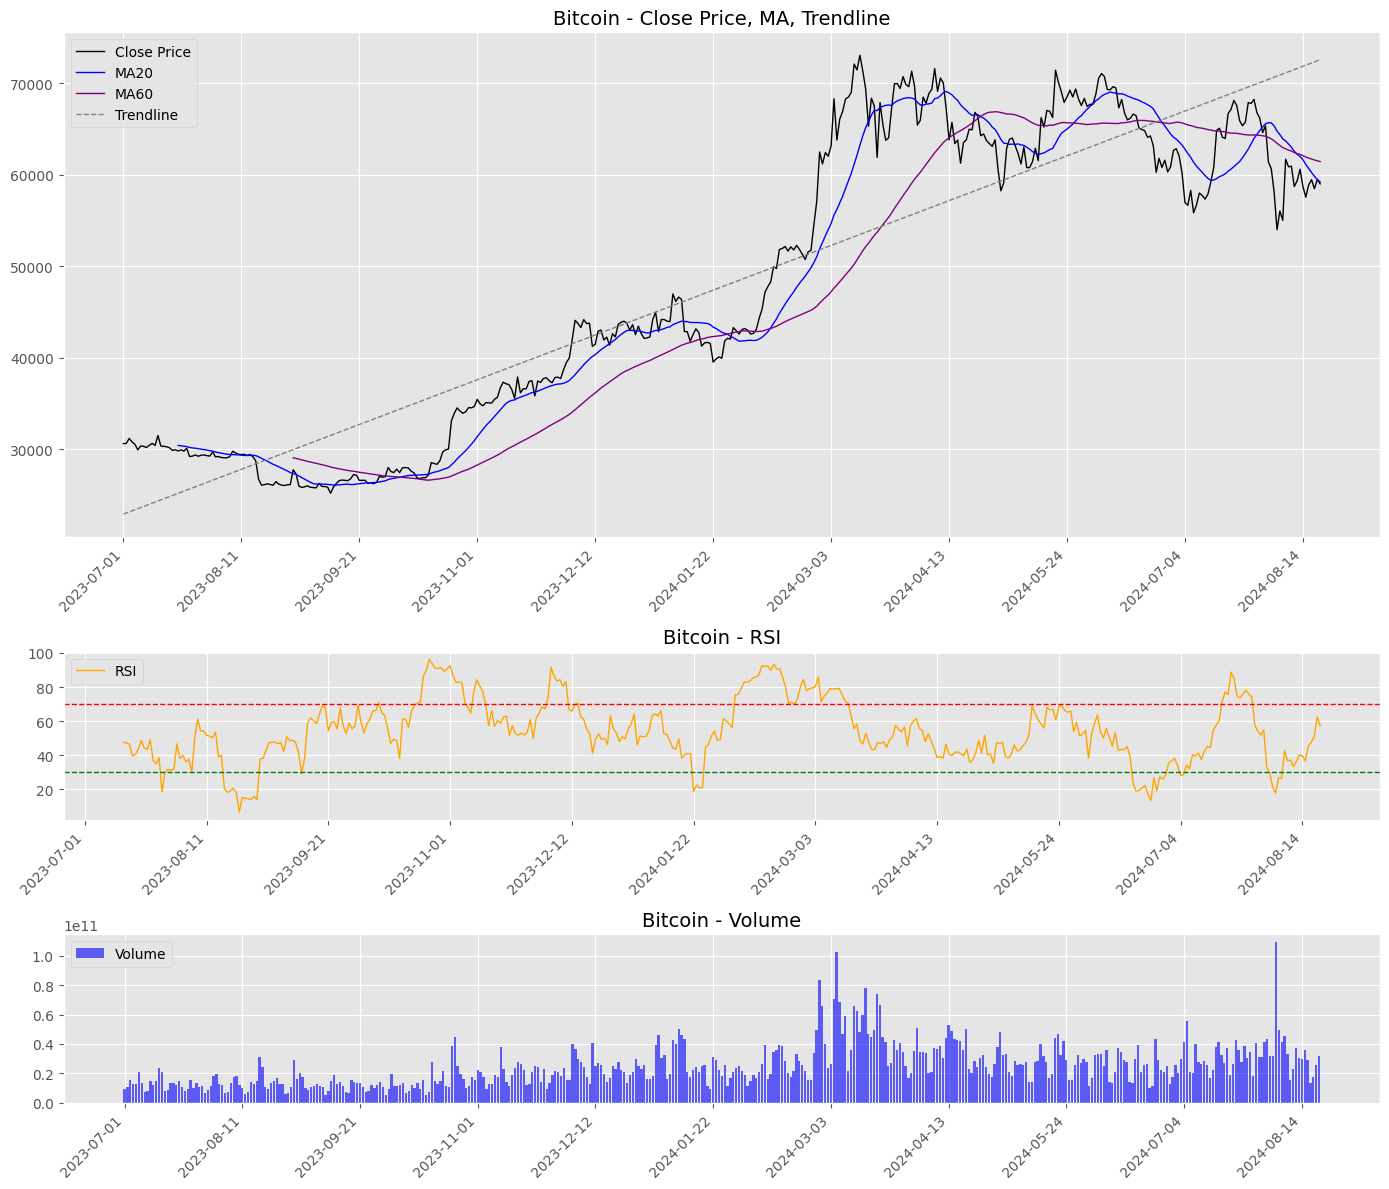

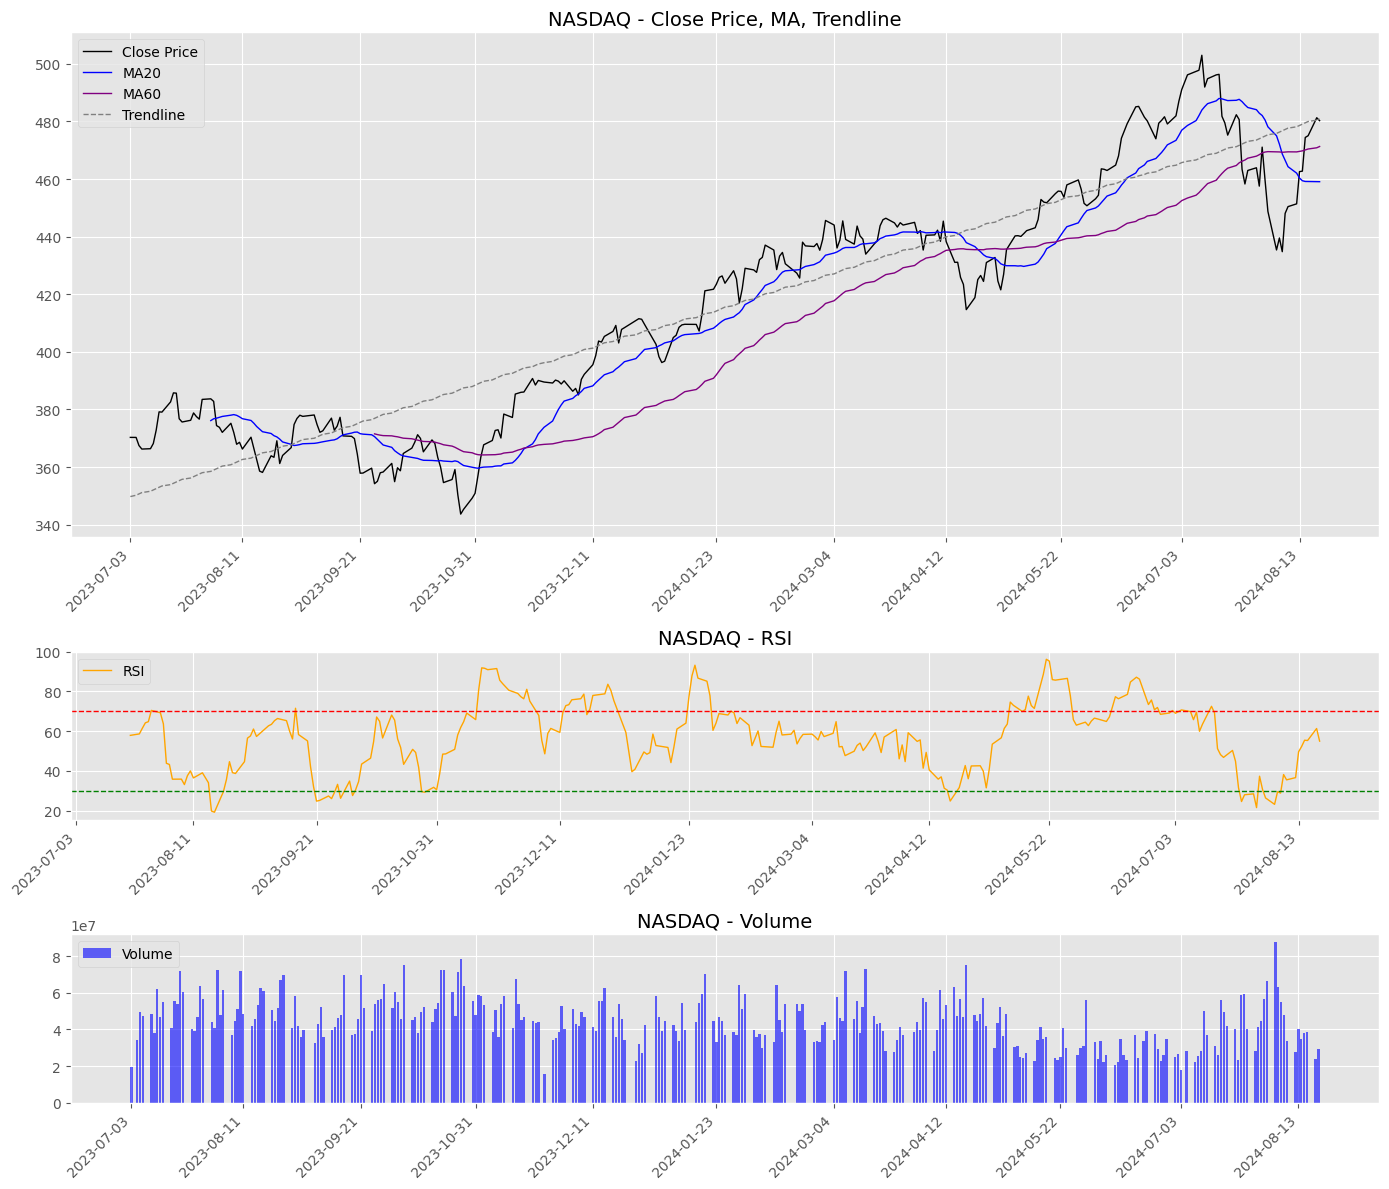

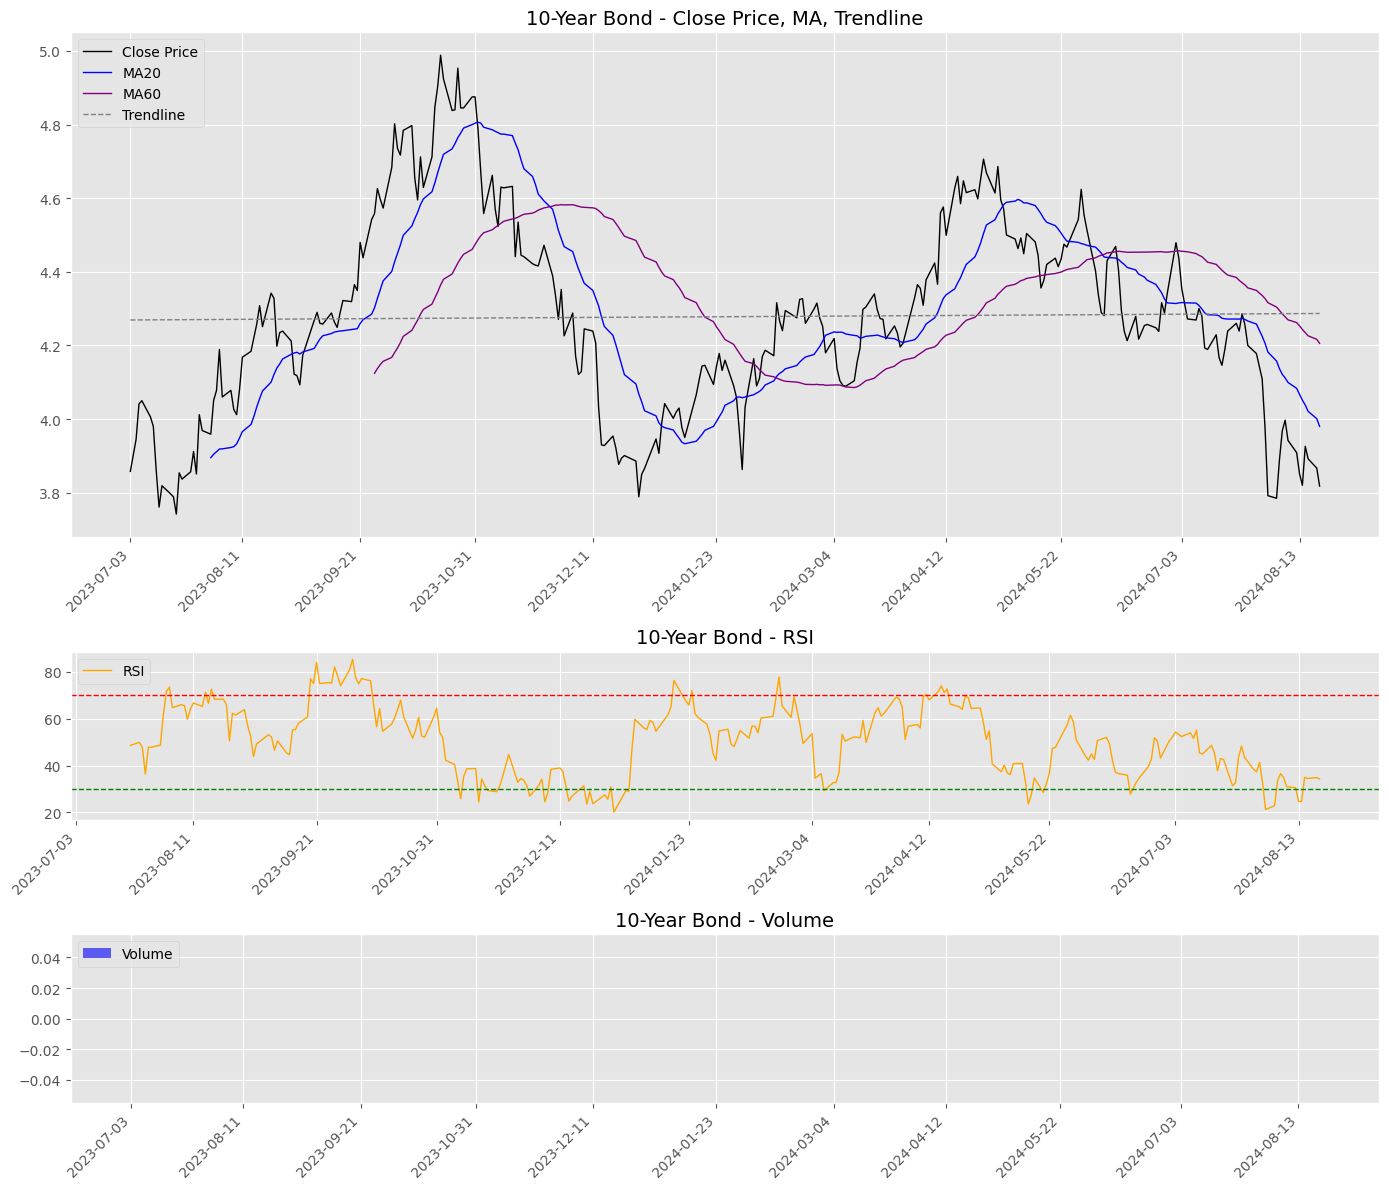

In [47]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 데이터 다운로드
tickers = {
    'BTC-USD': 'Bitcoin',
    'QQQ': 'NASDAQ',
    '^TNX': '10-Year Bond'
}

start_date = '2023-07-01'
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')

data = {}
for ticker, name in tickers.items():
    data[name] = yf.download(ticker, start=start_date, end=end_date)

# RSI 계산 함수
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# 추세선 계산 함수
def calculate_trendline(data):
    x = np.arange(len(data))
    y = data['Close'].values
    z = np.polyfit(x, y, 1)
    trendline = np.polyval(z, x)
    return trendline

# 이동평균선, RSI, 추세선 계산 및 시각화
for name, df in data.items():
    df['MA20'] = df['Close'].rolling(window=20).mean()
    df['MA60'] = df['Close'].rolling(window=60).mean()
    df['RSI'] = calculate_rsi(df)
    df['Trendline'] = calculate_trendline(df)
    
    # 시각화
    fig, ax = plt.subplots(3, 1, figsize=(14, 12), gridspec_kw={'height_ratios': [3, 1, 1]})

    # 캔들 차트와 이동평균선, 추세선
    ax[0].plot(df.index, df['Close'], label='Close Price', color='black', linewidth=1)
    ax[0].plot(df.index, df['MA20'], label='MA20', color='blue', linewidth=1)
    ax[0].plot(df.index, df['MA60'], label='MA60', color='purple', linewidth=1)
    ax[0].plot(df.index, df['Trendline'], label='Trendline', linestyle='--', color='gray', linewidth=1)
    ax[0].set_title(f'{name} - Close Price, MA, Trendline', fontsize=14)
    ax[0].legend(loc='upper left', fontsize=10)
    ax[0].grid(True)
    
    # RSI 차트
    ax[1].plot(df.index, df['RSI'], label='RSI', color='orange', linewidth=1)
    ax[1].axhline(70, color='red', linestyle='--', linewidth=1)
    ax[1].axhline(30, color='green', linestyle='--', linewidth=1)
    ax[1].set_title(f'{name} - RSI', fontsize=14)
    ax[1].legend(loc='upper left', fontsize=10)
    ax[1].grid(True)
    
    # 거래량 차트
    ax[2].bar(df.index, df['Volume'], label='Volume', color='blue', alpha=0.6)
    ax[2].set_title(f'{name} - Volume', fontsize=14)
    ax[2].legend(loc='upper left', fontsize=10)
    ax[2].grid(True)
    
    # X축에 날짜 표시
    for a in ax:
        a.set_xticks(df.index[::int(len(df)/10)])  # 대략 10개의 날짜 라벨 표시
        a.set_xticklabels(df.index[::int(len(df)/10)].strftime('%Y-%m-%d'), rotation=45, ha='right')

    plt.tight_layout()
    plt.show()


[*********************100%%**********************]  1 of 1 completed


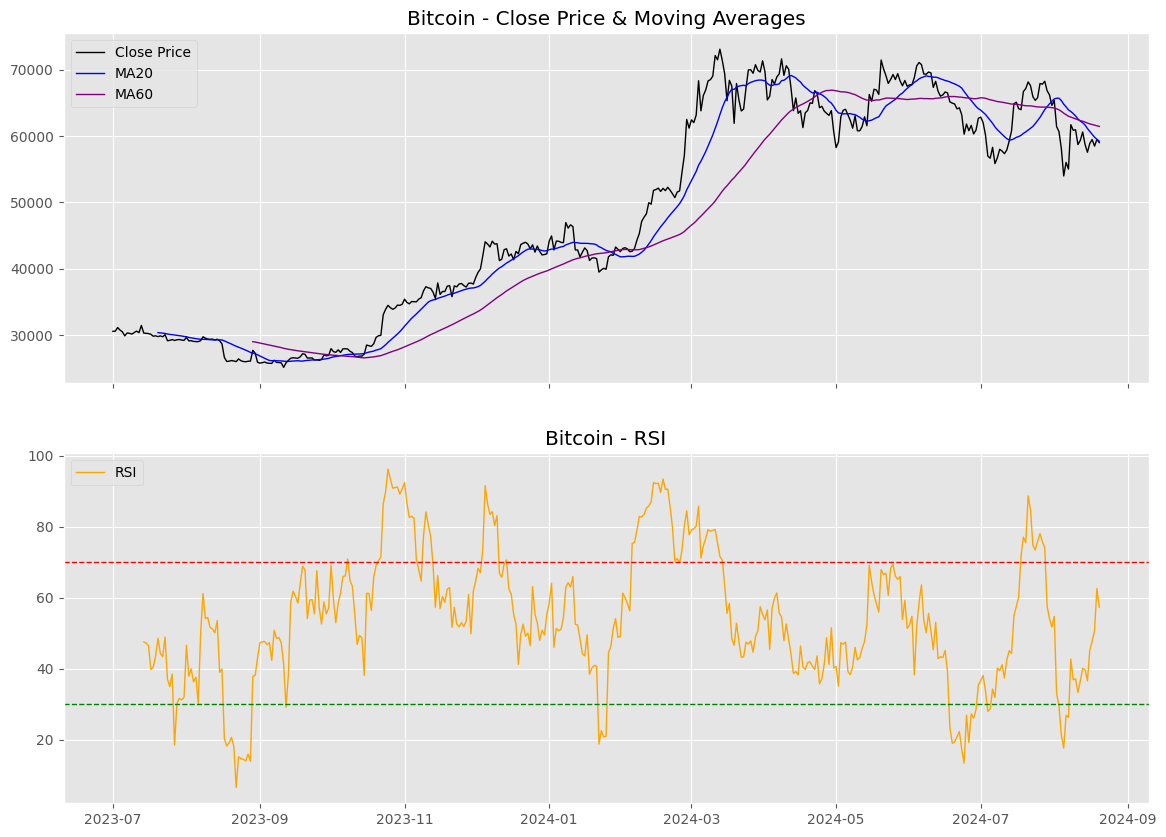

In [48]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 다운로드
btc = yf.download('BTC-USD', start='2023-07-01', end=pd.Timestamp.today().strftime('%Y-%m-%d'))

# RSI 계산 함수
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# 이동평균선 계산
btc['MA20'] = btc['Close'].rolling(window=20).mean()
btc['MA60'] = btc['Close'].rolling(window=60).mean()
btc['RSI'] = calculate_rsi(btc)

# 시각화
fig, ax = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# 가격 및 이동평균선
ax[0].plot(btc.index, btc['Close'], label='Close Price', color='black', linewidth=1)
ax[0].plot(btc.index, btc['MA20'], label='MA20', color='blue', linewidth=1)
ax[0].plot(btc.index, btc['MA60'], label='MA60', color='purple', linewidth=1)
ax[0].set_title('Bitcoin - Close Price & Moving Averages')
ax[0].legend(loc='upper left')
ax[0].grid(True)

# RSI 차트
ax[1].plot(btc.index, btc['RSI'], label='RSI', color='orange', linewidth=1)
ax[1].axhline(70, color='red', linestyle='--', linewidth=1)
ax[1].axhline(30, color='green', linestyle='--', linewidth=1)
ax[1].set_title('Bitcoin - RSI')
ax[1].legend(loc='upper left')
ax[1].grid(True)

plt.show()


[*********************100%%**********************]  1 of 1 completed

Correlation Matrix:
          Close       RSI      MA20      MA60
Close  1.000000 -0.164011  0.975122  0.926605
RSI   -0.164011  1.000000 -0.347556 -0.400056
MA20   0.975122 -0.347556  1.000000  0.966675
MA60   0.926605 -0.400056  0.966675  1.000000


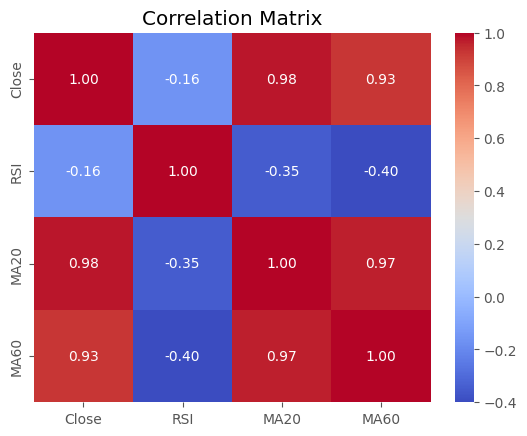

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     8211.
Date:                Wed, 21 Aug 2024   Prob (F-statistic):               0.00
Time:                        22:31:47   Log-Likelihood:                -3190.7
No. Observations:                 358   AIC:                             6389.
Df Residuals:                     354   BIC:                             6405.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.008e+04    565.270    -17.838      0.0

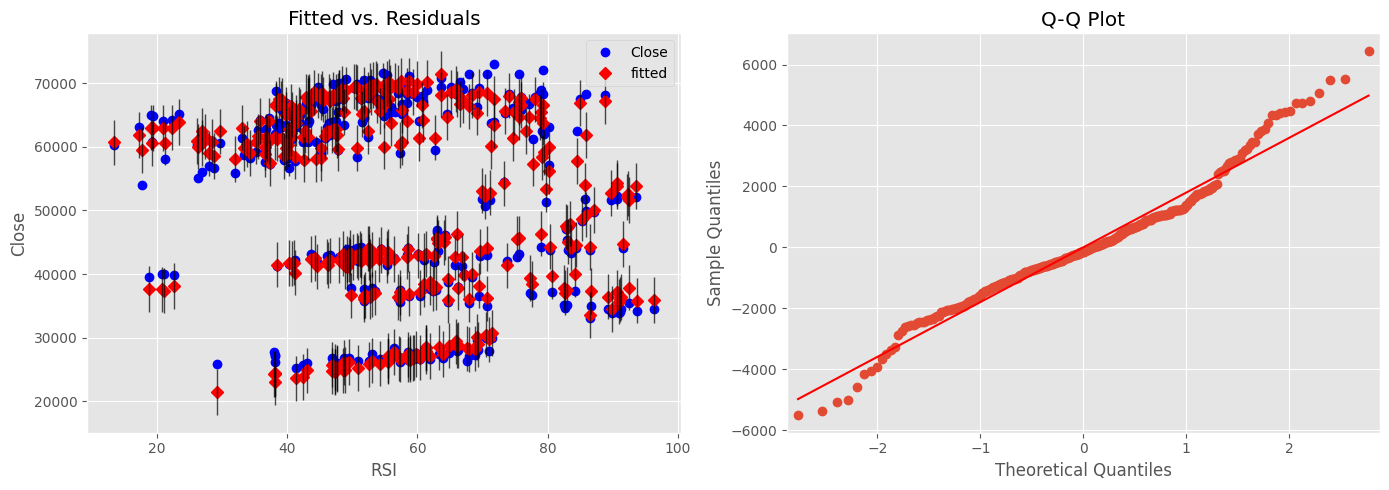

In [49]:
import yfinance as yf
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 다운로드
btc = yf.download('BTC-USD', start='2023-07-01', end=pd.Timestamp.today().strftime('%Y-%m-%d'))

# RSI 계산 함수
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# 이동평균선 계산
btc['MA20'] = btc['Close'].rolling(window=20).mean()
btc['MA60'] = btc['Close'].rolling(window=60).mean()
btc['RSI'] = calculate_rsi(btc)

# NaN 제거
btc.dropna(inplace=True)

# 1. 상관분석
correlation_matrix = btc[['Close', 'RSI', 'MA20', 'MA60']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# 상관행렬 시각화
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 2. 회귀분석

# 독립 변수와 종속 변수 설정
X = btc[['RSI', 'MA20', 'MA60']]
y = btc['Close']

# 상수항 추가 (절편)
X = sm.add_constant(X)

# 회귀모델 적합
model = sm.OLS(y, X).fit()

# 회귀모델 요약 출력
print(model.summary())

# 회귀 분석 결과 시각화
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# 잔차 플롯
sm.graphics.plot_fit(model, 1, ax=ax[0])
ax[0].set_title('Fitted vs. Residuals')

# Q-Q 플롯 (정규성 검정)
sm.qqplot(model.resid, line='s', ax=ax[1])
ax[1].set_title('Q-Q Plot')

plt.tight_layout()
plt.show()


[*********************100%%**********************]  1 of 1 completed
C:\Users\ansck\AppData\Local\Temp\ipykernel_3920\1710749017.py:31: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  btc['Trendline'].iloc[i] = np.polyval(z, i)  # 현재 시점의 추세선 값

Initial Cash: $10000.00
Final Value: $11711.75


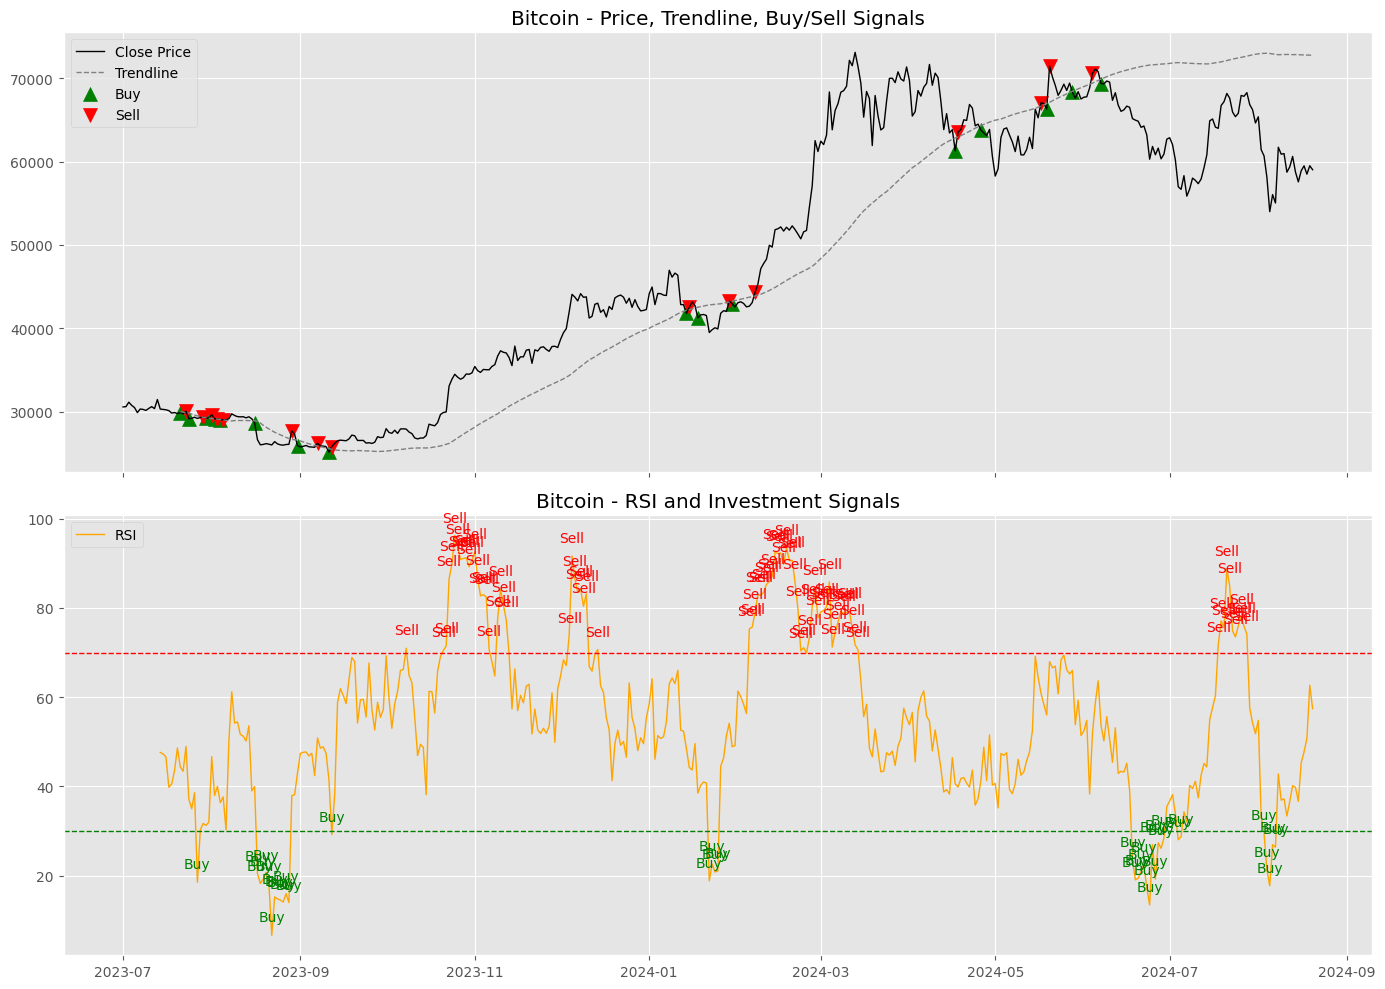

In [50]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 다운로드
btc = yf.download('BTC-USD', start='2023-07-01', end=pd.Timestamp.today().strftime('%Y-%m-%d'))

# RSI 계산 함수
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# 시뮬레이션 변수 초기화
initial_cash = 10000  # 초기 투자 금액
cash = initial_cash
btc_owned = 0
btc['Position'] = 0  # 포지션: 1은 매수, -1은 매도
btc['Trendline'] = np.nan  # 추세선 초기화

# 추세선에 기반한 투자 시뮬레이션
for i in range(20, len(btc)):  # 20일 이후부터 계산
    # 현재 시점까지의 데이터를 사용하여 추세선 계산
    x = np.arange(0, i)
    y = btc['Close'].iloc[:i].values
    z = np.polyfit(x, y, 1)  # 선형 회귀
    btc['Trendline'].iloc[i] = np.polyval(z, i)  # 현재 시점의 추세선 값
    
    if btc['Close'].iloc[i] < btc['Trendline'].iloc[i] and cash > 0:  # 매수 조건
        btc_owned += cash / btc['Close'].iloc[i]
        cash = 0
        btc.at[btc.index[i], 'Position'] = 1  # 매수 시점 기록
    elif btc['Close'].iloc[i] > btc['Trendline'].iloc[i] and btc_owned > 0:  # 매도 조건
        cash += btc_owned * btc['Close'].iloc[i]
        btc_owned = 0
        btc.at[btc.index[i], 'Position'] = -1  # 매도 시점 기록

# 최종 자산 가치
final_value = cash + btc_owned * btc['Close'].iloc[-1]
print(f"Initial Cash: ${initial_cash:.2f}")
print(f"Final Value: ${final_value:.2f}")

# RSI 기반 투자 추천
btc['RSI'] = calculate_rsi(btc)
btc['Signal'] = np.where(btc['RSI'] < 30, 'Buy', np.where(btc['RSI'] > 70, 'Sell', 'Hold'))

# 투자 시점 표시를 위한 시각화
fig, ax = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# 가격과 추세선
ax[0].plot(btc.index, btc['Close'], label='Close Price', color='black', linewidth=1)
ax[0].plot(btc.index, btc['Trendline'], label='Trendline', linestyle='--', color='gray', linewidth=1)
ax[0].scatter(btc.index[btc['Position'] == 1], btc['Close'][btc['Position'] == 1], marker='^', color='green', label='Buy', s=100)
ax[0].scatter(btc.index[btc['Position'] == -1], btc['Close'][btc['Position'] == -1], marker='v', color='red', label='Sell', s=100)
ax[0].set_title('Bitcoin - Price, Trendline, Buy/Sell Signals')
ax[0].legend(loc='upper left')
ax[0].grid(True)

# RSI
ax[1].plot(btc.index, btc['RSI'], label='RSI', color='orange', linewidth=1)
ax[1].axhline(70, color='red', linestyle='--', linewidth=1)
ax[1].axhline(30, color='green', linestyle='--', linewidth=1)
ax[1].set_title('Bitcoin - RSI and Investment Signals')
for i in range(len(btc)):
    if btc['Signal'].iloc[i] == 'Buy':
        ax[1].annotate('Buy', (btc.index[i], btc['RSI'].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center', color='green')
    elif btc['Signal'].iloc[i] == 'Sell':
        ax[1].annotate('Sell', (btc.index[i], btc['RSI'].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center', color='red')
ax[1].legend(loc='upper left')
ax[1].grid(True)

plt.tight_layout()
plt.show()


[*********************100%%**********************]  1 of 1 completed

       Buy and Hold     Trendline           RSI  Moving Average
count    100.000000    100.000000    100.000000      100.000000
mean   15823.704717   9537.741508  11261.160733    12891.715091
std     6338.292044   1291.647960   2335.349246     4111.880977
min     3900.890792   5990.014473   6131.740797     7119.207117
25%    10865.923938  10000.000000   9986.156727    10000.000000
50%    14552.643747  10000.000000  10619.759967    10789.366264
75%    19534.308483  10000.000000  12859.162082    15362.101943
max    32094.065491  12932.288854  18178.369940    26592.799153


C:\Users\ansck\AppData\Local\Temp\ipykernel_3920\1286274969.py:110: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([results['Buy and Hold'], results['Trendline'], results['RSI'], results['Moving Average']],


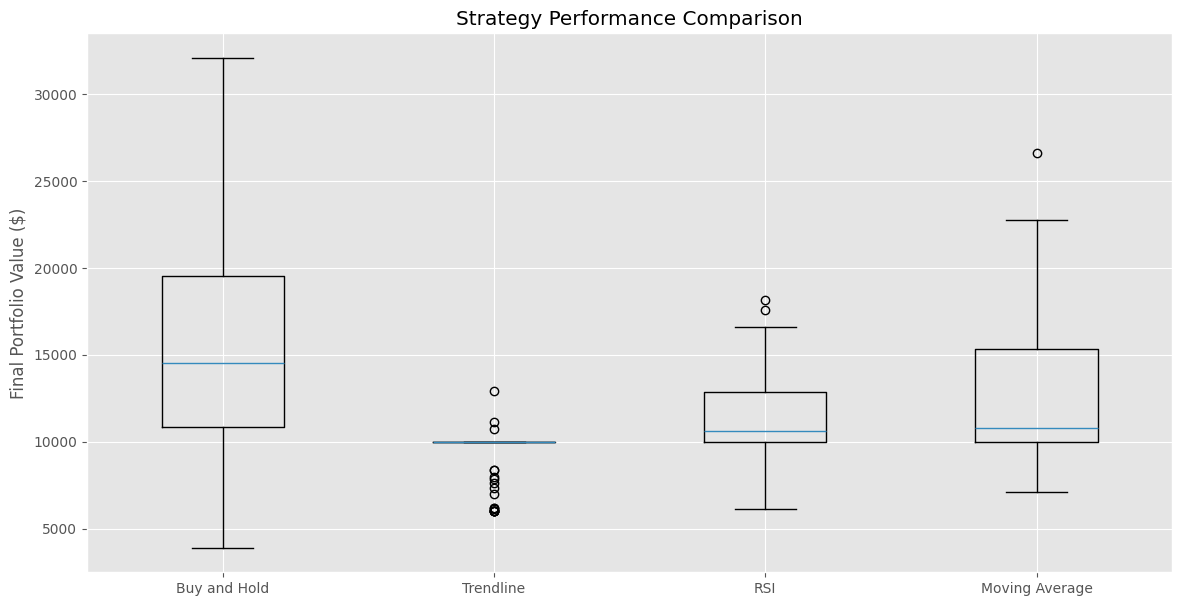

In [52]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# 데이터 다운로드
btc = yf.download('BTC-USD', start='2022-01-01', end=pd.Timestamp.today().strftime('%Y-%m-%d'))

# RSI 계산 함수
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# 추세선 계산 함수
def calculate_trendline(data, end):
    x = np.arange(end)
    y = data['Close'][:end].values
    z = np.polyfit(x, y, 1)
    trendline = np.polyval(z, np.arange(len(data)))
    return trendline

# 투자 전략 함수들
def buy_and_hold(start, end):
    initial_price = btc['Close'].iloc[start]
    final_price = btc['Close'].iloc[end]
    return (final_price / initial_price) * 10000  # 투자 초기 자산을 $10,000로 가정

def trendline_strategy(start, end):
    cash = 10000
    btc_owned = 0
    
    for i in range(start, end):
        trendline = calculate_trendline(btc[:i+1], i+1)  # i까지의 데이터를 사용하여 추세선 계산
        if btc['Close'].iloc[i] < trendline[i] and cash > 0:  # 매수
            btc_owned = cash / btc['Close'].iloc[i]
            cash = 0
        elif btc['Close'].iloc[i] > trendline[i] and btc_owned > 0:  # 매도
            cash = btc_owned * btc['Close'].iloc[i]
            btc_owned = 0
    
    final_value = cash + btc_owned * btc['Close'].iloc[end]
    return final_value

def rsi_strategy(start, end):
    cash = 10000
    btc_owned = 0
    btc['RSI'] = calculate_rsi(btc)
    
    for i in range(start, end):
        if btc['RSI'].iloc[i] < 30 and cash > 0:  # 매수
            btc_owned = cash / btc['Close'].iloc[i]
            cash = 0
        elif btc['RSI'].iloc[i] > 70 and btc_owned > 0:  # 매도
            cash = btc_owned * btc['Close'].iloc[i]
            btc_owned = 0
    
    final_value = cash + btc_owned * btc['Close'].iloc[end]
    return final_value

# 이동평균선 전략 함수
def moving_average_strategy(start, end, short_window=20, long_window=60):
    cash = 10000
    btc_owned = 0
    
    # 이동평균선 계산
    btc['MA20'] = btc['Close'].rolling(window=short_window).mean()
    btc['MA60'] = btc['Close'].rolling(window=long_window).mean()
    
    for i in range(start + long_window, end):
        if btc['MA20'].iloc[i] > btc['MA60'].iloc[i] and btc['MA20'].iloc[i-1] <= btc['MA60'].iloc[i-1] and cash > 0:  # 골든 크로스 매수
            btc_owned = cash / btc['Close'].iloc[i]
            cash = 0
        elif btc['MA20'].iloc[i] < btc['MA60'].iloc[i] and btc['MA20'].iloc[i-1] >= btc['MA60'].iloc[i-1] and btc_owned > 0:  # 데드 크로스 매도
            cash = btc_owned * btc['Close'].iloc[i]
            btc_owned = 0
    
    final_value = cash + btc_owned * btc['Close'].iloc[end]
    return final_value

# 랜덤 시뮬레이션 설정
num_simulations = 100
results = {
    'Buy and Hold': [],
    'Trendline': [],
    'RSI': [],
    'Moving Average': []
}

# 시뮬레이션 실행
for _ in range(num_simulations):
    start = random.randint(60, len(btc) - 100)  # 최소 60일 이후, 마지막 100일 제외
    end = random.randint(start + 20, len(btc) - 1)  # 최소 20일 이후의 랜덤 시점
    
    results['Buy and Hold'].append(buy_and_hold(start, end))
    results['Trendline'].append(trendline_strategy(start, end))
    results['RSI'].append(rsi_strategy(start, end))
    results['Moving Average'].append(moving_average_strategy(start, end))

# 결과 비교
results_df = pd.DataFrame(results)
print(results_df.describe())

# 결과 시각화
plt.figure(figsize=(14, 7))
plt.boxplot([results['Buy and Hold'], results['Trendline'], results['RSI'], results['Moving Average']], 
            labels=['Buy and Hold', 'Trendline', 'RSI', 'Moving Average'])
plt.title('Strategy Performance Comparison')
plt.ylabel('Final Portfolio Value ($)')
plt.grid(True)
plt.show()


[*********************100%%**********************]  1 of 1 completed


       Buy and Hold     Trendline           RSI  Moving Average          MACD  \
count  1.000000e+02    100.000000    100.000000    1.000000e+02  1.000000e+02   
mean   1.225462e+05  14756.625274   8869.065355    1.081556e+05  1.746367e+05   
std    3.314883e+05   8027.282325   4094.909298    2.563783e+05  5.292789e+05   
min    3.454433e+03   5670.144482   2663.969230    5.538085e+03  6.691819e+03   
25%    1.035774e+04  10000.000000   5861.877792    1.007204e+04  1.159409e+04   
50%    1.870796e+04  10616.411570   8595.329780    1.765157e+04  1.937013e+04   
75%    4.201611e+04  18827.453993  10125.948948    6.159385e+04  5.135685e+04   
max    2.526477e+06  49511.439819  23772.314986    1.467680e+06  4.264903e+06   

       Bollinger Bands  
count       100.000000  
mean       9447.870270  
std        4085.621302  
min        3115.098987  
25%        7118.097669  
50%        9419.084258  
75%       10701.156007  
max       28781.237375  


C:\Users\ansck\AppData\Local\Temp\ipykernel_3920\392748531.py:173: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([results['Buy and Hold'], results['Trendline'], results['RSI'], results['Moving Average'], results['MACD'], results['Bollinger Bands']],


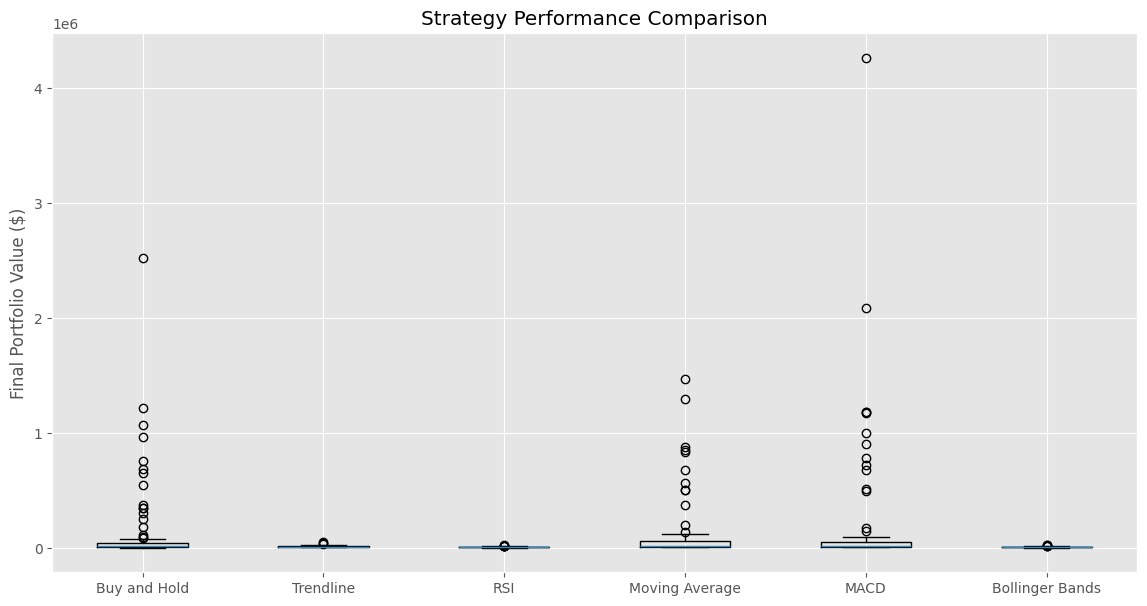

In [55]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# 데이터 다운로드
btc = yf.download('BTC-USD', start='2014-01-01', end=pd.Timestamp.today().strftime('%Y-%m-%d'))

# RSI 계산 함수
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# MACD 계산 함수
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data['Close'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal

# 볼린저 밴드 계산 함수
def calculate_bollinger_bands(data, window=20, num_std=2):
    rolling_mean = data['Close'].rolling(window=window).mean()
    rolling_std = data['Close'].rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std * num_std)
    lower_band = rolling_mean - (rolling_std * num_std)
    return upper_band, lower_band

# 1. 이동평균선 전략
def moving_average_strategy(start, end, short_window=20, long_window=60):
    cash = 10000
    btc_owned = 0
    invested = False
    
    # 이동평균선 계산
    btc['MA20'] = btc['Close'].rolling(window=short_window).mean()
    btc['MA60'] = btc['Close'].rolling(window=long_window).mean()
    
    for i in range(start + long_window, end):
        if btc['MA20'].iloc[i] > btc['MA60'].iloc[i] and not invested:  # 골든 크로스 매수
            btc_owned = cash / btc['Close'].iloc[i]
            cash = 0
            invested = True
        elif btc['MA20'].iloc[i] < btc['MA60'].iloc[i] and invested:  # 데드 크로스 매도
            cash = btc_owned * btc['Close'].iloc[i]
            btc_owned = 0
            invested = False
    
    final_value = cash + btc_owned * btc['Close'].iloc[end]
    return final_value

# 2. RSI 전략
def rsi_strategy(start, end):
    cash = 10000
    btc_owned = 0
    invested = False
    btc['RSI'] = calculate_rsi(btc)
    
    for i in range(start, end):
        if btc['RSI'].iloc[i] < 30 and not invested:  # 매수
            btc_owned = cash / btc['Close'].iloc[i]
            cash = 0
            invested = True
        elif btc['RSI'].iloc[i] > 70 and invested:  # 매도
            cash = btc_owned * btc['Close'].iloc[i]
            btc_owned = 0
            invested = False
    
    final_value = cash + btc_owned * btc['Close'].iloc[end]
    return final_value

# 3. 추세선 전략
def trendline_strategy(start, end):
    cash = 10000
    btc_owned = 0
    invested = False
    
    for i in range(start + 20, end):  # 20일 이후부터 시작
        trendline = calculate_trendline(btc[:i+1], i+1)  # i까지의 데이터를 사용하여 추세선 계산
        if btc['Close'].iloc[i] < trendline[i] and not invested:  # 매수
            btc_owned = cash / btc['Close'].iloc[i]
            cash = 0
            invested = True
        elif btc['Close'].iloc[i] > trendline[i] and invested:  # 매도
            cash = btc_owned * btc['Close'].iloc[i]
            btc_owned = 0
            invested = False
    
    final_value = cash + btc_owned * btc['Close'].iloc[end]
    return final_value

# 4. MACD 전략
def macd_strategy(start, end):
    cash = 10000
    btc_owned = 0
    invested = False
    btc['MACD'], btc['Signal'] = calculate_macd(btc)
    
    for i in range(start, end):
        if btc['MACD'].iloc[i] > btc['Signal'].iloc[i] and not invested:  # MACD가 신호선을 상향 돌파할 때 매수
            btc_owned = cash / btc['Close'].iloc[i]
            cash = 0
            invested = True
        elif btc['MACD'].iloc[i] < btc['Signal'].iloc[i] and invested:  # MACD가 신호선을 하향 돌파할 때 매도
            cash = btc_owned * btc['Close'].iloc[i]
            btc_owned = 0
            invested = False
    
    final_value = cash + btc_owned * btc['Close'].iloc[end]
    return final_value

# 5. Bollinger Bands 전략
def bollinger_strategy(start, end):
    cash = 10000
    btc_owned = 0
    invested = False
    btc['Upper Band'], btc['Lower Band'] = calculate_bollinger_bands(btc)
    
    for i in range(start, end):
        if btc['Close'].iloc[i] < btc['Lower Band'].iloc[i] and not invested:  # 가격이 하단 밴드 아래에 있을 때 매수
            btc_owned = cash / btc['Close'].iloc[i]
            cash = 0
            invested = True
        elif btc['Close'].iloc[i] > btc['Upper Band'].iloc[i] and invested:  # 가격이 상단 밴드 위에 있을 때 매도
            cash = btc_owned * btc['Close'].iloc[i]
            btc_owned = 0
            invested = False
    
    final_value = cash + btc_owned * btc['Close'].iloc[end]
    return final_value

# 6. Buy and Hold 전략 (비교용)
def buy_and_hold(start, end):
    initial_price = btc['Close'].iloc[start]
    final_price = btc['Close'].iloc[end]
    return (final_price / initial_price) * 10000  # 투자 초기 자산을 $10,000로 가정

# 시뮬레이션 실행
num_simulations = 100
results = {
    'Buy and Hold': [],
    'Trendline': [],
    'RSI': [],
    'Moving Average': [],
    'MACD': [],
    'Bollinger Bands': []
}

# 시뮬레이션 실행
for _ in range(num_simulations):
    start = random.randint(60, len(btc) - 100)  # 최소 60일 이후, 마지막 100일 제외
    end = random.randint(start + 20, len(btc) - 1)  # 최소 20일 이후의 랜덤 시점
    
    results['Buy and Hold'].append(buy_and_hold(start, end))
    results['Trendline'].append(trendline_strategy(start, end))
    results['RSI'].append(rsi_strategy(start, end))
    results['Moving Average'].append(moving_average_strategy(start, end))
    results['MACD'].append(macd_strategy(start, end))
    results['Bollinger Bands'].append(bollinger_strategy(start, end))

# 결과 비교
results_df = pd.DataFrame(results)
print(results_df.describe())

# 결과 시각화
plt.figure(figsize=(14, 7))
plt.boxplot([results['Buy and Hold'], results['Trendline'], results['RSI'], results['Moving Average'], results['MACD'], results['Bollinger Bands']], 
            labels=['Buy and Hold', 'Trendline', 'RSI', 'Moving Average', 'MACD', 'Bollinger Bands'])
plt.title('Strategy Performance Comparison')
plt.ylabel('Final Portfolio Value ($)')
plt.grid(True)
plt.show()


In [57]:
results_df.describe()

Buy and Hold     Trendline           RSI  Moving Average          MACD  \
count  1.000000e+02    100.000000    100.000000    1.000000e+02  1.000000e+02   
mean   1.225462e+05  14756.625274   8869.065355    1.081556e+05  1.746367e+05   
std    3.314883e+05   8027.282325   4094.909298    2.563783e+05  5.292789e+05   
min    3.454433e+03   5670.144482   2663.969230    5.538085e+03  6.691819e+03   
25%    1.035774e+04  10000.000000   5861.877792    1.007204e+04  1.159409e+04   
50%    1.870796e+04  10616.411570   8595.329780    1.765157e+04  1.937013e+04   
75%    4.201611e+04  18827.453993  10125.948948    6.159385e+04  5.135685e+04   
max    2.526477e+06  49511.439819  23772.314986    1.467680e+06  4.264903e+06   

       Bollinger Bands  
count       100.000000  
mean       9447.870270  
std        4085.621302  
min        3115.098987  
25%        7118.097669  
50%        9419.084258  
75%       10701.156007  
max       28781.237375

[*********************100%%**********************]  1 of 1 completed


       Buy and Hold     Trendline           RSI  Moving Average          MACD  \
count  1.000000e+02    100.000000    100.000000    1.000000e+02  1.000000e+02   
mean   1.176423e+05  14224.933718   9788.282325    9.386305e+04  1.564596e+05   
std    2.838717e+05   6485.402689   4890.624171    2.286136e+05  4.346656e+05   
min    4.265474e+03   5189.882532   1530.906862    5.579451e+03  6.766901e+03   
25%    1.347639e+04  10000.000000   6108.974016    1.200063e+04  1.309891e+04   
50%    2.419920e+04  11662.010993   9432.007895    1.952192e+04  2.102694e+04   
75%    4.870927e+04  18163.287056  11473.853822    4.928418e+04  5.520020e+04   
max    1.993235e+06  32295.016133  32445.019170    1.333763e+06  3.160407e+06   

       Bollinger Bands  Investment Period (years)  Investment Period (months)  
count       100.000000                 100.000000                  100.000000  
mean      10052.609938                   1.680000                    5.070000  
std        4184.453277        

C:\Users\ansck\AppData\Local\Temp\ipykernel_3920\1367339642.py:183: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([results_df['Buy and Hold'], results_df['Trendline'], results_df['RSI'], results_df['Moving Average'], results_df['MACD'], results_df['Bollinger Bands']],


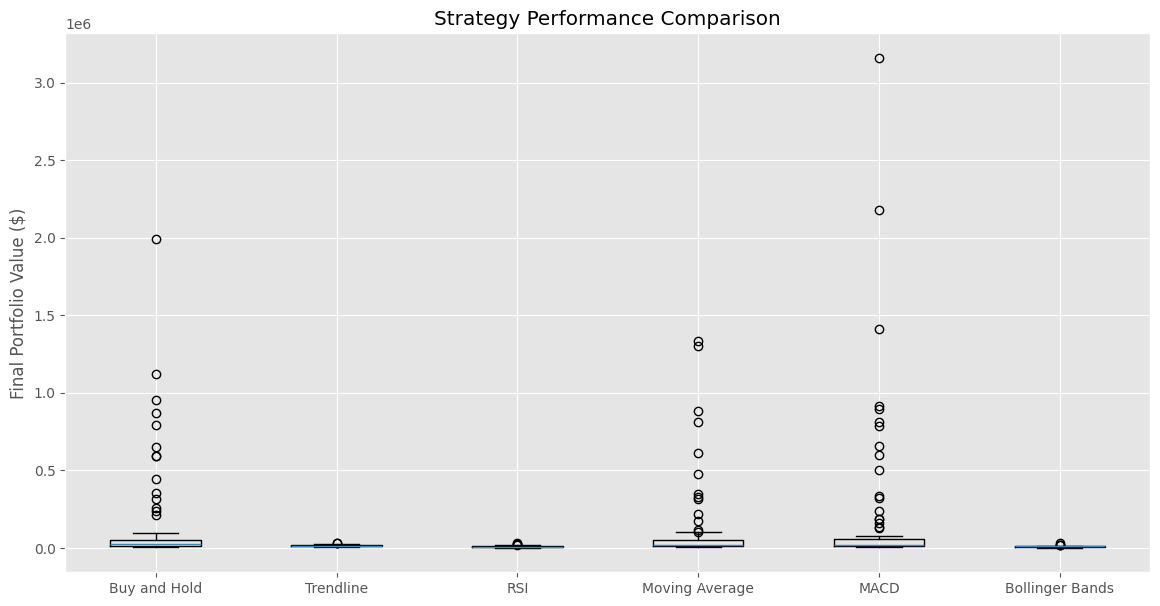

Investment Periods (years and months):
    Investment Period (years)  Investment Period (months)
0                           1                           2
1                           0                           3
2                           2                          11
3                           1                           3
4                           3                           6
..                        ...                         ...
95                          0                          10
96                          0                           5
97                          1                          11
98                          4                           5
99                          0                           6

[100 rows x 2 columns]


In [60]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# 데이터 다운로드
btc = yf.download('BTC-USD', start='2014-01-01', end=pd.Timestamp.today().strftime('%Y-%m-%d'))

# RSI 계산 함수
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# MACD 계산 함수
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data['Close'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal

# 볼린저 밴드 계산 함수
def calculate_bollinger_bands(data, window=20, num_std=2):
    rolling_mean = data['Close'].rolling(window=window).mean()
    rolling_std = data['Close'].rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std * num_std)
    lower_band = rolling_mean - (rolling_std * num_std)
    return upper_band, lower_band

# 1. 이동평균선 전략
def moving_average_strategy(start, end, short_window=20, long_window=60):
    cash = 10000
    btc_owned = 0
    invested = False
    
    # 이동평균선 계산
    btc['MA20'] = btc['Close'].rolling(window=short_window).mean()
    btc['MA60'] = btc['Close'].rolling(window=long_window).mean()
    
    for i in range(start + long_window, end):
        if btc['MA20'].iloc[i] > btc['MA60'].iloc[i] and not invested:  # 골든 크로스 매수
            btc_owned = cash / btc['Close'].iloc[i]
            cash = 0
            invested = True
        elif btc['MA20'].iloc[i] < btc['MA60'].iloc[i] and invested:  # 데드 크로스 매도
            cash = btc_owned * btc['Close'].iloc[i]
            btc_owned = 0
            invested = False
    
    final_value = cash + btc_owned * btc['Close'].iloc[end]
    return final_value

# 2. RSI 전략
def rsi_strategy(start, end):
    cash = 10000
    btc_owned = 0
    invested = False
    btc['RSI'] = calculate_rsi(btc)
    
    for i in range(start, end):
        if btc['RSI'].iloc[i] < 30 and not invested:  # 매수
            btc_owned = cash / btc['Close'].iloc[i]
            cash = 0
            invested = True
        elif btc['RSI'].iloc[i] > 70 and invested:  # 매도
            cash = btc_owned * btc['Close'].iloc[i]
            btc_owned = 0
            invested = False
    
    final_value = cash + btc_owned * btc['Close'].iloc[end]
    return final_value

# 3. 추세선 전략
def trendline_strategy(start, end):
    cash = 10000
    btc_owned = 0
    invested = False
    
    for i in range(start + 20, end):  # 20일 이후부터 시작
        trendline = calculate_trendline(btc[:i+1], i+1)  # i까지의 데이터를 사용하여 추세선 계산
        if btc['Close'].iloc[i] < trendline[i] and not invested:  # 매수
            btc_owned = cash / btc['Close'].iloc[i]
            cash = 0
            invested = True
        elif btc['Close'].iloc[i] > trendline[i] and invested:  # 매도
            cash = btc_owned * btc['Close'].iloc[i]
            btc_owned = 0
            invested = False
    
    final_value = cash + btc_owned * btc['Close'].iloc[end]
    return final_value

# 4. MACD 전략
def macd_strategy(start, end):
    cash = 10000
    btc_owned = 0
    invested = False
    btc['MACD'], btc['Signal'] = calculate_macd(btc)
    
    for i in range(start, end):
        if btc['MACD'].iloc[i] > btc['Signal'].iloc[i] and not invested:  # MACD가 신호선을 상향 돌파할 때 매수
            btc_owned = cash / btc['Close'].iloc[i]
            cash = 0
            invested = True
        elif btc['MACD'].iloc[i] < btc['Signal'].iloc[i] and invested:  # MACD가 신호선을 하향 돌파할 때 매도
            cash = btc_owned * btc['Close'].iloc[i]
            btc_owned = 0
            invested = False
    
    final_value = cash + btc_owned * btc['Close'].iloc[end]
    return final_value

# 5. Bollinger Bands 전략
def bollinger_strategy(start, end):
    cash = 10000
    btc_owned = 0
    invested = False
    btc['Upper Band'], btc['Lower Band'] = calculate_bollinger_bands(btc)
    
    for i in range(start, end):
        if btc['Close'].iloc[i] < btc['Lower Band'].iloc[i] and not invested:  # 가격이 하단 밴드 아래에 있을 때 매수
            btc_owned = cash / btc['Close'].iloc[i]
            cash = 0
            invested = True
        elif btc['Close'].iloc[i] > btc['Upper Band'].iloc[i] and invested:  # 가격이 상단 밴드 위에 있을 때 매도
            cash = btc_owned * btc['Close'].iloc[i]
            btc_owned = 0
            invested = False
    
    final_value = cash + btc_owned * btc['Close'].iloc[end]
    return final_value

# 6. Buy and Hold 전략 (비교용)
def buy_and_hold(start, end):
    initial_price = btc['Close'].iloc[start]
    final_price = btc['Close'].iloc[end]
    return (final_price / initial_price) * 10000  # 투자 초기 자산을 $10,000로 가정

# 시뮬레이션 실행
num_simulations = 100
results = {
    'Buy and Hold': [],
    'Trendline': [],
    'RSI': [],
    'Moving Average': [],
    'MACD': [],
    'Bollinger Bands': [],
    'Investment Period (years)': [],
    'Investment Period (months)': []
}

# 시뮬레이션 실행
for _ in range(num_simulations):
    start = random.randint(60, len(btc) - 100)  # 최소 60일 이후, 마지막 100일 제외
    end = random.randint(start + 20, len(btc) - 1)  # 최소 20일 이후의 랜덤 시점
    
    # 각 전략의 성과 기록
    results['Buy and Hold'].append(buy_and_hold(start, end))
    results['Trendline'].append(trendline_strategy(start, end))
    results['RSI'].append(rsi_strategy(start, end))
    results['Moving Average'].append(moving_average_strategy(start, end))
    results['MACD'].append(macd_strategy(start, end))
    results['Bollinger Bands'].append(bollinger_strategy(start, end))
    
    # 투자 기간 기록
    investment_period = btc.index[end] - btc.index[start]
    years = investment_period.days // 365
    months = (investment_period.days % 365) // 30
    results['Investment Period (years)'].append(years)
    results['Investment Period (months)'].append(months)

# 결과 비교
results_df = pd.DataFrame(results)
print(results_df.describe())

# 결과 시각화
plt.figure(figsize=(14, 7))
plt.boxplot([results_df['Buy and Hold'], results_df['Trendline'], results_df['RSI'], results_df['Moving Average'], results_df['MACD'], results_df['Bollinger Bands']], 
            labels=['Buy and Hold', 'Trendline', 'RSI', 'Moving Average', 'MACD', 'Bollinger Bands'])
plt.title('Strategy Performance Comparison')
plt.ylabel('Final Portfolio Value ($)')
plt.grid(True)
plt.show()

# 투자 기간에 대한 정보 출력
print("Investment Periods (years and months):")
print(results_df[['Investment Period (years)', 'Investment Period (months)']])


C:\Users\ansck\AppData\Local\Temp\ipykernel_3920\685092867.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([results['Buy and Hold'],


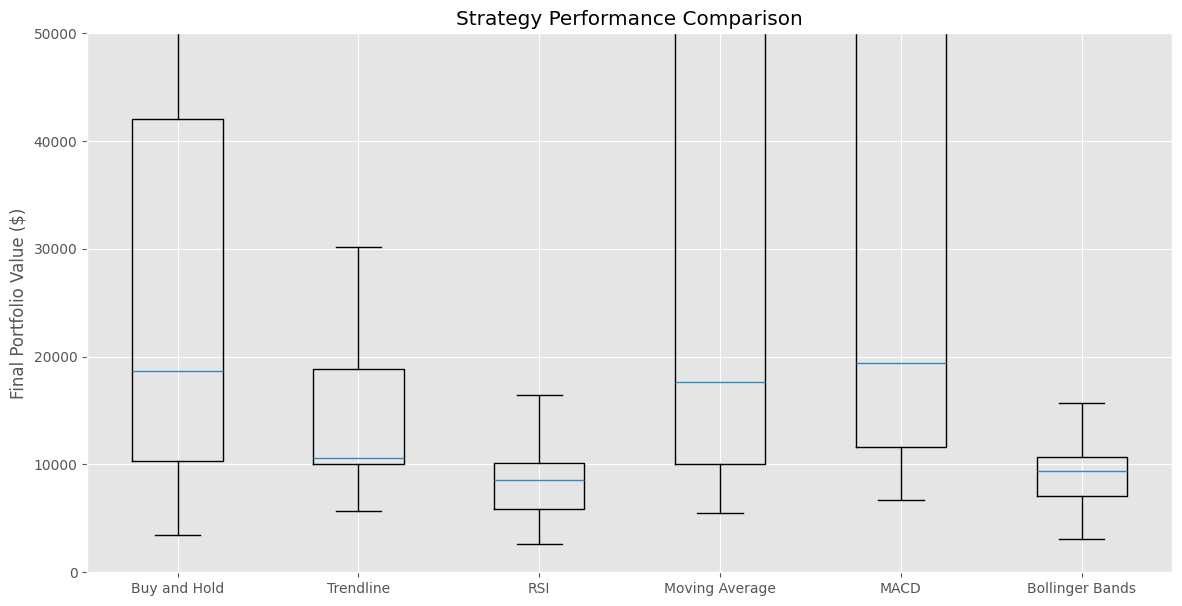

In [59]:
import matplotlib.pyplot as plt

# 최대 y축 범위를 설정하여 아웃라이어의 영향을 줄임
plt.figure(figsize=(14, 7))
plt.boxplot([results['Buy and Hold'], 
             results['Trendline'], 
             results['RSI'], 
             results['Moving Average'], 
             results['MACD'], 
             results['Bollinger Bands']], 
            labels=['Buy and Hold', 'Trendline', 'RSI', 'Moving Average', 'MACD', 'Bollinger Bands'],
            showfliers=False)  # 아웃라이어를 표시하지 않음
plt.ylim(0, 50000)  # y축의 범위를 설정하여 주요 범위를 강조
plt.title('Strategy Performance Comparison')
plt.ylabel('Final Portfolio Value ($)')
plt.grid(True)
plt.show()


[*********************100%%**********************]  1 of 1 completed


                Start Date             End Date  Investment Period (years)  \
count                  100                  100                 100.000000   
mean   2019-10-25 20:52:48  2022-02-01 22:33:36                   1.810000   
min    2015-01-23 00:00:00  2015-09-26 00:00:00                   0.000000   
25%    2017-07-06 06:00:00  2020-08-13 00:00:00                   0.000000   
50%    2019-12-24 00:00:00  2022-12-01 00:00:00                   1.000000   
75%    2022-03-29 06:00:00  2023-11-18 12:00:00                   3.000000   
max    2024-05-04 00:00:00  2024-08-13 00:00:00                   7.000000   
std                    NaN                  NaN                   1.993398   

       Investment Period (months)  Buy and Hold     Trendline           RSI  \
count                  100.000000  1.000000e+02    100.000000    100.000000   
mean                     5.170000  9.938964e+04  14720.787184   9107.132522   
min                      0.000000  3.634838e+03   4859.93222

C:\Users\ansck\AppData\Local\Temp\ipykernel_3920\3610772196.py:191: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([results_df['Buy and Hold'], results_df['Trendline'], results_df['RSI'], results_df['Moving Average'], results_df['MACD'], results_df['Bollinger Bands']],


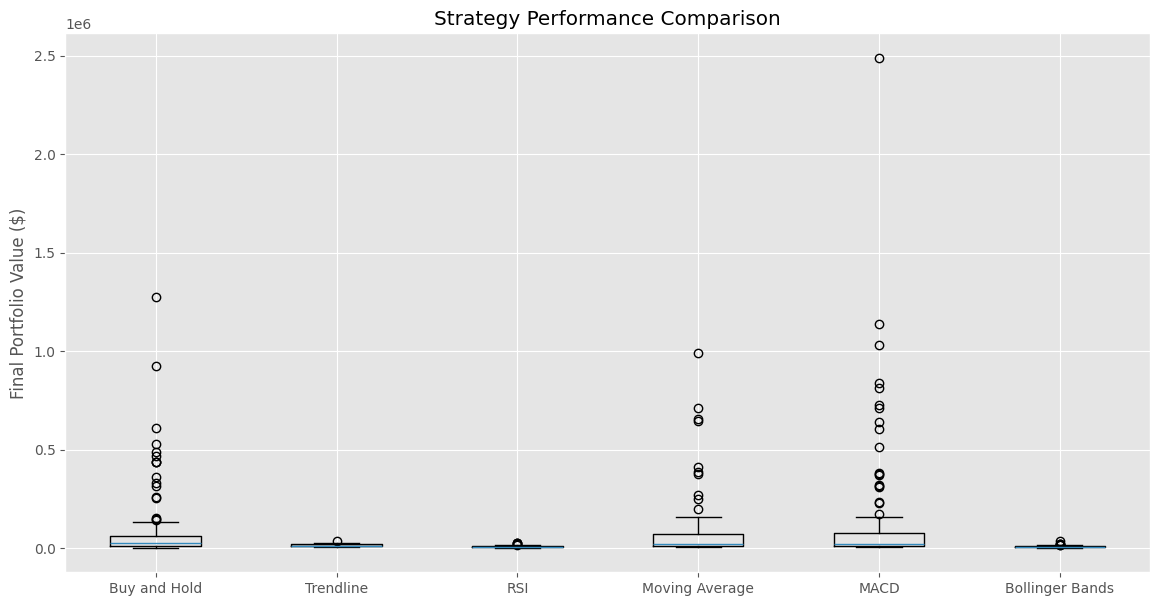

Investment Periods (years and months) with Start and End Dates:
   Start Date   End Date  Investment Period (years)  \
0  2020-12-25 2021-04-29                          0   
1  2023-02-21 2024-06-25                          1   
2  2023-09-28 2024-05-29                          0   
3  2019-07-18 2020-11-18                          1   
4  2019-01-04 2020-05-30                          1   
..        ...        ...                        ...   
95 2018-10-21 2019-01-04                          0   
96 2019-11-17 2024-02-09                          4   
97 2015-11-27 2021-07-12                          5   
98 2016-10-20 2022-09-05                          5   
99 2019-04-19 2020-05-10                          1   

    Investment Period (months)  
0                            4  
1                            4  
2                            8  
3                            4  
4                            4  
..                         ...  
95                           2  
96         

In [62]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# 데이터 다운로드
btc = yf.download('BTC-USD', start='2014-01-01', end=pd.Timestamp.today().strftime('%Y-%m-%d'))

# RSI 계산 함수
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# MACD 계산 함수
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data['Close'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal

# 볼린저 밴드 계산 함수
def calculate_bollinger_bands(data, window=20, num_std=2):
    rolling_mean = data['Close'].rolling(window=window).mean()
    rolling_std = data['Close'].rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std * num_std)
    lower_band = rolling_mean - (rolling_std * num_std)
    return upper_band, lower_band

# 1. 이동평균선 전략
def moving_average_strategy(start, end, short_window=20, long_window=60):
    cash = 10000
    btc_owned = 0
    invested = False
    
    # 이동평균선 계산
    btc['MA20'] = btc['Close'].rolling(window=short_window).mean()
    btc['MA60'] = btc['Close'].rolling(window=long_window).mean()
    
    for i in range(start + long_window, end):
        if btc['MA20'].iloc[i] > btc['MA60'].iloc[i] and not invested:  # 골든 크로스 매수
            btc_owned = cash / btc['Close'].iloc[i]
            cash = 0
            invested = True
        elif btc['MA20'].iloc[i] < btc['MA60'].iloc[i] and invested:  # 데드 크로스 매도
            cash = btc_owned * btc['Close'].iloc[i]
            btc_owned = 0
            invested = False
    
    final_value = cash + btc_owned * btc['Close'].iloc[end]
    return final_value

# 2. RSI 전략
def rsi_strategy(start, end):
    cash = 10000
    btc_owned = 0
    invested = False
    btc['RSI'] = calculate_rsi(btc)
    
    for i in range(start, end):
        if btc['RSI'].iloc[i] < 30 and not invested:  # 매수
            btc_owned = cash / btc['Close'].iloc[i]
            cash = 0
            invested = True
        elif btc['RSI'].iloc[i] > 70 and invested:  # 매도
            cash = btc_owned * btc['Close'].iloc[i]
            btc_owned = 0
            invested = False
    
    final_value = cash + btc_owned * btc['Close'].iloc[end]
    return final_value

# 3. 추세선 전략
def trendline_strategy(start, end):
    cash = 10000
    btc_owned = 0
    invested = False
    
    for i in range(start + 20, end):  # 20일 이후부터 시작
        trendline = calculate_trendline(btc[:i+1], i+1)  # i까지의 데이터를 사용하여 추세선 계산
        if btc['Close'].iloc[i] < trendline[i] and not invested:  # 매수
            btc_owned = cash / btc['Close'].iloc[i]
            cash = 0
            invested = True
        elif btc['Close'].iloc[i] > trendline[i] and invested:  # 매도
            cash = btc_owned * btc['Close'].iloc[i]
            btc_owned = 0
            invested = False
    
    final_value = cash + btc_owned * btc['Close'].iloc[end]
    return final_value

# 4. MACD 전략
def macd_strategy(start, end):
    cash = 10000
    btc_owned = 0
    invested = False
    btc['MACD'], btc['Signal'] = calculate_macd(btc)
    
    for i in range(start, end):
        if btc['MACD'].iloc[i] > btc['Signal'].iloc[i] and not invested:  # MACD가 신호선을 상향 돌파할 때 매수
            btc_owned = cash / btc['Close'].iloc[i]
            cash = 0
            invested = True
        elif btc['MACD'].iloc[i] < btc['Signal'].iloc[i] and invested:  # MACD가 신호선을 하향 돌파할 때 매도
            cash = btc_owned * btc['Close'].iloc[i]
            btc_owned = 0
            invested = False
    
    final_value = cash + btc_owned * btc['Close'].iloc[end]
    return final_value

# 5. Bollinger Bands 전략
def bollinger_strategy(start, end):
    cash = 10000
    btc_owned = 0
    invested = False
    btc['Upper Band'], btc['Lower Band'] = calculate_bollinger_bands(btc)
    
    for i in range(start, end):
        if btc['Close'].iloc[i] < btc['Lower Band'].iloc[i] and not invested:  # 가격이 하단 밴드 아래에 있을 때 매수
            btc_owned = cash / btc['Close'].iloc[i]
            cash = 0
            invested = True
        elif btc['Close'].iloc[i] > btc['Upper Band'].iloc[i] and invested:  # 가격이 상단 밴드 위에 있을 때 매도
            cash = btc_owned * btc['Close'].iloc[i]
            btc_owned = 0
            invested = False
    
    final_value = cash + btc_owned * btc['Close'].iloc[end]
    return final_value

# 6. Buy and Hold 전략 (비교용)
def buy_and_hold(start, end):
    initial_price = btc['Close'].iloc[start]
    final_price = btc['Close'].iloc[end]
    return (final_price / initial_price) * 10000  # 투자 초기 자산을 $10,000로 가정

# 시뮬레이션 실행
num_simulations = 100
results = {
    'Start Date': [],
    'End Date': [],
    'Investment Period (years)': [],
    'Investment Period (months)': [],
    'Buy and Hold': [],
    'Trendline': [],
    'RSI': [],
    'Moving Average': [],
    'MACD': [],
    'Bollinger Bands': []
}

# 시뮬레이션 실행
for _ in range(num_simulations):
    start = random.randint(60, len(btc) - 100)  # 최소 60일 이후, 마지막 100일 제외
    end = random.randint(start + 20, len(btc) - 1)  # 최소 20일 이후의 랜덤 시점
    
    # 시작 날짜와 종료 날짜 기록
    start_date = btc.index[start]
    end_date = btc.index[end]
    results['Start Date'].append(start_date)
    results['End Date'].append(end_date)
    
    # 각 전략의 성과 기록
    results['Buy and Hold'].append(buy_and_hold(start, end))
    results['Trendline'].append(trendline_strategy(start, end))
    results['RSI'].append(rsi_strategy(start, end))
    results['Moving Average'].append(moving_average_strategy(start, end))
    results['MACD'].append(macd_strategy(start, end))
    results['Bollinger Bands'].append(bollinger_strategy(start, end))
    
    # 투자 기간 기록
    investment_period = end_date - start_date
    years = investment_period.days // 365
    months = (investment_period.days % 365) // 30
    results['Investment Period (years)'].append(years)
    results['Investment Period (months)'].append(months)

# 결과 비교
results_df = pd.DataFrame(results)
print(results_df.describe())

# 결과 시각화
plt.figure(figsize=(14, 7))
plt.boxplot([results_df['Buy and Hold'], results_df['Trendline'], results_df['RSI'], results_df['Moving Average'], results_df['MACD'], results_df['Bollinger Bands']], 
            labels=['Buy and Hold', 'Trendline', 'RSI', 'Moving Average', 'MACD', 'Bollinger Bands'])
plt.title('Strategy Performance Comparison')
plt.ylabel('Final Portfolio Value ($)')
plt.grid(True)
plt.show()

# 투자 기간과 날짜 정보 출력
print("Investment Periods (years and months) with Start and End Dates:")
print(results_df[['Start Date', 'End Date', 'Investment Period (years)', 'Investment Period (months)']])


In [63]:
results_df

Start Date   End Date  Investment Period (years)  \
0  2020-12-25 2021-04-29                          0   
1  2023-02-21 2024-06-25                          1   
2  2023-09-28 2024-05-29                          0   
3  2019-07-18 2020-11-18                          1   
4  2019-01-04 2020-05-30                          1   
..        ...        ...                        ...   
95 2018-10-21 2019-01-04                          0   
96 2019-11-17 2024-02-09                          4   
97 2015-11-27 2021-07-12                          5   
98 2016-10-20 2022-09-05                          5   
99 2019-04-19 2020-05-10                          1   

    Investment Period (months)   Buy and Hold     Trendline           RSI  \
0                            4   21713.181896  10000.000000  10700.136158   
1                            4   25292.088112  14705.326683  13361.384094   
2                            8   25008.965646  12561.011627  10797.648896   
3                            4   16691.543805  19879.882326   7604.346880   
4                            4   25145.475242  39205.352128   7164.398772   
..                         ...            ...           ...           ...   
95                           2    5951.109507   6019.012298   6091.809565   
96                           2   54963.083943  21824.940674   6041.869471   
97                           7  926032.375523  25561.541967   7900.745175   
98                          10  314054.869209  14869.221220   3564.535430   
99                           0   16509.691216  18574.387517   7022.386588   

    Moving Average          MACD  Bollinger Bands  
0     10968.917405  1.775363e+04     10346.359582  
1     16553.441398  1.650097e+04     14704.667389  
2     14624.645043  1.603104e+04     10383.259651  
3     14167.178284  2.350527e+04      8845.127378  
4     27443.433245  2.381992e+04     11585.565976  
..             ...           ...              ...  
95    10000.000000  8.815368e+03      6722.694614  
96    77045.303742  5.937618e+04      6981.273222  
97   712395.043652  1.137744e+06     10079.686062  
98   388600.890825  6.409681e+05      6587.559487  
99    10628.350814  1.998956e+04     10202.068566  

[100 rows x 10 columns]

[*********************100%%**********************]  1 of 1 completed


                Start Date             End Date  Start BTC Price  \
count                  100                  100       100.000000   
mean   2019-06-28 20:38:24  2021-12-26 23:02:24     13810.903290   
min    2014-12-22 00:00:00  2016-03-21 00:00:00       229.285995   
25%    2017-03-18 18:00:00  2020-10-28 00:00:00      1153.652496   
50%    2019-06-11 00:00:00  2022-09-10 00:00:00      7848.675049   
75%    2021-10-31 12:00:00  2023-09-24 06:00:00     20661.194336   
max    2024-05-09 00:00:00  2024-08-13 00:00:00     67837.640625   
std                    NaN                  NaN     16182.934030   

       End BTC Price  Investment Period (years)  Investment Period (months)  \
count     100.000000                 100.000000                  100.000000   
mean    31696.134023                   2.040000                    5.030000   
min       413.307007                   0.000000                    0.000000   
25%     14303.576904                   0.000000                    2.00

C:\Users\ansck\AppData\Local\Temp\ipykernel_3920\1022412082.py:218: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([results_df['Buy and Hold'], results_df['Trendline'], results_df['RSI'], results_df['Moving Average'], results_df['MACD'], results_df['Bollinger Bands'], results_df['2x Leverage']],


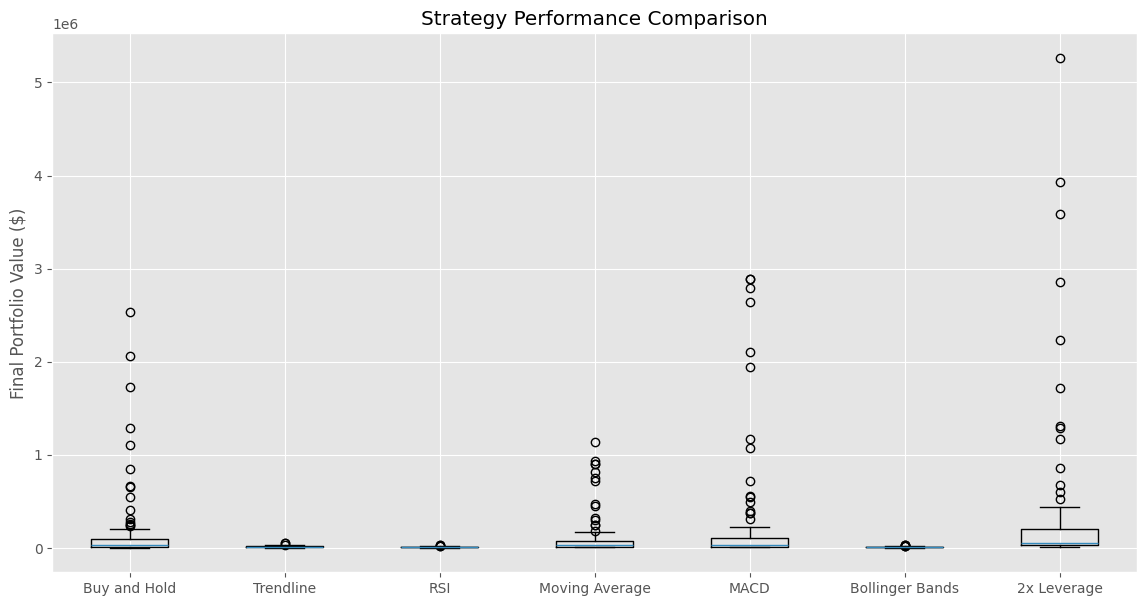

Investment Periods, Dates, and BTC Prices:
   Start Date   End Date  Start BTC Price  End BTC Price  \
0  2022-12-11 2023-12-05     17104.193359   44080.648438   
1  2016-02-08 2016-03-21       373.446991     413.307007   
2  2015-02-19 2023-09-22       240.283005   26579.568359   
3  2023-02-17 2023-10-01     24565.601562   27983.750000   
4  2023-10-08 2024-08-13     27935.089844   60609.566406   
..        ...        ...              ...            ...   
95 2018-09-15 2018-12-16      6543.200195    3252.839111   
96 2017-06-02 2022-09-20      2488.550049   18890.789062   
97 2015-10-13 2022-01-16       249.507996   43113.878906   
98 2016-02-17 2019-04-15       416.321991    5067.108398   
99 2014-12-22 2017-10-11       331.885986    4826.479980   

    Investment Period (years)  Investment Period (months)  
0                           0                          11  
1                           0                           1  
2                           8                           

In [66]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# 데이터 다운로드
btc = yf.download('BTC-USD', start='2014-01-01', end=pd.Timestamp.today().strftime('%Y-%m-%d'))

# RSI 계산 함수
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# MACD 계산 함수
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data['Close'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal

# 볼린저 밴드 계산 함수
def calculate_bollinger_bands(data, window=20, num_std=2):
    rolling_mean = data['Close'].rolling(window=window).mean()
    rolling_std = data['Close'].rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std * num_std)
    lower_band = rolling_mean - (rolling_std * num_std)
    return upper_band, lower_band

# 1. 이동평균선 전략
def moving_average_strategy(start, end, short_window=20, long_window=60):
    cash = 10000
    btc_owned = 0
    invested = False
    
    # 이동평균선 계산
    btc['MA20'] = btc['Close'].rolling(window=short_window).mean()
    btc['MA60'] = btc['Close'].rolling(window=long_window).mean()
    
    for i in range(start + long_window, end):
        if btc['MA20'].iloc[i] > btc['MA60'].iloc[i] and not invested:  # 골든 크로스 매수
            btc_owned = cash / btc['Close'].iloc[i]
            cash = 0
            invested = True
        elif btc['MA20'].iloc[i] < btc['MA60'].iloc[i] and invested:  # 데드 크로스 매도
            cash = btc_owned * btc['Close'].iloc[i]
            btc_owned = 0
            invested = False
    
    final_value = cash + btc_owned * btc['Close'].iloc[end]
    return final_value

# 2. RSI 전략
def rsi_strategy(start, end):
    cash = 10000
    btc_owned = 0
    invested = False
    btc['RSI'] = calculate_rsi(btc)
    
    for i in range(start, end):
        if btc['RSI'].iloc[i] < 30 and not invested:  # 매수
            btc_owned = cash / btc['Close'].iloc[i]
            cash = 0
            invested = True
        elif btc['RSI'].iloc[i] > 70 and invested:  # 매도
            cash = btc_owned * btc['Close'].iloc[i]
            btc_owned = 0
            invested = False
    
    final_value = cash + btc_owned * btc['Close'].iloc[end]
    return final_value

# 3. 추세선 전략
def trendline_strategy(start, end):
    cash = 10000
    btc_owned = 0
    invested = False
    
    for i in range(start + 20, end):  # 20일 이후부터 시작
        trendline = calculate_trendline(btc[:i+1], i+1)  # i까지의 데이터를 사용하여 추세선 계산
        if btc['Close'].iloc[i] < trendline[i] and not invested:  # 매수
            btc_owned = cash / btc['Close'].iloc[i]
            cash = 0
            invested = True
        elif btc['Close'].iloc[i] > trendline[i] and invested:  # 매도
            cash = btc_owned * btc['Close'].iloc[i]
            btc_owned = 0
            invested = False
    
    final_value = cash + btc_owned * btc['Close'].iloc[end]
    return final_value

# 4. MACD 전략
def macd_strategy(start, end):
    cash = 10000
    btc_owned = 0
    invested = False
    btc['MACD'], btc['Signal'] = calculate_macd(btc)
    
    for i in range(start, end):
        if btc['MACD'].iloc[i] > btc['Signal'].iloc[i] and not invested:  # MACD가 신호선을 상향 돌파할 때 매수
            btc_owned = cash / btc['Close'].iloc[i]
            cash = 0
            invested = True
        elif btc['MACD'].iloc[i] < btc['Signal'].iloc[i] and invested:  # MACD가 신호선을 하향 돌파할 때 매도
            cash = btc_owned * btc['Close'].iloc[i]
            btc_owned = 0
            invested = False
    
    final_value = cash + btc_owned * btc['Close'].iloc[end]
    return final_value

# 5. Bollinger Bands 전략
def bollinger_strategy(start, end):
    cash = 10000
    btc_owned = 0
    invested = False
    btc['Upper Band'], btc['Lower Band'] = calculate_bollinger_bands(btc)
    
    for i in range(start, end):
        if btc['Close'].iloc[i] < btc['Lower Band'].iloc[i] and not invested:  # 가격이 하단 밴드 아래에 있을 때 매수
            btc_owned = cash / btc['Close'].iloc[i]
            cash = 0
            invested = True
        elif btc['Close'].iloc[i] > btc['Upper Band'].iloc[i] and invested:  # 가격이 상단 밴드 위에 있을 때 매도
            cash = btc_owned * btc['Close'].iloc[i]
            btc_owned = 0
            invested = False
    
    final_value = cash + btc_owned * btc['Close'].iloc[end]
    return final_value

# 6. Buy and Hold 전략 (비교용)
def buy_and_hold(start, end):
    initial_price = btc['Close'].iloc[start]
    final_price = btc['Close'].iloc[end]
    return (final_price / initial_price) * 10000  # 투자 초기 자산을 $10,000로 가정

# 7. 2배 레버리지 전략
def leveraged_strategy(start, end):
    cash = 10000
    btc_owned = 0
    
    for i in range(start, end):
        leverage_return = (btc['Close'].iloc[i] / btc['Close'].iloc[i-1]) - 1  # 일일 수익률 계산
        leveraged_return = 2 * leverage_return  # 2배 레버리지 적용
        if btc_owned == 0:  # 초기 매수
            btc_owned = (cash * (1 + leveraged_return)) / btc['Close'].iloc[i]
            cash = 0
        else:
            cash = btc_owned * btc['Close'].iloc[i] * (1 + leveraged_return)
    
    final_value = cash + btc_owned * btc['Close'].iloc[end]
    return final_value

# 시뮬레이션 실행
num_simulations = 100
results = {
    'Start Date': [],
    'End Date': [],
    'Start BTC Price': [],
    'End BTC Price': [],
    'Investment Period (years)': [],
    'Investment Period (months)': [],
    'Buy and Hold': [],
    'Trendline': [],
    'RSI': [],
    'Moving Average': [],
    'MACD': [],
    'Bollinger Bands': [],
    '2x Leverage': []
}

# 시뮬레이션 실행
for _ in range(num_simulations):
    start = random.randint(60, len(btc) - 100)  # 최소 60일 이후, 마지막 100일 제외
    end = random.randint(start + 20, len(btc) - 1)  # 최소 20일 이후의 랜덤 시점
    
    # 시작 날짜와 종료 날짜 기록
    start_date = btc.index[start]
    end_date = btc.index[end]
    results['Start Date'].append(start_date)
    results['End Date'].append(end_date)
    
    # 시작 가격과 종료 가격 기록
    start_price = btc['Close'].iloc[start]
    end_price = btc['Close'].iloc[end]
    results['Start BTC Price'].append(start_price)
    results['End BTC Price'].append(end_price)
    
    # 각 전략의 성과 기록
    results['Buy and Hold'].append(buy_and_hold(start, end))
    results['Trendline'].append(trendline_strategy(start, end))
    results['RSI'].append(rsi_strategy(start, end))
    results['Moving Average'].append(moving_average_strategy(start, end))
    results['MACD'].append(macd_strategy(start, end))
    results['Bollinger Bands'].append(bollinger_strategy(start, end))
    results['2x Leverage'].append(leveraged_strategy(start, end))
    
    # 투자 기간 기록
    investment_period = end_date - start_date
    years = investment_period.days // 365
    months = (investment_period.days % 365) // 30
    results['Investment Period (years)'].append(years)
    results['Investment Period (months)'].append(months)

# 결과 비교
results_df = pd.DataFrame(results)
print(results_df.describe())

# 결과 시각화
plt.figure(figsize=(14, 7))
plt.boxplot([results_df['Buy and Hold'], results_df['Trendline'], results_df['RSI'], results_df['Moving Average'], results_df['MACD'], results_df['Bollinger Bands'], results_df['2x Leverage']], 
            labels=['Buy and Hold', 'Trendline', 'RSI', 'Moving Average', 'MACD', 'Bollinger Bands', '2x Leverage'])
plt.title('Strategy Performance Comparison')
plt.ylabel('Final Portfolio Value ($)')
plt.grid(True)
plt.show()

# 투자 기간과 날짜 정보 및 비트코인 가격 출력
print("Investment Periods, Dates, and BTC Prices:")
print(results_df[['Start Date', 'End Date', 'Start BTC Price', 'End BTC Price', 'Investment Period (years)', 'Investment Period (months)']])


In [67]:
results_df

Start Date   End Date  Start BTC Price  End BTC Price  \
0  2022-12-11 2023-12-05     17104.193359   44080.648438   
1  2016-02-08 2016-03-21       373.446991     413.307007   
2  2015-02-19 2023-09-22       240.283005   26579.568359   
3  2023-02-17 2023-10-01     24565.601562   27983.750000   
4  2023-10-08 2024-08-13     27935.089844   60609.566406   
..        ...        ...              ...            ...   
95 2018-09-15 2018-12-16      6543.200195    3252.839111   
96 2017-06-02 2022-09-20      2488.550049   18890.789062   
97 2015-10-13 2022-01-16       249.507996   43113.878906   
98 2016-02-17 2019-04-15       416.321991    5067.108398   
99 2014-12-22 2017-10-11       331.885986    4826.479980   

    Investment Period (years)  Investment Period (months)  Buy and Hold  \
0                           0                          11  2.577184e+04   
1                           0                           1  1.106735e+04   
2                           8                           7  1.106178e+06   
3                           0                           7  1.139144e+04   
4                           0                          10  2.169657e+04   
..                        ...                         ...           ...   
95                          0                           3  4.971328e+03   
96                          5                           3  7.591083e+04   
97                          6                           3  1.727956e+06   
98                          3                           1  1.217113e+05   
99                          2                           9  1.454258e+05   

       Trendline           RSI  Moving Average          MACD  Bollinger Bands  \
0   21503.714439  13611.130343    16753.282458  1.801567e+04     12890.258234   
1   10000.000000  10317.971872    10000.000000  1.129079e+04     10000.000000   
2   22553.874590   7239.827435   900650.658818  2.637371e+06     10230.033602   
3   13742.435042  13065.009502     8496.134196  1.075028e+04     13811.950655   
4   10438.165886  10591.936389    10190.661216  1.707033e+04     11027.835293   
..           ...           ...             ...           ...              ...   
95   4911.814186   5362.738907    10000.000000  6.785725e+03      5199.351351   
96  14177.572198   2765.701963   175299.160710  2.031681e+05      4970.920658   
97  25561.541967   8648.008614   721329.403996  2.106597e+06     11692.203958   
98   7468.685981  14031.818175    76820.069990  1.704345e+05     12777.995174   
99  10399.838258  27434.933643    59946.034926  1.653572e+05     27827.516328   

     2x Leverage  
0   5.262222e+04  
1   2.194927e+04  
2   2.238389e+06  
3   2.420308e+04  
4   4.329868e+04  
..           ...  
95  9.993324e+03  
96  1.658713e+05  
97  3.583337e+06  
98  2.601137e+05  
99  3.100839e+05  

[100 rows x 13 columns]

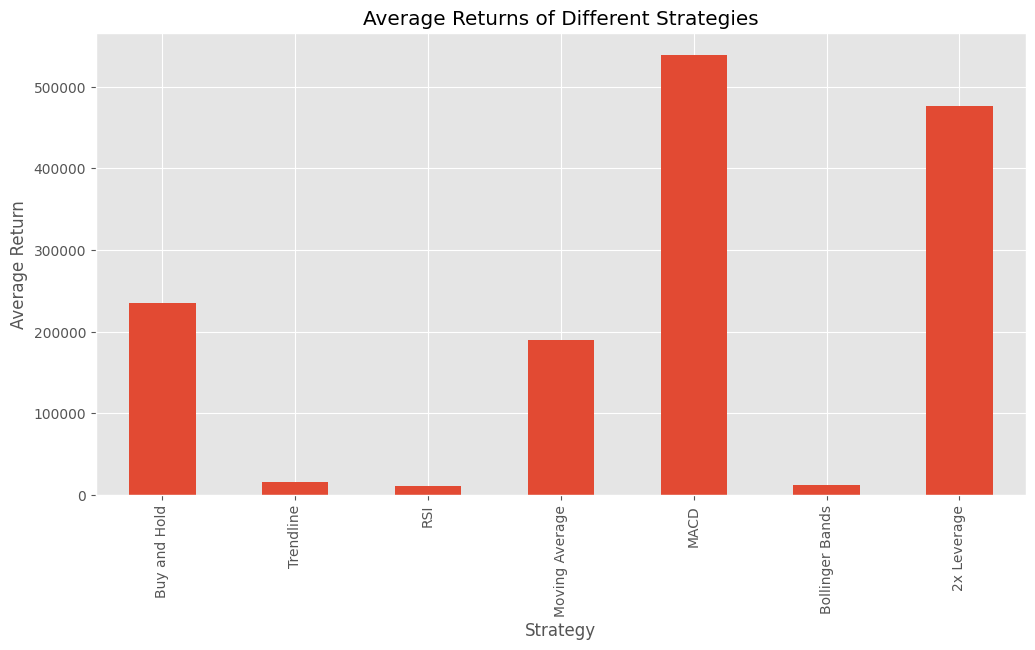

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# 예제 데이터프레임 (results_df)
data = {
    'Start Date': ['2022-12-11', '2016-02-08', '2015-02-19', '2023-02-17', '2023-10-08'],
    'End Date': ['2023-12-05', '2016-03-21', '2023-09-22', '2023-10-01', '2024-08-13'],
    'Start BTC Price': [17104.193359, 373.446991, 240.283005, 24565.601562, 27935.089844],
    'End BTC Price': [44080.648438, 413.307007, 26579.568359, 27983.750000, 60609.566406],
    'Buy and Hold': [2.577184e+04, 1.106735e+04, 1.106178e+06, 1.139144e+04, 2.169657e+04],
    'Trendline': [21503.714439, 10000.000000, 22553.874590, 13742.435042, 10438.165886],
    'RSI': [13611.130343, 10317.971872, 7239.827435, 13065.009502, 10591.936389],
    'Moving Average': [16753.282458, 10000.000000, 900650.658818, 8496.134196, 10190.661216],
    'MACD': [1.801567e+04, 1.129079e+04, 2.637371e+06, 1.075028e+04, 1.707033e+04],
    'Bollinger Bands': [12890.258234, 10000.000000, 10230.033602, 13811.950655, 11027.835293],
    '2x Leverage': [5.262222e+04, 2.194927e+04, 2.238389e+06, 2.420308e+04, 4.329868e+04]
}

results_df = pd.DataFrame(data)

# 각 전략의 평균 수익률 계산
strategies = ['Buy and Hold', 'Trendline', 'RSI', 'Moving Average', 'MACD', 'Bollinger Bands', '2x Leverage']
average_returns = results_df[strategies].mean()

# 막대 그래프로 시각화
plt.figure(figsize=(12, 6))
average_returns.plot(kind='bar')
plt.title('Average Returns of Different Strategies')
plt.xlabel('Strategy')
plt.ylabel('Average Return')
plt.show()

In [90]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from joblib import Parallel, delayed

# 데이터 다운로드
btc = yf.download('BTC-USD', start='2014-01-01', end=pd.Timestamp.today().strftime('%Y-%m-%d'))

# RSI 계산 함수
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# MACD 계산 함수
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data['Close'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal

# 볼린저 밴드 계산 함수
def calculate_bollinger_bands(data, window=20, num_std=2):
    rolling_mean = data['Close'].rolling(window=window).mean()
    rolling_std = data['Close'].rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std * num_std)
    lower_band = rolling_mean - (rolling_std * num_std)
    return upper_band, lower_band

# 전략 함수들 정의
# 1. 이동평균선 전략
def moving_average_strategy(start, end, short_window=20, long_window=60):
    cash = 10000
    btc_owned = 0
    invested = False
    
    # 이동평균선 계산
    btc['MA20'] = btc['Close'].rolling(window=short_window).mean()
    btc['MA60'] = btc['Close'].rolling(window=long_window).mean()
    
    for i in range(start + long_window, end):
        if btc['MA20'].iloc[i] > btc['MA60'].iloc[i] and not invested:  # 골든 크로스 매수
            btc_owned = cash / btc['Close'].iloc[i]
            cash = 0
            invested = True
        elif btc['MA20'].iloc[i] < btc['MA60'].iloc[i] and invested:  # 데드 크로스 매도
            cash = btc_owned * btc['Close'].iloc[i]
            btc_owned = 0
            invested = False
    
    final_value = cash + btc_owned * btc['Close'].iloc[end]
    return final_value

# 2. RSI 전략
def rsi_strategy(start, end):
    cash = 10000
    btc_owned = 0
    invested = False
    btc['RSI'] = calculate_rsi(btc)
    
    for i in range(start, end):
        if btc['RSI'].iloc[i] < 30 and not invested:  # 매수
            btc_owned = cash / btc['Close'].iloc[i]
            cash = 0
            invested = True
        elif btc['RSI'].iloc[i] > 70 and invested:  # 매도
            cash = btc_owned * btc['Close'].iloc[i]
            btc_owned = 0
            invested = False
    
    final_value = cash + btc_owned * btc['Close'].iloc[end]
    return final_value

# 3. 추세선 전략
def trendline_strategy(start, end):
    cash = 10000
    btc_owned = 0
    invested = False
    
    for i in range(start + 20, end):  # 20일 이후부터 시작
        trendline = np.polyfit(range(i+1), btc['Close'][:i+1], 1)
        trendline_value = np.polyval(trendline, i)
        if btc['Close'].iloc[i] < trendline_value and not invested:  # 매수
            btc_owned = cash / btc['Close'].iloc[i]
            cash = 0
            invested = True
        elif btc['Close'].iloc[i] > trendline_value and invested:  # 매도
            cash = btc_owned * btc['Close'].iloc[i]
            btc_owned = 0
            invested = False
    
    final_value = cash + btc_owned * btc['Close'].iloc[end]
    return final_value

# 4. MACD 전략
def macd_strategy(start, end):
    cash = 10000
    btc_owned = 0
    invested = False
    btc['MACD'], btc['Signal'] = calculate_macd(btc)
    
    for i in range(start, end):
        if btc['MACD'].iloc[i] > btc['Signal'].iloc[i] and not invested:  # MACD가 신호선을 상향 돌파할 때 매수
            btc_owned = cash / btc['Close'].iloc[i]
            cash = 0
            invested = True
        elif btc['MACD'].iloc[i] < btc['Signal'].iloc[i] and invested:  # MACD가 신호선을 하향 돌파할 때 매도
            cash = btc_owned * btc['Close'].iloc[i]
            btc_owned = 0
            invested = False
    
    final_value = cash + btc_owned * btc['Close'].iloc[end]
    return final_value

# 5. Bollinger Bands 전략
def bollinger_strategy(start, end):
    cash = 10000
    btc_owned = 0
    invested = False
    btc['Upper Band'], btc['Lower Band'] = calculate_bollinger_bands(btc)
    
    for i in range(start, end):
        if btc['Close'].iloc[i] < btc['Lower Band'].iloc[i] and not invested:  # 가격이 하단 밴드 아래에 있을 때 매수
            btc_owned = cash / btc['Close'].iloc[i]
            cash = 0
            invested = True
        elif btc['Close'].iloc[i] > btc['Upper Band'].iloc[i] and invested:  # 가격이 상단 밴드 위에 있을 때 매도
            cash = btc_owned * btc['Close'].iloc[i]
            btc_owned = 0
            invested = False
    
    final_value = cash + btc_owned * btc['Close'].iloc[end]
    return final_value

# 6. Buy and Hold 전략 (비교용)
def buy_and_hold(start, end):
    initial_price = btc['Close'].iloc[start]
    final_price = btc['Close'].iloc[end]
    return (final_price / initial_price) * 10000  # 투자 초기 자산을 $10,000로 가정

# 7. 2배 레버리지 전략
def leveraged_strategy(btc, start, end, leverage=2):
    cash = 10000
    btc_owned = 0
    
    btc_owned = cash / btc['Close'].iloc[start]
    cash = 0
    
    for i in range(start + 1, end + 1):
        daily_return = (btc['Close'].iloc[i] / btc['Close'].iloc[i-1]) - 1
        leveraged_return = leverage * daily_return
        btc_owned *= (1 + leveraged_return)
    
    final_value = btc_owned * btc['Close'].iloc[end]
    return final_value

[*********************100%%**********************]  1 of 1 completed


In [106]:
# 시뮬레이션 실행 함수 정의
def run_simulation(index):
    start = random.randint(60, len(btc) - 100)
    max_possible_end = len(btc) - 1
    end = random.randint(start + 20, min(start + 150, max_possible_end))
    
    start_date = btc.index[start]
    end_date = btc.index[end]
    start_price = btc['Close'].iloc[start]
    end_price = btc['Close'].iloc[end]
    
    investment_period = end_date - start_date
    years = investment_period.days // 365
    months = (investment_period.days % 365) // 30
    
    result = {
        'Start Date': start_date,
        'End Date': end_date,
        'Start BTC Price': start_price,
        'End BTC Price': end_price,
        'Investment Period (years)': years,
        'Investment Period (months)': months,
        'Buy and Hold': buy_and_hold(start, end),
        'Trendline': trendline_strategy(start, end),
        'RSI': rsi_strategy(start, end),
        'Moving Average': moving_average_strategy(start, end),
        'MACD': macd_strategy(start, end),
        'Bollinger Bands': bollinger_strategy(start, end),
        '2x Leverage': leveraged_strategy(btc, start, end, leverage=2)
    }
    
    return result

# 5000번 시뮬레이션 병렬 실행
num_simulations = 5000
results = Parallel(n_jobs=-1)(delayed(run_simulation)(i) for i in range(num_simulations))

# 결과를 데이터프레임으로 변환
results_df = pd.DataFrame(results)


In [104]:
results_df

Start Date   End Date  Start BTC Price  End BTC Price  \
0    2020-09-17 2021-01-22     57069.562820   52170.757852   
1    2020-11-21 2021-01-10     36342.713108   42453.184531   
2    2020-10-03 2020-11-11     39245.825982   46609.291979   
3    2020-04-03 2020-08-25     40690.566372   45136.403120   
4    2020-09-22 2021-01-17     40609.699393   40832.845420   
...         ...        ...              ...            ...   
4995 2020-07-20 2020-12-08     50616.880912   53528.915433   
4996 2020-05-12 2020-07-12     47566.938118   44682.184231   
4997 2020-11-19 2021-03-07     34971.453071   51725.455831   
4998 2020-07-13 2020-12-02     50499.769651   46649.128516   
4999 2021-02-03 2021-03-14     48842.919434   55742.745274   

      Investment Period (years)  Investment Period (months)  Buy and Hold  \
0                             0                           4   9141.608114   
1                             0                           1  11681.347071   
2                             0                           1  11876.241820   
3                             0                           4  11092.596428   
4                             0                           3  10054.948948   
...                         ...                         ...           ...   
4995                          0                           4  10575.308962   
4996                          0                           2   9393.538033   
4997                          0                           3  14790.765407   
4998                          0                           4   9237.493327   
4999                          0                           1  11412.656311   

         Trendline      RSI  Moving Average  \
0     9.811078e+07  10000.0     5018.636858   
1     1.218736e+05  10000.0    10000.000000   
2     5.104436e+04  10000.0    10000.000000   
3     2.906712e+08  10000.0     2975.294911   
4     3.947996e+07  10000.0     3879.245736   
...            ...      ...             ...   
4995  3.709040e+08  10000.0     7029.560664   
4996  6.532199e+05  10000.0    10000.000000   
4997  4.860227e+07  10000.0     9464.420917   
4998  2.214105e+08  10000.0     4960.659429   
4999  5.441745e+04  10000.0    10000.000000   

                                            MACD  Bollinger Bands  2x Leverage  
0     (1.1334410162564585, some additional info)     10000.000000     0.003871  
1     (1.0635650751059993, some additional info)     10000.000000    33.007910  
2     (1.1451221403058456, some additional info)     10000.000000    89.258209  
3     (0.8000677242330316, some additional info)     12982.238436     0.007813  
4     (1.1520529507501012, some additional info)     10000.000000     0.014665  
...                                          ...              ...          ...  
4995  (0.9202818375250365, some additional info)     10000.000000     0.001154  
4996  (0.8424702451576919, some additional info)     10000.000000     3.494974  
4997  (1.0541017203170084, some additional info)     10000.000000     0.110137  
4998  (0.9672616797619842, some additional info)     10000.000000     0.001320  
4999  (0.9017228580107736, some additional info)     10000.000000   825.450722  

[5000 rows x 13 columns]

[*********************100%%**********************]  1 of 1 completed


                       Start Date                    End Date  \
count                        5000                        5000   
mean   2019-08-19 09:09:12.960000  2019-11-13 12:34:33.600000   
min           2014-11-16 00:00:00         2014-12-29 00:00:00   
25%           2017-04-12 18:00:00         2017-07-16 00:00:00   
50%           2019-08-06 12:00:00         2019-11-01 12:00:00   
75%           2021-12-13 06:00:00         2022-03-15 06:00:00   
max           2024-05-13 00:00:00         2024-08-21 00:00:00   
std                           NaN                         NaN   

       Start BTC Price  End BTC Price  Investment Period (years)  \
count      5000.000000    5000.000000                     5000.0   
mean      16637.122084   18481.316999                        0.0   
min         199.259995     178.102997                        0.0   
25%        1231.709961    2686.810059                        0.0   
50%        8911.304199    9323.249512                        0.0   
75%   

C:\Users\ansck\AppData\Local\Temp\ipykernel_3920\3195964970.py:210: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([results_df['Buy and Hold'], results_df['Trendline'], results_df['RSI'], results_df['Moving Average'], results_df['MACD'], results_df['Bollinger Bands'], results_df['2x Leverage']],


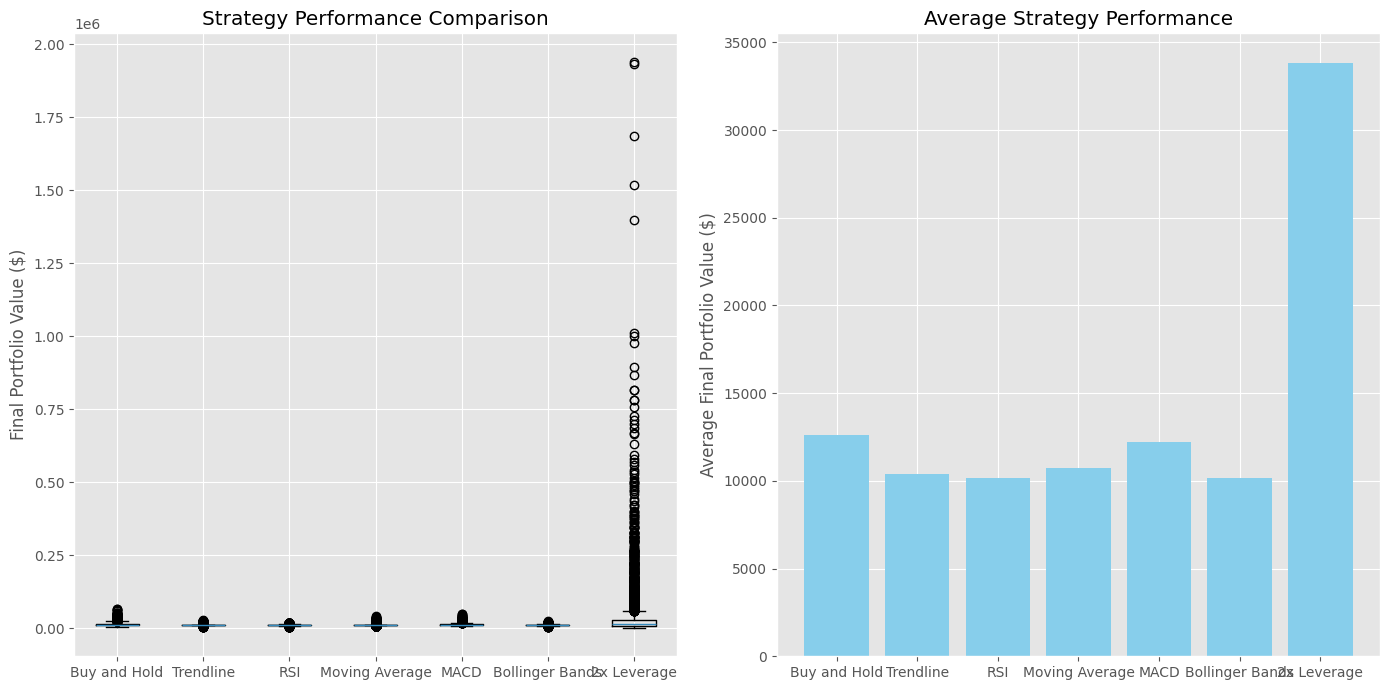

In [108]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from joblib import Parallel, delayed

# 데이터 다운로드
btc = yf.download('BTC-USD', start='2014-01-01', end=pd.Timestamp.today().strftime('%Y-%m-%d'))

# RSI 계산 함수
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# MACD 계산 함수
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data['Close'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal

# 볼린저 밴드 계산 함수
def calculate_bollinger_bands(data, window=20, num_std=2):
    rolling_mean = data['Close'].rolling(window=window).mean()
    rolling_std = data['Close'].rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std * num_std)
    lower_band = rolling_mean - (rolling_std * num_std)
    return upper_band, lower_band

# 전략 함수들 정의
# 1. 이동평균선 전략
def moving_average_strategy(start, end, short_window=20, long_window=60):
    cash = 10000
    btc_owned = 0
    invested = False
    
    # 이동평균선 계산
    btc['MA20'] = btc['Close'].rolling(window=short_window).mean()
    btc['MA60'] = btc['Close'].rolling(window=long_window).mean()
    
    for i in range(start + long_window, end):
        if btc['MA20'].iloc[i] > btc['MA60'].iloc[i] and not invested:  # 골든 크로스 매수
            btc_owned = cash / btc['Close'].iloc[i]
            cash = 0
            invested = True
        elif btc['MA20'].iloc[i] < btc['MA60'].iloc[i] and invested:  # 데드 크로스 매도
            cash = btc_owned * btc['Close'].iloc[i]
            btc_owned = 0
            invested = False
    
    final_value = cash + btc_owned * btc['Close'].iloc[end]
    return final_value

# 2. RSI 전략
def rsi_strategy(start, end):
    cash = 10000
    btc_owned = 0
    invested = False
    btc['RSI'] = calculate_rsi(btc)
    
    for i in range(start, end):
        if btc['RSI'].iloc[i] < 30 and not invested:  # 매수
            btc_owned = cash / btc['Close'].iloc[i]
            cash = 0
            invested = True
        elif btc['RSI'].iloc[i] > 70 and invested:  # 매도
            cash = btc_owned * btc['Close'].iloc[i]
            btc_owned = 0
            invested = False
    
    final_value = cash + btc_owned * btc['Close'].iloc[end]
    return final_value

# 3. 추세선 전략
def trendline_strategy(start, end):
    cash = 10000
    btc_owned = 0
    invested = False
    
    for i in range(start + 20, end):  # 20일 이후부터 시작
        trendline = np.polyfit(range(i+1), btc['Close'][:i+1], 1)
        trendline_value = np.polyval(trendline, i)
        if btc['Close'].iloc[i] < trendline_value and not invested:  # 매수
            btc_owned = cash / btc['Close'].iloc[i]
            cash = 0
            invested = True
        elif btc['Close'].iloc[i] > trendline_value and invested:  # 매도
            cash = btc_owned * btc['Close'].iloc[i]
            btc_owned = 0
            invested = False
    
    final_value = cash + btc_owned * btc['Close'].iloc[end]
    return final_value

# 4. MACD 전략
def macd_strategy(start, end):
    cash = 10000
    btc_owned = 0
    invested = False
    btc['MACD'], btc['Signal'] = calculate_macd(btc)
    
    for i in range(start, end):
        if btc['MACD'].iloc[i] > btc['Signal'].iloc[i] and not invested:  # MACD가 신호선을 상향 돌파할 때 매수
            btc_owned = cash / btc['Close'].iloc[i]
            cash = 0
            invested = True
        elif btc['MACD'].iloc[i] < btc['Signal'].iloc[i] and invested:  # MACD가 신호선을 하향 돌파할 때 매도
            cash = btc_owned * btc['Close'].iloc[i]
            btc_owned = 0
            invested = False
    
    final_value = cash + btc_owned * btc['Close'].iloc[end]
    return final_value

# 5. Bollinger Bands 전략
def bollinger_strategy(start, end):
    cash = 10000
    btc_owned = 0
    invested = False
    btc['Upper Band'], btc['Lower Band'] = calculate_bollinger_bands(btc)
    
    for i in range(start, end):
        if btc['Close'].iloc[i] < btc['Lower Band'].iloc[i] and not invested:  # 가격이 하단 밴드 아래에 있을 때 매수
            btc_owned = cash / btc['Close'].iloc[i]
            cash = 0
            invested = True
        elif btc['Close'].iloc[i] > btc['Upper Band'].iloc[i] and invested:  # 가격이 상단 밴드 위에 있을 때 매도
            cash = btc_owned * btc['Close'].iloc[i]
            btc_owned = 0
            invested = False
    
    final_value = cash + btc_owned * btc['Close'].iloc[end]
    return final_value

# 6. Buy and Hold 전략 (비교용)
def buy_and_hold(start, end):
    initial_price = btc['Close'].iloc[start]
    final_price = btc['Close'].iloc[end]
    return (final_price / initial_price) * 10000  # 투자 초기 자산을 $10,000로 가정

# 7. 2배 레버리지 전략
def leveraged_strategy(btc, start, end, leverage=2):
    cash = 10000
    btc_owned = cash / btc['Close'].iloc[start]
    cash = 0
    
    for i in range(start + 1, end + 1):
        daily_return = (btc['Close'].iloc[i] / btc['Close'].iloc[i-1]) - 1
        leveraged_return = leverage * daily_return
        btc_owned *= (1 + leveraged_return)
    
    final_value = btc_owned * btc['Close'].iloc[end]
    return final_value

# 시뮬레이션 실행 함수 정의
def run_simulation(index):
    start = random.randint(60, len(btc) - 100)
    max_possible_end = len(btc) - 1
    end = random.randint(start + 20, min(start + 150, max_possible_end))
    
    start_date = btc.index[start]
    end_date = btc.index[end]
    start_price = btc['Close'].iloc[start]
    end_price = btc['Close'].iloc[end]
    
    investment_period = end_date - start_date
    years = investment_period.days // 365
    months = (investment_period.days % 365) // 30
    
    result = {
        'Start Date': start_date,
        'End Date': end_date,
        'Start BTC Price': start_price,
        'End BTC Price': end_price,
        'Investment Period (years)': years,
        'Investment Period (months)': months,
        'Buy and Hold': buy_and_hold(start, end),
        'Trendline': trendline_strategy(start, end),
        'RSI': rsi_strategy(start, end),
        'Moving Average': moving_average_strategy(start, end),
        'MACD': macd_strategy(start, end),
        'Bollinger Bands': bollinger_strategy(start, end),
        '2x Leverage': leveraged_strategy(btc, start, end, leverage=2)
    }
    
    return result

# 5000번 시뮬레이션 병렬 실행
num_simulations = 5000
results = Parallel(n_jobs=-1)(delayed(run_simulation)(i) for i in range(num_simulations))

# 결과를 데이터프레임으로 변환
results_df = pd.DataFrame(results)

# 결과 출력
print(results_df.describe())
print(results_df[['Start Date', 'End Date', 'Start BTC Price', 'End BTC Price', 'Investment Period (years)', 'Investment Period (months)']])

# 결과 시각화
plt.figure(figsize=(14, 7))

# 상자 그림
plt.subplot(1, 2, 1)
plt.boxplot([results_df['Buy and Hold'], results_df['Trendline'], results_df['RSI'], results_df['Moving Average'], results_df['MACD'], results_df['Bollinger Bands'], results_df['2x Leverage']], 
            labels=['Buy and Hold', 'Trendline', 'RSI', 'Moving Average', 'MACD', 'Bollinger Bands', '2x Leverage'])
plt.title('Strategy Performance Comparison')
plt.ylabel('Final Portfolio Value ($)')
plt.grid(True)

# 막대 그래프
plt.subplot(1, 2, 2)
means = [results_df['Buy and Hold'].mean(), results_df['Trendline'].mean(), results_df['RSI'].mean(), results_df['Moving Average'].mean(), results_df['MACD'].mean(), results_df['Bollinger Bands'].mean(), results_df['2x Leverage'].mean()]
plt.bar(['Buy and Hold', 'Trendline', 'RSI', 'Moving Average', 'MACD', 'Bollinger Bands', '2x Leverage'], means, color='skyblue')
plt.title('Average Strategy Performance')
plt.ylabel('Average Final Portfolio Value ($)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [110]:
results_df.describe()

Start Date                    End Date  \
count                        5000                        5000   
mean   2019-08-19 09:09:12.960000  2019-11-13 12:34:33.600000   
min           2014-11-16 00:00:00         2014-12-29 00:00:00   
25%           2017-04-12 18:00:00         2017-07-16 00:00:00   
50%           2019-08-06 12:00:00         2019-11-01 12:00:00   
75%           2021-12-13 06:00:00         2022-03-15 06:00:00   
max           2024-05-13 00:00:00         2024-08-21 00:00:00   
std                           NaN                         NaN   

       Start BTC Price  End BTC Price  Investment Period (years)  \
count      5000.000000    5000.000000                     5000.0   
mean      16637.122084   18481.316999                        0.0   
min         199.259995     178.102997                        0.0   
25%        1231.709961    2686.810059                        0.0   
50%        8911.304199    9323.249512                        0.0   
75%       27790.220703   29874.374512                        0.0   
max       73083.500000   73083.500000                        0.0   
std       18096.154119   19682.805208                        0.0   

       Investment Period (months)  Buy and Hold     Trendline           RSI  \
count                 5000.000000   5000.000000   5000.000000   5000.000000   
mean                     2.370600  12635.223276  10419.909451  10137.558735   
min                      0.000000   3542.251445   4569.274270   4505.731241   
25%                      1.000000   8938.457311  10000.000000   9446.412007   
50%                      2.000000  11055.493333  10000.000000  10000.000000   
75%                      4.000000  14420.725545  10109.204677  10828.721525   
max                      5.000000  66373.663020  25894.327981  18905.328779   
std                      1.270739   6276.766477   2287.065174   1870.523850   

       Moving Average          MACD  Bollinger Bands   2x Leverage  
count     5000.000000   5000.000000      5000.000000  5.000000e+03  
mean     10720.299861  12219.838893     10145.492685  3.382396e+04  
min       5711.046531   6004.356608      4868.182910  2.804890e+02  
25%       9916.610413   9738.709396      9427.809316  6.362924e+03  
50%      10000.000000  11206.629201     10000.000000  1.253888e+04  
75%      10497.095344  13238.705198     10899.474417  2.727191e+04  
max      39971.221776  46848.647860     23647.428194  1.941047e+06  
std       2785.589265   4159.023441      1908.979418  8.994917e+04

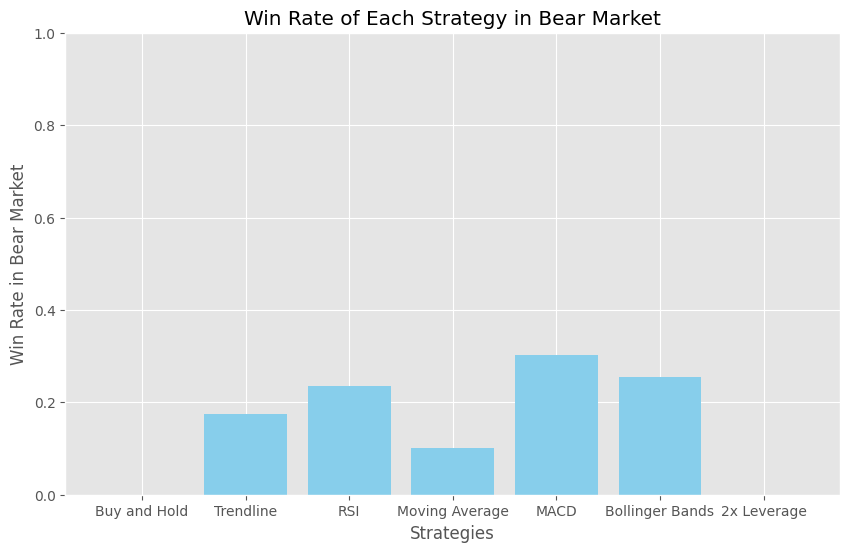

In [112]:
import matplotlib.pyplot as plt

# 하락장 정의
bear_market = results_df['Start BTC Price'] > results_df['End BTC Price']

# 각 전략이 하락장에서 이익을 얻었는지 여부 확인
strategies = ['Buy and Hold', 'Trendline', 'RSI', 'Moving Average', 'MACD', 'Bollinger Bands', '2x Leverage']
win_rates = {}

for strategy in strategies:
    wins = (results_df.loc[bear_market, strategy] > 10000).sum()
    total = bear_market.sum()
    win_rate = wins / total if total > 0 else 0
    win_rates[strategy] = win_rate

# 승률 시각화
plt.figure(figsize=(10, 6))
plt.bar(win_rates.keys(), win_rates.values(), color='skyblue')
plt.xlabel('Strategies')
plt.ylabel('Win Rate in Bear Market')
plt.title('Win Rate of Each Strategy in Bear Market')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

[*********************100%%**********************]  1 of 1 completed


Overall Win Rate: 70.70%
Yearly Win Rates:
Year
2014    0.310345
2015    1.000000
2016    1.000000
2017    0.813793
2018    0.600000
2019    0.556701
2020    1.000000
2021    0.035398
2022    0.561404
2023    1.000000
Name: Success, dtype: float64


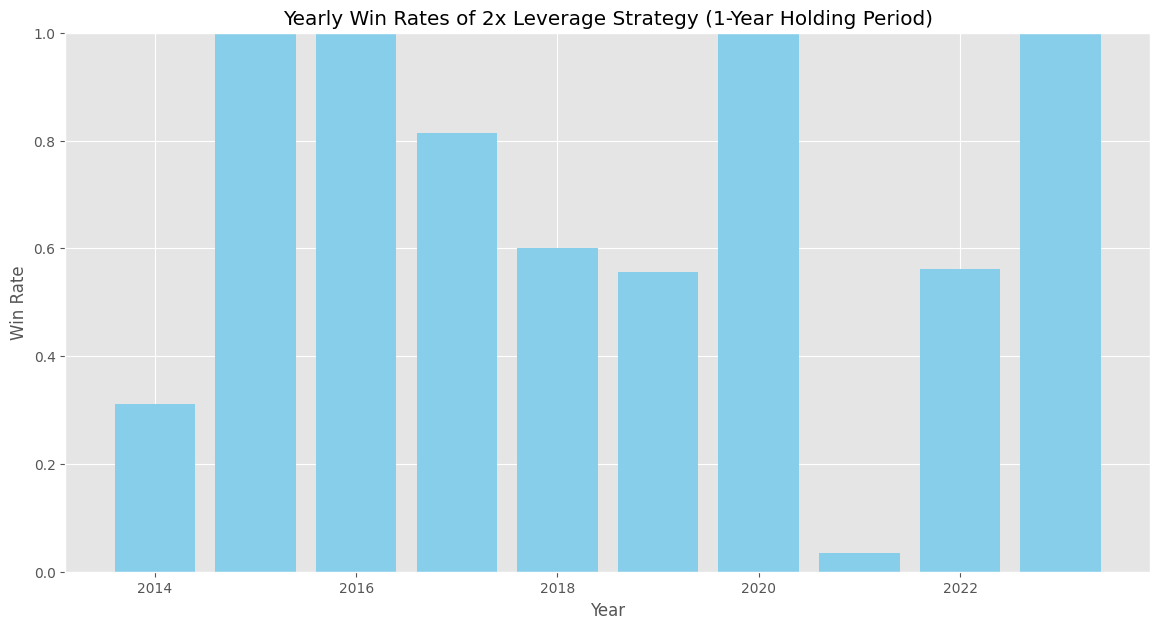

In [114]:
import yfinance as yf
import pandas as pd
import numpy as np
import random
from datetime import timedelta
import matplotlib.pyplot as plt

# 데이터 다운로드
btc = yf.download('BTC-USD', start='2014-01-01', end=pd.Timestamp.today().strftime('%Y-%m-%d'))

# 2배 레버리지 전략 함수
def leveraged_strategy(btc, start_idx, end_idx, leverage=2, initial_cash=10000):
    cash = initial_cash
    btc_owned = cash / btc['Close'].iloc[start_idx]
    cash = 0
    
    for i in range(start_idx + 1, end_idx + 1):
        daily_return = (btc['Close'].iloc[i] / btc['Close'].iloc[i-1]) - 1
        leveraged_return = leverage * daily_return
        btc_owned *= (1 + leveraged_return)
    
    final_value = btc_owned * btc['Close'].iloc[end_idx]
    return final_value

# 시뮬레이션 실행 함수
def run_simulation(btc, num_simulations=1000, holding_period_days=365):
    results = []
    for _ in range(num_simulations):
        start_idx = random.randint(0, len(btc) - holding_period_days - 1)
        end_idx = start_idx + holding_period_days
        start_date = btc.index[start_idx]
        end_date = btc.index[end_idx]
        
        final_value = leveraged_strategy(btc, start_idx, end_idx)
        success = final_value > 10000
        results.append((start_date.year, success))
    
    return results

# 시뮬레이션 실행
num_simulations = 1000
results = run_simulation(btc, num_simulations)

# 데이터프레임으로 변환
results_df = pd.DataFrame(results, columns=['Year', 'Success'])

# 전체 승률 계산
overall_win_rate = results_df['Success'].mean()

# 연도별 승률 계산
yearly_win_rates = results_df.groupby('Year')['Success'].mean()

# 결과 출력
print(f"Overall Win Rate: {overall_win_rate:.2%}")
print("Yearly Win Rates:")
print(yearly_win_rates)

# 승률 시각화
plt.figure(figsize=(14, 7))
plt.bar(yearly_win_rates.index, yearly_win_rates.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Win Rate')
plt.title('Yearly Win Rates of 2x Leverage Strategy (1-Year Holding Period)')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

[*********************100%%**********************]  1 of 1 completed


Overall Win Rate: 67.00%
Overall Average Profit: $957336.72
Yearly Win Rates and Average Profits:
       Success        Profit
Year                        
2014  0.194444 -4.086359e+03
2015  1.000000  5.937691e+04
2016  1.000000  5.273499e+06
2017  0.843478  1.395446e+06
2018  0.500000  3.899838e+03
2019  0.472222  3.019883e+04
2020  1.000000  1.137825e+06
2021  0.025862 -7.733102e+03
2022  0.490566  1.514233e+04
2023  1.000000  8.361982e+04


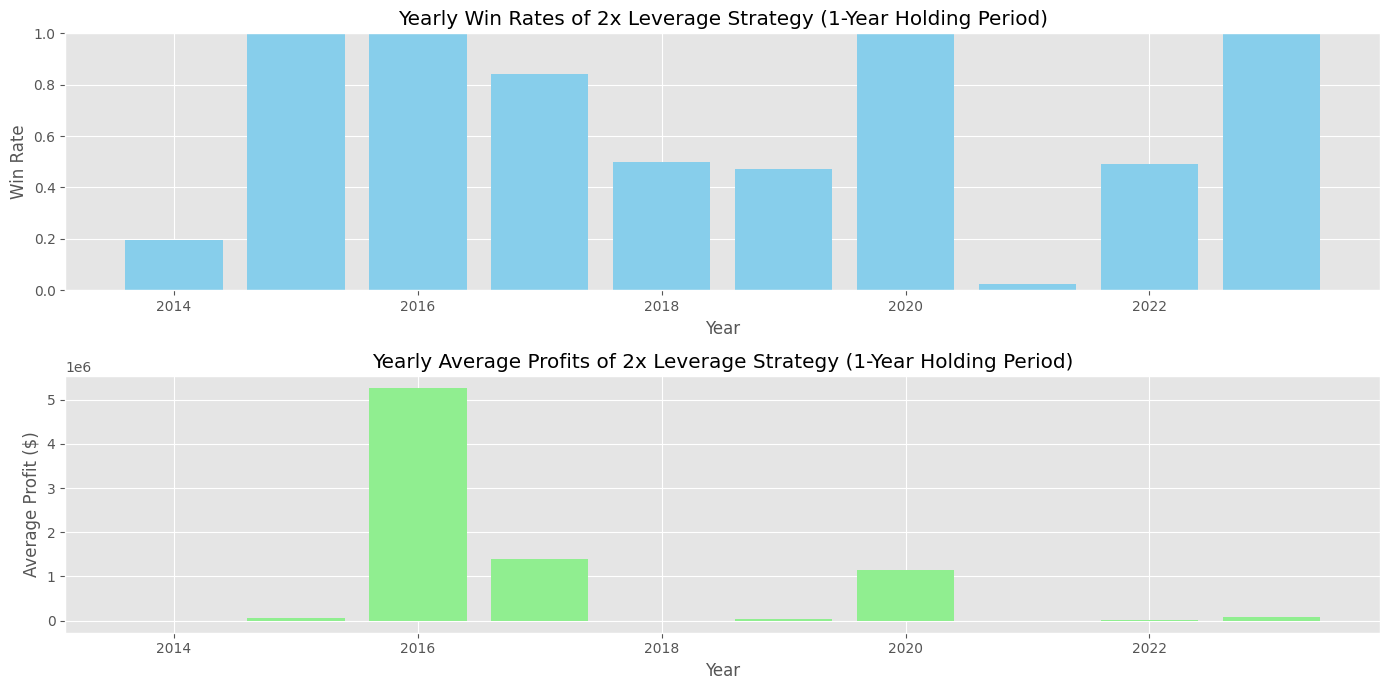

In [115]:
import yfinance as yf
import pandas as pd
import numpy as np
import random
from datetime import timedelta
import matplotlib.pyplot as plt

# 데이터 다운로드
btc = yf.download('BTC-USD', start='2014-01-01', end=pd.Timestamp.today().strftime('%Y-%m-%d'))

# 2배 레버리지 전략 함수
def leveraged_strategy(btc, start_idx, end_idx, leverage=2, initial_cash=10000):
    cash = initial_cash
    btc_owned = cash / btc['Close'].iloc[start_idx]
    cash = 0
    
    for i in range(start_idx + 1, end_idx + 1):
        daily_return = (btc['Close'].iloc[i] / btc['Close'].iloc[i-1]) - 1
        leveraged_return = leverage * daily_return
        btc_owned *= (1 + leveraged_return)
    
    final_value = btc_owned * btc['Close'].iloc[end_idx]
    return final_value

# 시뮬레이션 실행 함수
def run_simulation(btc, num_simulations=1000, holding_period_days=365):
    results = []
    for _ in range(num_simulations):
        start_idx = random.randint(0, len(btc) - holding_period_days - 1)
        end_idx = start_idx + holding_period_days
        start_date = btc.index[start_idx]
        end_date = btc.index[end_idx]
        
        final_value = leveraged_strategy(btc, start_idx, end_idx)
        profit = final_value - 10000
        success = final_value > 10000
        results.append((start_date.year, success, profit))
    
    return results

# 시뮬레이션 실행
num_simulations = 1000
results = run_simulation(btc, num_simulations)

# 데이터프레임으로 변환
results_df = pd.DataFrame(results, columns=['Year', 'Success', 'Profit'])

# 전체 승률 및 평균 수익 계산
overall_win_rate = results_df['Success'].mean()
overall_avg_profit = results_df['Profit'].mean()

# 연도별 승률 및 평균 수익 계산
yearly_stats = results_df.groupby('Year').agg({'Success': 'mean', 'Profit': 'mean'})

# 결과 출력
print(f"Overall Win Rate: {overall_win_rate:.2%}")
print(f"Overall Average Profit: ${overall_avg_profit:.2f}")
print("Yearly Win Rates and Average Profits:")
print(yearly_stats)

# 승률 시각화
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.bar(yearly_stats.index, yearly_stats['Success'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Win Rate')
plt.title('Yearly Win Rates of 2x Leverage Strategy (1-Year Holding Period)')
plt.ylim(0, 1)
plt.grid(True)

# 평균 수익 시각화
plt.subplot(2, 1, 2)
plt.bar(yearly_stats.index, yearly_stats['Profit'], color='lightgreen')
plt.xlabel('Year')
plt.ylabel('Average Profit ($)')
plt.title('Yearly Average Profits of 2x Leverage Strategy (1-Year Holding Period)')
plt.grid(True)

plt.tight_layout()
plt.show()

[*********************100%%**********************]  1 of 1 completed


Overall Win Rate: 69.10%
Overall Average Profit: $943743.37
Yearly Win Rates and Average Profits:
       Success        Profit
Year                        
2014  0.111111 -5.183012e+03
2015  1.000000  6.572131e+04
2016  1.000000  6.046422e+06
2017  0.712871  1.208002e+06
2018  0.605263  7.759134e+03
2019  0.523077  2.804194e+04
2020  1.000000  8.218024e+05
2021  0.028037 -7.538045e+03
2022  0.598214  1.414493e+04
2023  1.000000  8.888459e+04


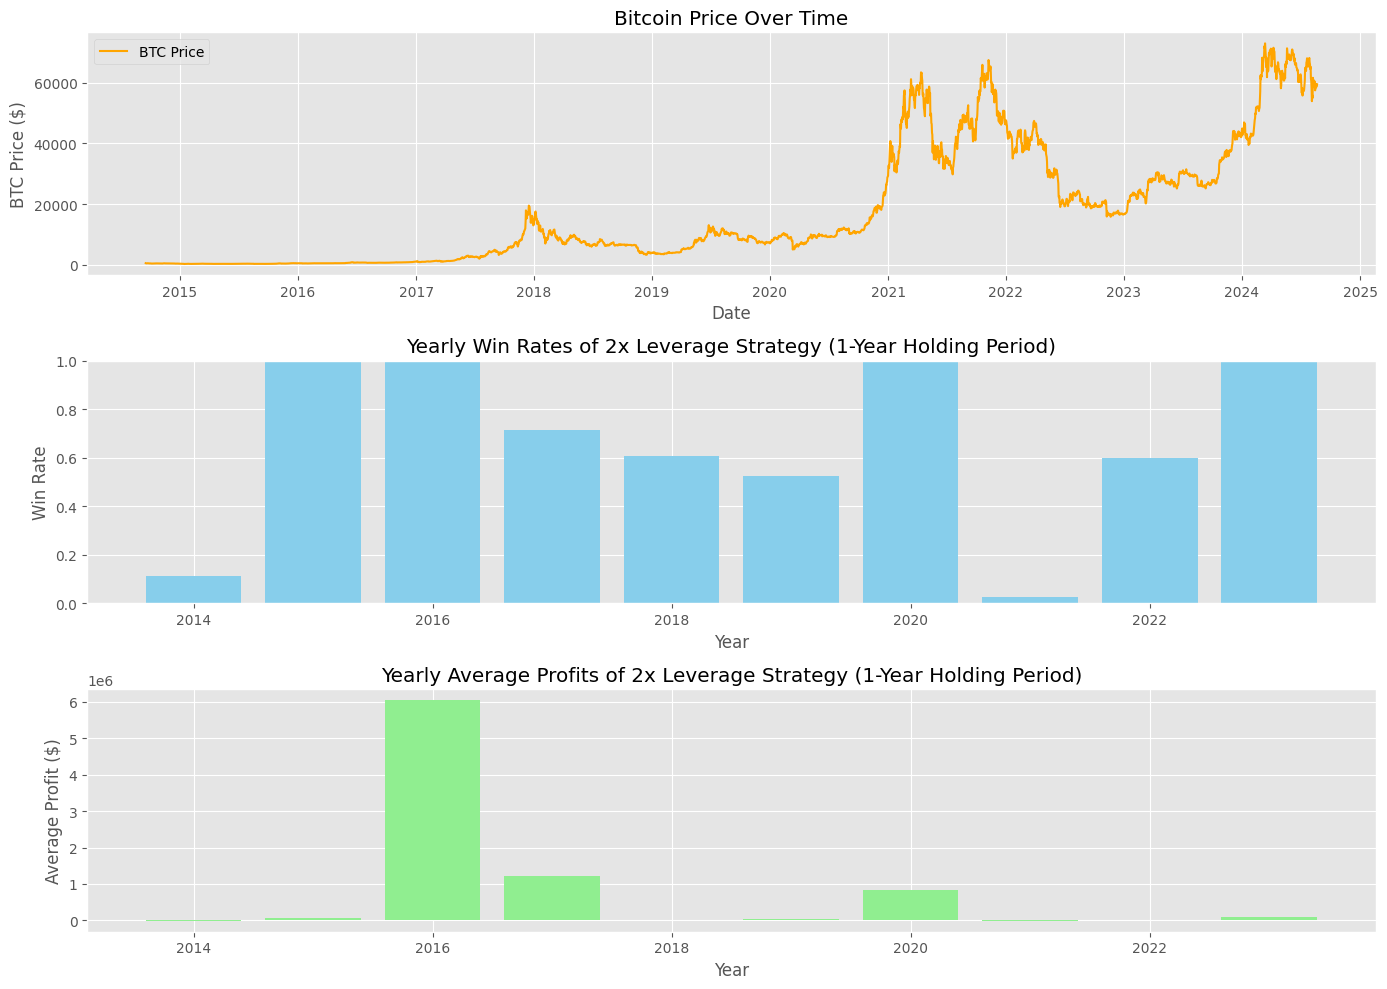

In [116]:
import yfinance as yf
import pandas as pd
import numpy as np
import random
from datetime import timedelta
import matplotlib.pyplot as plt

# 데이터 다운로드
btc = yf.download('BTC-USD', start='2014-01-01', end=pd.Timestamp.today().strftime('%Y-%m-%d'))

# 2배 레버리지 전략 함수
def leveraged_strategy(btc, start_idx, end_idx, leverage=2, initial_cash=10000):
    cash = initial_cash
    btc_owned = cash / btc['Close'].iloc[start_idx]
    cash = 0
    
    for i in range(start_idx + 1, end_idx + 1):
        daily_return = (btc['Close'].iloc[i] / btc['Close'].iloc[i-1]) - 1
        leveraged_return = leverage * daily_return
        btc_owned *= (1 + leveraged_return)
    
    final_value = btc_owned * btc['Close'].iloc[end_idx]
    return final_value

# 시뮬레이션 실행 함수
def run_simulation(btc, num_simulations=1000, holding_period_days=365):
    results = []
    for _ in range(num_simulations):
        start_idx = random.randint(0, len(btc) - holding_period_days - 1)
        end_idx = start_idx + holding_period_days
        start_date = btc.index[start_idx]
        end_date = btc.index[end_idx]
        
        final_value = leveraged_strategy(btc, start_idx, end_idx)
        profit = final_value - 10000
        success = final_value > 10000
        results.append((start_date.year, success, profit))
    
    return results

# 시뮬레이션 실행
num_simulations = 1000
results = run_simulation(btc, num_simulations)

# 데이터프레임으로 변환
results_df = pd.DataFrame(results, columns=['Year', 'Success', 'Profit'])

# 전체 승률 및 평균 수익 계산
overall_win_rate = results_df['Success'].mean()
overall_avg_profit = results_df['Profit'].mean()

# 연도별 승률 및 평균 수익 계산
yearly_stats = results_df.groupby('Year').agg({'Success': 'mean', 'Profit': 'mean'})

# 결과 출력
print(f"Overall Win Rate: {overall_win_rate:.2%}")
print(f"Overall Average Profit: ${overall_avg_profit:.2f}")
print("Yearly Win Rates and Average Profits:")
print(yearly_stats)

# 시각화
plt.figure(figsize=(14, 10))

# 비트코인 가격 그래프
plt.subplot(3, 1, 1)
plt.plot(btc['Close'], label='BTC Price', color='orange')
plt.xlabel('Date')
plt.ylabel('BTC Price ($)')
plt.title('Bitcoin Price Over Time')
plt.legend()
plt.grid(True)

# 승률 시각화
plt.subplot(3, 1, 2)
plt.bar(yearly_stats.index, yearly_stats['Success'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Win Rate')
plt.title('Yearly Win Rates of 2x Leverage Strategy (1-Year Holding Period)')
plt.ylim(0, 1)
plt.grid(True)

# 평균 수익 시각화
plt.subplot(3, 1, 3)
plt.bar(yearly_stats.index, yearly_stats['Profit'], color='lightgreen')
plt.xlabel('Year')
plt.ylabel('Average Profit ($)')
plt.title('Yearly Average Profits of 2x Leverage Strategy (1-Year Holding Period)')
plt.grid(True)

plt.tight_layout()
plt.show()

[*********************100%%**********************]  1 of 1 completed


Overall Win Rate: 69.70%
Overall Average Profit: $853253.91
Yearly Win Rates and Average Profits:
       Success        Profit
Year                        
2014  0.320000 -4.106712e+03
2015  1.000000  6.414034e+04
2016  1.000000  4.626739e+06
2017  0.826531  1.637212e+06
2018  0.490566  6.108223e+03
2019  0.565217  2.740974e+04
2020  1.000000  1.044145e+06
2021  0.009009 -7.742731e+03
2022  0.560000  2.216773e+04
2023  1.000000  1.018606e+05


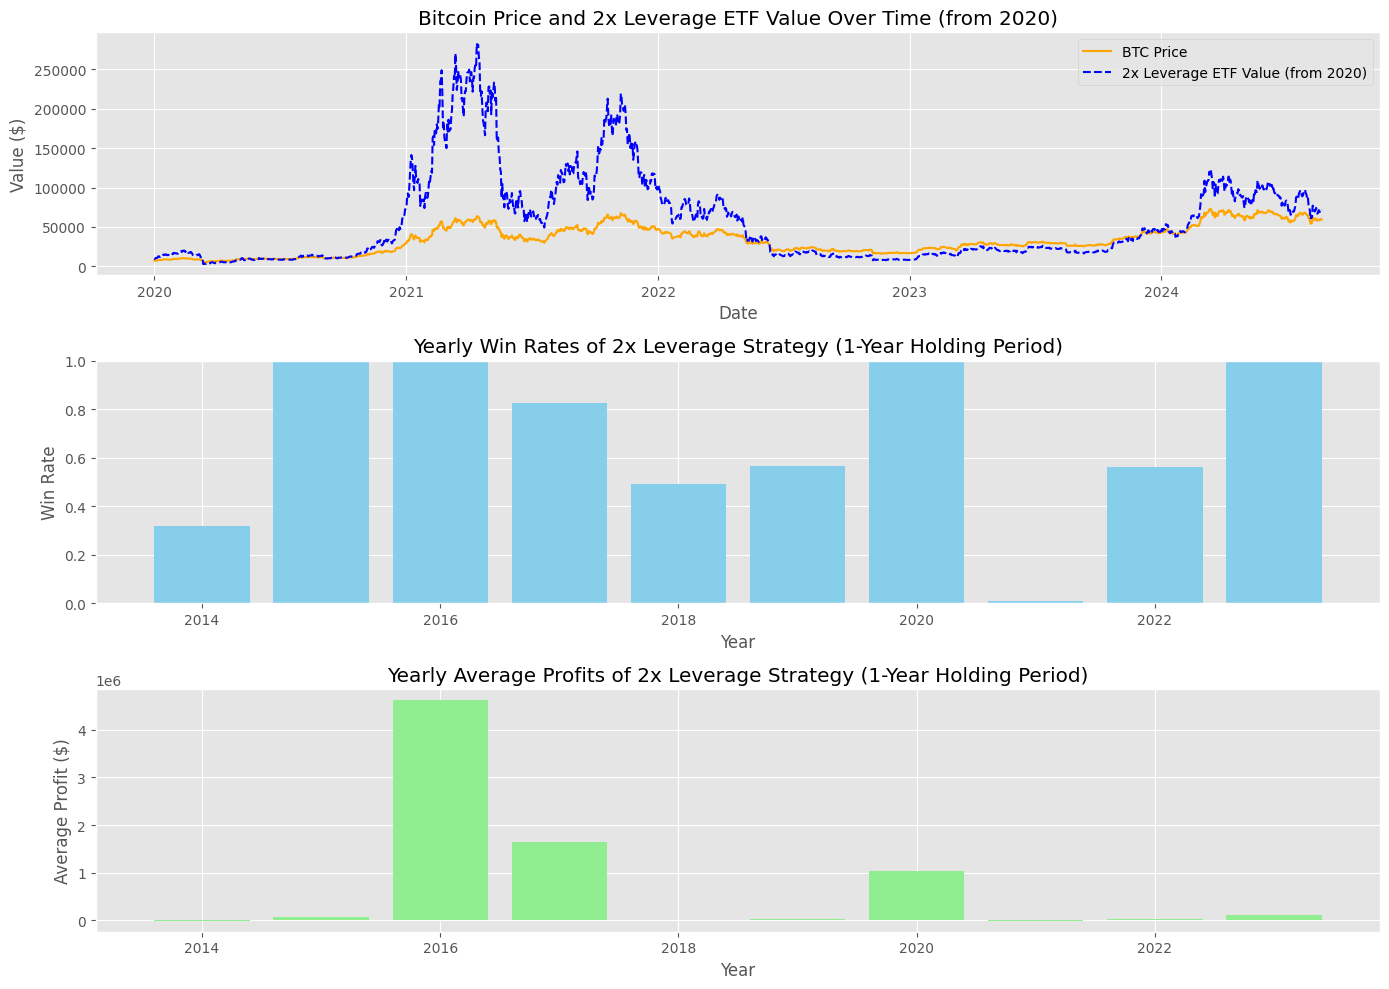

In [121]:
import yfinance as yf
import pandas as pd
import numpy as np
import random
from datetime import timedelta
import matplotlib.pyplot as plt

# 데이터 다운로드
btc = yf.download('BTC-USD', start='2014-01-01', end=pd.Timestamp.today().strftime('%Y-%m-%d'))

# 2020년부터 데이터 필터링
btc_2020 = btc[btc.index >= '2020-01-01']

# 2배 레버리지 전략 함수
def leveraged_strategy(btc, start_idx, end_idx, leverage=2, initial_cash=10000):
    cash = initial_cash
    btc_owned = cash / btc['Close'].iloc[start_idx]
    cash = 0
    
    for i in range(start_idx + 1, end_idx + 1):
        daily_return = (btc['Close'].iloc[i] / btc['Close'].iloc[i-1]) - 1
        leveraged_return = leverage * daily_return
        btc_owned *= (1 + leveraged_return)
    
    final_value = btc_owned * btc['Close'].iloc[end_idx]
    return final_value

# 2배 레버리지 ETF 가치 계산 함수
def calculate_leveraged_etf(btc, leverage=2, initial_cash=10000):
    etf_value = [initial_cash]
    for i in range(1, len(btc)):
        daily_return = (btc['Close'].iloc[i] / btc['Close'].iloc[i-1]) - 1
        leveraged_return = leverage * daily_return
        new_value = etf_value[-1] * (1 + leveraged_return)
        etf_value.append(new_value)
    return etf_value

# 2배 레버리지 ETF 가치 계산 (2020년부터)
leveraged_etf_value_2020 = calculate_leveraged_etf(btc_2020)

# 시뮬레이션 실행 함수
def run_simulation(btc, num_simulations=1000, holding_period_days=365):
    results = []
    for _ in range(num_simulations):
        start_idx = random.randint(0, len(btc) - holding_period_days - 1)
        end_idx = start_idx + holding_period_days
        start_date = btc.index[start_idx]
        end_date = btc.index[end_idx]
        
        final_value = leveraged_strategy(btc, start_idx, end_idx)
        profit = final_value - 10000
        success = final_value > 10000
        results.append((start_date.year, success, profit))
    
    return results

# 시뮬레이션 실행
num_simulations = 1000
results = run_simulation(btc, num_simulations)

# 데이터프레임으로 변환
results_df = pd.DataFrame(results, columns=['Year', 'Success', 'Profit'])

# 전체 승률 및 평균 수익 계산
overall_win_rate = results_df['Success'].mean()
overall_avg_profit = results_df['Profit'].mean()

# 연도별 승률 및 평균 수익 계산
yearly_stats = results_df.groupby('Year').agg({'Success': 'mean', 'Profit': 'mean'})

# 결과 출력
print(f"Overall Win Rate: {overall_win_rate:.2%}")
print(f"Overall Average Profit: ${overall_avg_profit:.2f}")
print("Yearly Win Rates and Average Profits:")
print(yearly_stats)

# 시각화
plt.figure(figsize=(14, 10))

# 비트코인 가격 및 2배 레버리지 ETF 그래프 (2020년부터)
plt.subplot(3, 1, 1)
plt.plot(btc_2020['Close'], label='BTC Price', color='orange')
plt.plot(btc_2020.index, leveraged_etf_value_2020, label='2x Leverage ETF Value (from 2020)', color='blue', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Value ($)')
plt.title('Bitcoin Price and 2x Leverage ETF Value Over Time (from 2020)')
plt.legend()
plt.grid(True)

# 승률 시각화
plt.subplot(3, 1, 2)
plt.bar(yearly_stats.index, yearly_stats['Success'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Win Rate')
plt.title('Yearly Win Rates of 2x Leverage Strategy (1-Year Holding Period)')
plt.ylim(0, 1)
plt.grid(True)

# 평균 수익 시각화
plt.subplot(3, 1, 3)
plt.bar(yearly_stats.index, yearly_stats['Profit'], color='lightgreen')
plt.xlabel('Year')
plt.ylabel('Average Profit ($)')
plt.title('Yearly Average Profits of 2x Leverage Strategy (1-Year Holding Period)')
plt.grid(True)

plt.tight_layout()
plt.show()

[*********************100%%**********************]  1 of 1 completed


Overall Win Rate: 63.02%
Overall Average Profit: $150606.95
Yearly Win Rates and Average Profits:
       Success         Profit
Year                         
2014  0.025974   -6780.261531
2015  0.786792   22993.353314
2016  0.935305  306807.092148
2017  0.815269  723399.521119
2018  0.300377    3561.801135
2019  0.553623   20947.429903
2020  0.842549  300260.533180
2021  0.313528    -620.853382
2022  0.435530    2680.402450
2023  0.875506   35383.572689
2024  0.653061    6965.965490
Optimal Holding Period: 348 days
Average Profit for Optimal Holding Period: $2173753.43


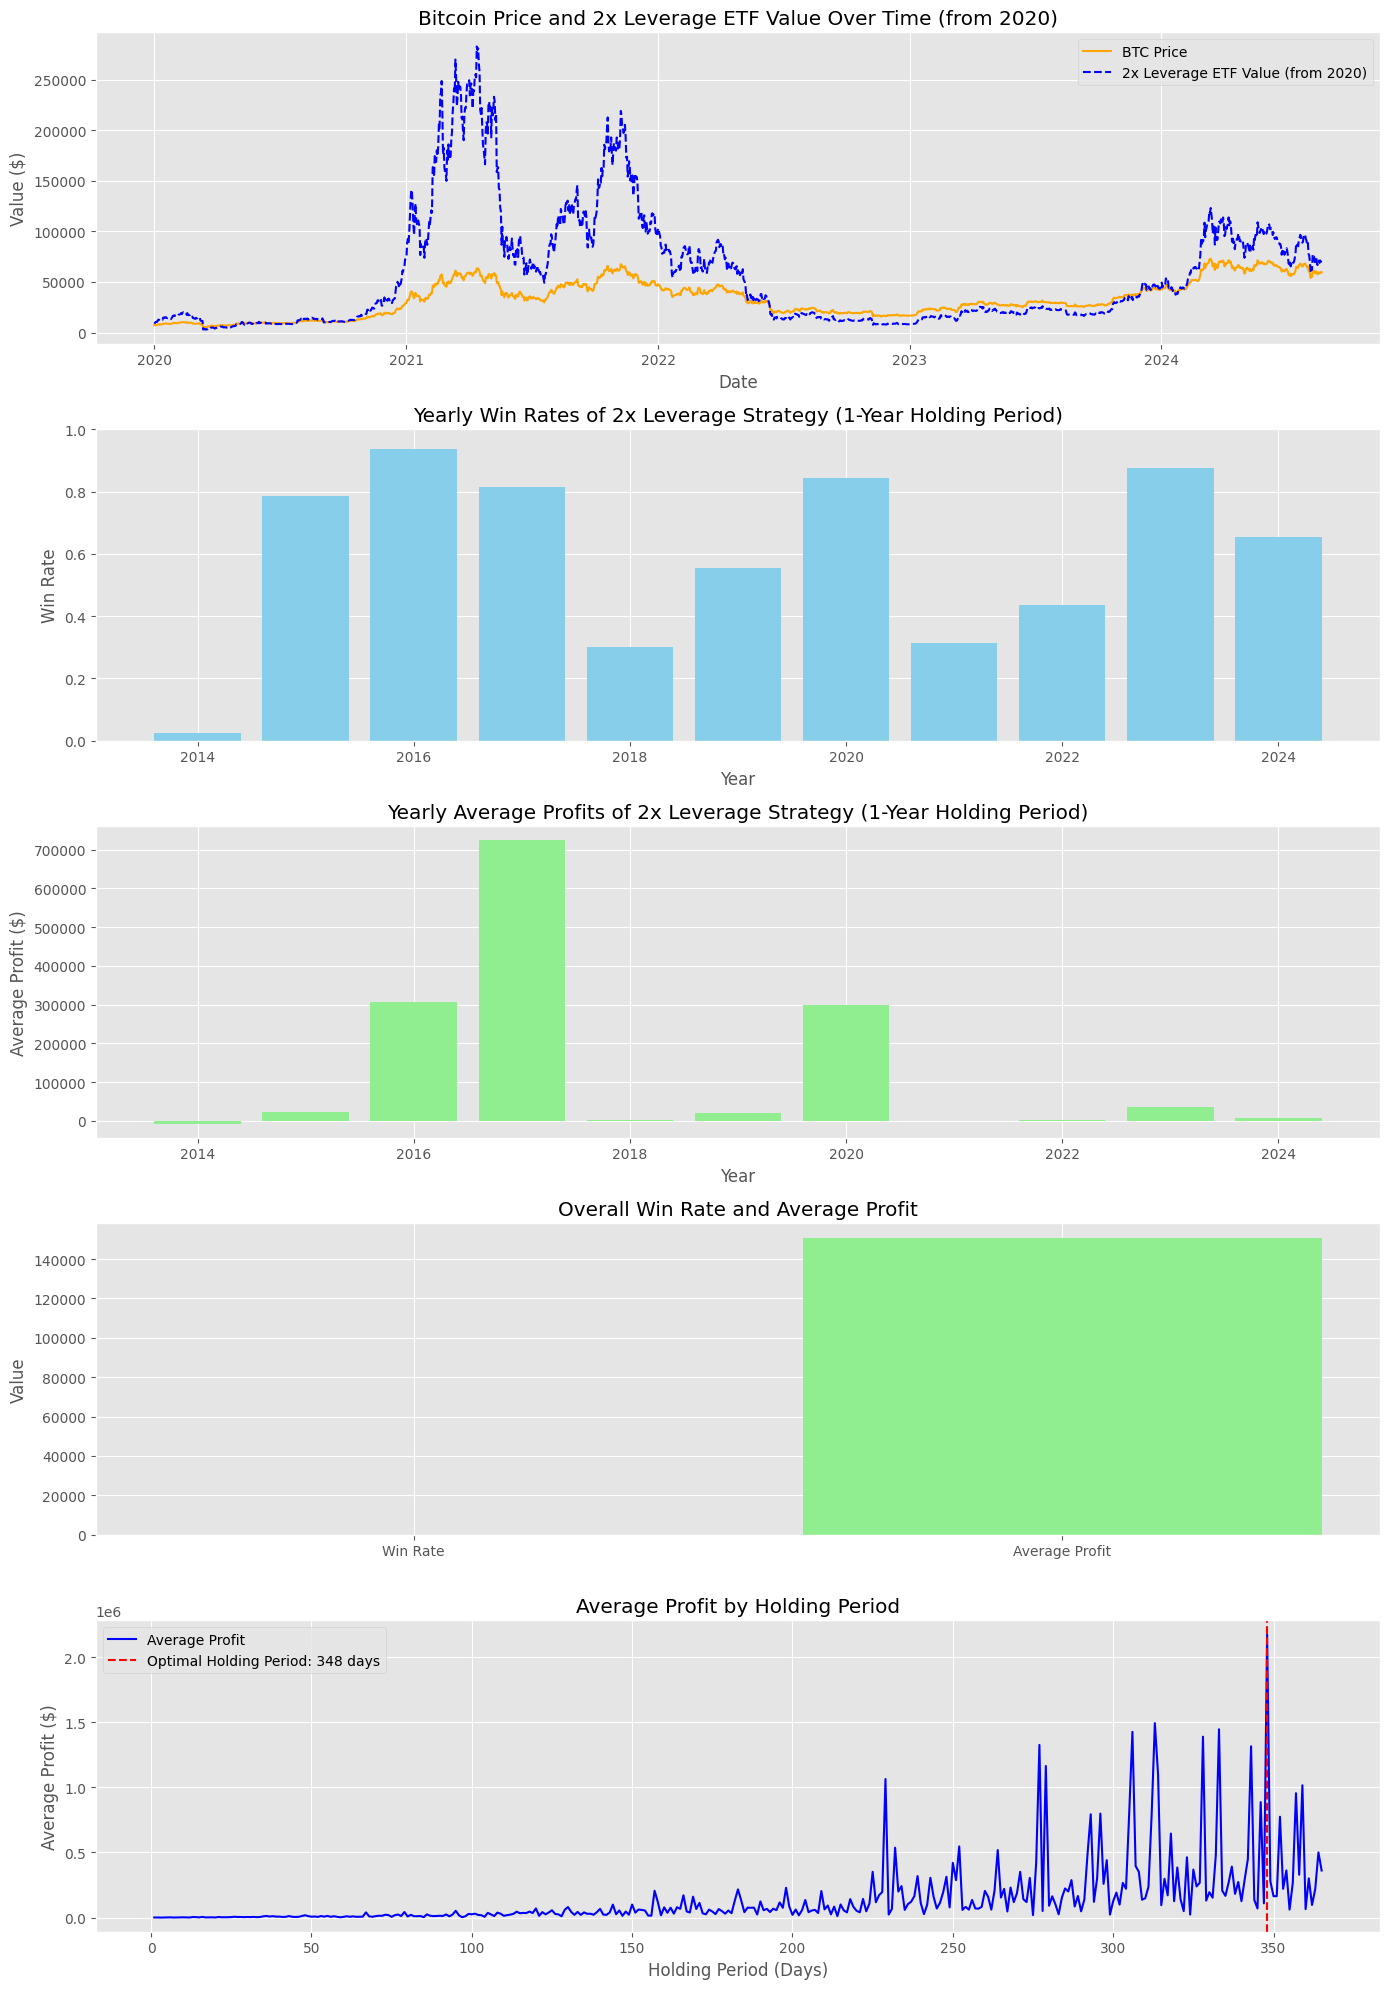

In [124]:
import yfinance as yf
import pandas as pd
import numpy as np
import random
from datetime import timedelta
import matplotlib.pyplot as plt

# 데이터 다운로드
btc = yf.download('BTC-USD', start='2014-01-01', end=pd.Timestamp.today().strftime('%Y-%m-%d'))

# 2020년부터 데이터 필터링
btc_2020 = btc[btc.index >= '2020-01-01']

# 2배 레버리지 전략 함수
def leveraged_strategy(btc, start_idx, end_idx, leverage=2, initial_cash=10000):
    cash = initial_cash
    btc_owned = cash / btc['Close'].iloc[start_idx]
    cash = 0
    
    for i in range(start_idx + 1, end_idx + 1):
        daily_return = (btc['Close'].iloc[i] / btc['Close'].iloc[i-1]) - 1
        leveraged_return = leverage * daily_return
        btc_owned *= (1 + leveraged_return)
    
    final_value = btc_owned * btc['Close'].iloc[end_idx]
    return final_value

# 2배 레버리지 ETF 가치 계산 함수
def calculate_leveraged_etf(btc, leverage=2, initial_cash=10000):
    etf_value = [initial_cash]
    for i in range(1, len(btc)):
        daily_return = (btc['Close'].iloc[i] / btc['Close'].iloc[i-1]) - 1
        leveraged_return = leverage * daily_return
        new_value = etf_value[-1] * (1 + leveraged_return)
        etf_value.append(new_value)
    return etf_value

# 2배 레버리지 ETF 가치 계산 (2020년부터)
leveraged_etf_value_2020 = calculate_leveraged_etf(btc_2020)

# 시뮬레이션 실행 함수
def run_simulation(btc, num_simulations=10000, min_days=1, max_days=365):
    results = []
    for _ in range(num_simulations):
        holding_period_days = random.randint(min_days, max_days)
        start_idx = random.randint(0, len(btc) - holding_period_days - 1)
        end_idx = start_idx + holding_period_days
        start_date = btc.index[start_idx]
        end_date = btc.index[end_idx]
        
        final_value = leveraged_strategy(btc, start_idx, end_idx)
        profit = final_value - 10000
        success = final_value > 10000
        results.append((holding_period_days, success, profit, start_date.year))
    
    return results

# 시뮬레이션 실행
num_simulations = 10000
results = run_simulation(btc, num_simulations)

# 데이터프레임으로 변환
results_df = pd.DataFrame(results, columns=['HoldingPeriodDays', 'Success', 'Profit', 'Year'])

# 전체 승률 및 평균 수익 계산
overall_win_rate = results_df['Success'].mean()
overall_avg_profit = results_df['Profit'].mean()

# 연도별 승률 및 평균 수익 계산
yearly_stats = results_df.groupby('Year').agg({'Success': 'mean', 'Profit': 'mean'})

# 각 기간에 대한 평균 수익 계산
avg_profit_by_days = results_df.groupby('HoldingPeriodDays')['Profit'].mean()

# 최적의 투자 기간 찾기
optimal_days = avg_profit_by_days.idxmax()
optimal_profit = avg_profit_by_days.max()

# 결과 출력
print(f"Overall Win Rate: {overall_win_rate:.2%}")
print(f"Overall Average Profit: ${overall_avg_profit:.2f}")
print("Yearly Win Rates and Average Profits:")
print(yearly_stats)
print(f"Optimal Holding Period: {optimal_days} days")
print(f"Average Profit for Optimal Holding Period: ${optimal_profit:.2f}")

# 시각화
plt.figure(figsize=(14, 20))

# 비트코인 가격 및 2배 레버리지 ETF 그래프 (2020년부터)
plt.subplot(5, 1, 1)
plt.plot(btc_2020['Close'], label='BTC Price', color='orange')
plt.plot(btc_2020.index, leveraged_etf_value_2020, label='2x Leverage ETF Value (from 2020)', color='blue', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Value ($)')
plt.title('Bitcoin Price and 2x Leverage ETF Value Over Time (from 2020)')
plt.legend()
plt.grid(True)

# 승률 시각화
plt.subplot(5, 1, 2)
plt.bar(yearly_stats.index, yearly_stats['Success'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Win Rate')
plt.title('Yearly Win Rates of 2x Leverage Strategy (1-Year Holding Period)')
plt.ylim(0, 1)
plt.grid(True)

# 평균 수익 시각화
plt.subplot(5, 1, 3)
plt.bar(yearly_stats.index, yearly_stats['Profit'], color='lightgreen')
plt.xlabel('Year')
plt.ylabel('Average Profit ($)')
plt.title('Yearly Average Profits of 2x Leverage Strategy (1-Year Holding Period)')
plt.grid(True)

# 전체 승률 및 평균 수익 시각화
plt.subplot(5, 1, 4)
plt.bar(['Win Rate', 'Average Profit'], [overall_win_rate, overall_avg_profit], color=['skyblue', 'lightgreen'])
plt.ylabel('Value')
plt.title('Overall Win Rate and Average Profit')
plt.grid(True)

# 최적의 투자 기간 시각화
plt.subplot(5, 1, 5)
plt.plot(avg_profit_by_days.index, avg_profit_by_days.values, label='Average Profit', color='blue')
plt.axvline(optimal_days, color='red', linestyle='--', label=f'Optimal Holding Period: {optimal_days} days')
plt.xlabel('Holding Period (Days)')
plt.ylabel('Average Profit ($)')
plt.title('Average Profit by Holding Period')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

[*********************100%%**********************]  1 of 1 completed


Final Value after investing in 2x Leverage ETF from 2021: $19387.95
Profit: $9387.95


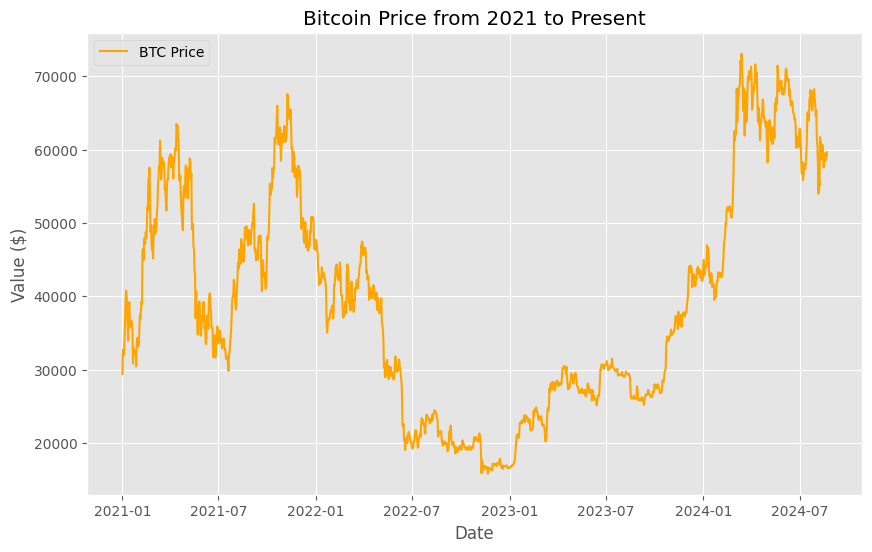

In [126]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 다운로드
btc = yf.download('BTC-USD', start='2021-01-01', end=pd.Timestamp.today().strftime('%Y-%m-%d'))

# 2배 레버리지 전략 함수
def leveraged_strategy(btc, leverage=2, initial_cash=10000):
    cash = initial_cash
    btc_owned = cash / btc['Close'].iloc[0]
    cash = 0
    
    for i in range(1, len(btc)):
        daily_return = (btc['Close'].iloc[i] / btc['Close'].iloc[i-1]) - 1
        leveraged_return = leverage * daily_return
        btc_owned *= (1 + leveraged_return)
    
    final_value = btc_owned * btc['Close'].iloc[-1]
    return final_value

# 2021년부터 현재까지의 2배 레버리지 ETF 가치 계산
final_value = leveraged_strategy(btc)
profit = final_value - 10000

# 결과 출력
print(f"Final Value after investing in 2x Leverage ETF from 2021: ${final_value:.2f}")
print(f"Profit: ${profit:.2f}")

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(btc['Close'], label='BTC Price', color='orange')
plt.xlabel('Date')
plt.ylabel('Value ($)')
plt.title('Bitcoin Price from 2021 to Present')
plt.legend()
plt.grid(True)
plt.show()

[*********************100%%**********************]  1 of 1 completed


Final Value after investing in 2x Leverage ETF from 2021: $9478.17
Profit: $-521.83


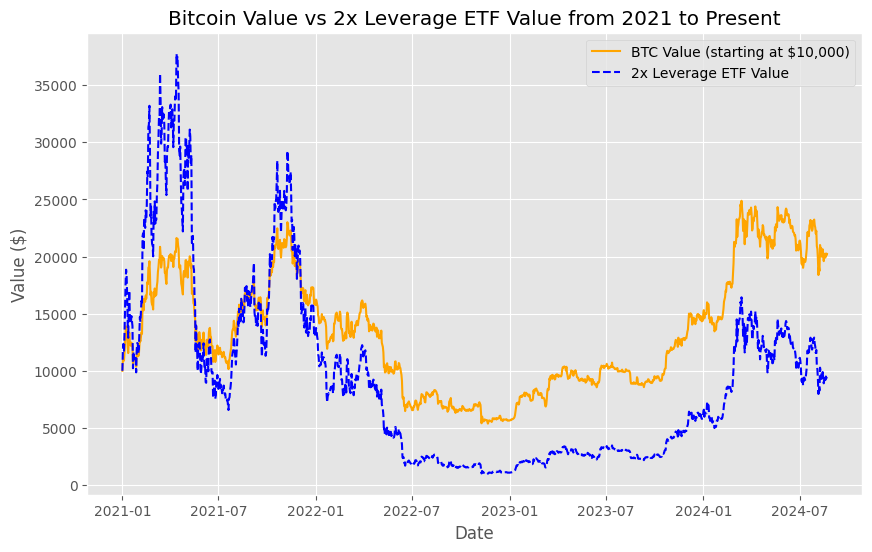

In [131]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 다운로드
btc = yf.download('BTC-USD', start='2021-01-01', end=pd.Timestamp.today().strftime('%Y-%m-%d'))

# 2배 레버리지 전략 함수
def calculate_leveraged_etf(btc, leverage=2, initial_cash=10000):
    etf_value = [initial_cash]
    for i in range(1, len(btc)):
        daily_return = (btc['Close'].iloc[i] / btc['Close'].iloc[i-1]) - 1
        leveraged_return = leverage * daily_return
        new_value = etf_value[-1] * (1 + leveraged_return)
        etf_value.append(new_value)
    return etf_value

# 2021년부터 현재까지의 2배 레버리지 ETF 가치 계산
leveraged_etf_value = calculate_leveraged_etf(btc)

# 비트코인 가격을 $10,000에서 시작하도록 조정
initial_btc_value = 10000
btc_value = (btc['Close'] / btc['Close'].iloc[0]) * initial_btc_value

# 결과 출력
final_value = leveraged_etf_value[-1]
profit = final_value - 10000
print(f"Final Value after investing in 2x Leverage ETF from 2021: ${final_value:.2f}")
print(f"Profit: ${profit:.2f}")

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(btc.index, btc_value, label='BTC Value (starting at $10,000)', color='orange')
plt.plot(btc.index, leveraged_etf_value, label='2x Leverage ETF Value', color='blue', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Value ($)')
plt.title('Bitcoin Value vs 2x Leverage ETF Value from 2021 to Present')
plt.legend()
plt.grid(True)
plt.show()

[*********************100%%**********************]  1 of 1 completed
C:\Users\ansck\AppData\Local\Temp\ipykernel_3920\2420748876.py:20: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  intervals = pd.date_range(start='2014-01-01', end='2024-01-01', freq='2Y')


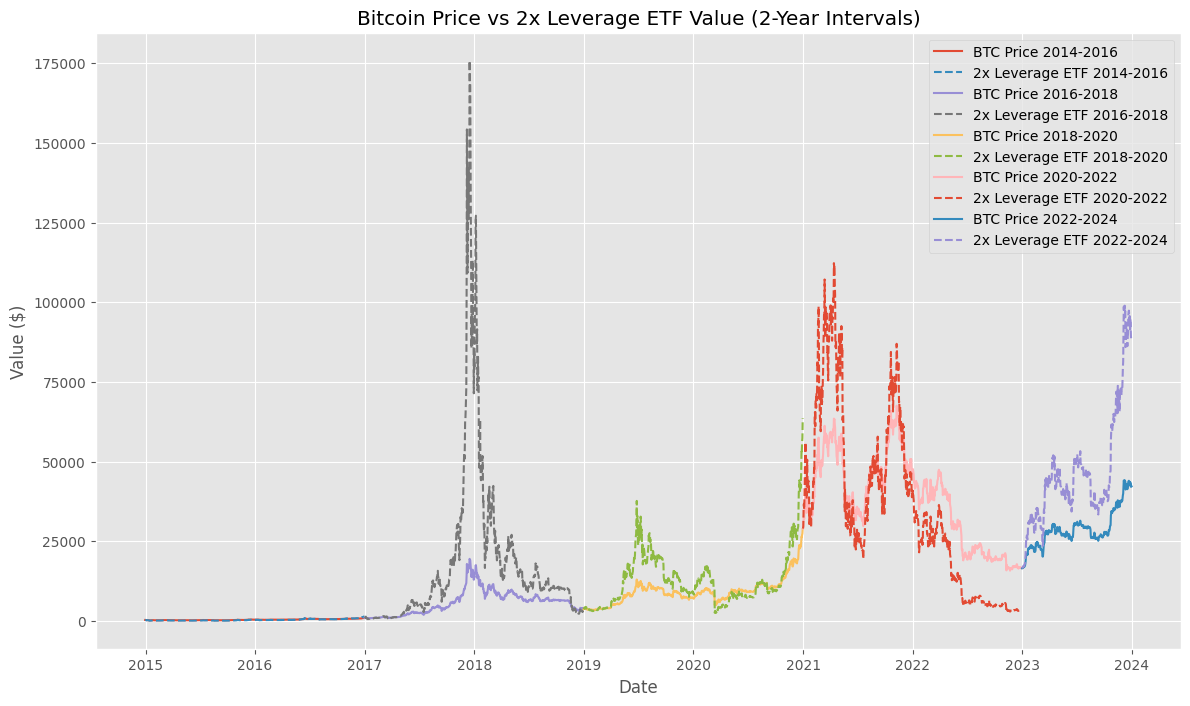

In [132]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 다운로드
btc = yf.download('BTC-USD', start='2014-01-01', end='2024-01-01')

# 2배 레버리지 전략 함수
def calculate_leveraged_etf(btc, leverage=2):
    etf_value = [btc['Close'].iloc[0]]
    for i in range(1, len(btc)):
        daily_return = (btc['Close'].iloc[i] / btc['Close'].iloc[i-1]) - 1
        leveraged_return = leverage * daily_return
        new_value = etf_value[-1] * (1 + leveraged_return)
        etf_value.append(new_value)
    return etf_value

# 2년 간격으로 데이터를 나누고 2배 레버리지 ETF 가치 계산
intervals = pd.date_range(start='2014-01-01', end='2024-01-01', freq='2Y')
intervals = intervals.union([pd.Timestamp('2024-01-01')])  # Ensure the end date is included

# 시각화
plt.figure(figsize=(14, 8))

for i in range(len(intervals) - 1):
    start_date = intervals[i]
    end_date = intervals[i + 1]
    btc_interval = btc[(btc.index >= start_date) & (btc.index < end_date)]
    
    if len(btc_interval) > 1:  # Ensure there is enough data
        leveraged_etf_value = calculate_leveraged_etf(btc_interval)
        
        # 비트코인 가격을 실제 값으로 유지
        plt.plot(btc_interval.index, btc_interval['Close'], label=f'BTC Price {start_date.year}-{end_date.year}', linestyle='-')
        plt.plot(btc_interval.index, leveraged_etf_value, label=f'2x Leverage ETF {start_date.year}-{end_date.year}', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Value ($)')
plt.title('Bitcoin Price vs 2x Leverage ETF Value (2-Year Intervals)')
plt.legend()
plt.grid(True)
plt.show()

[*********************100%%**********************]  1 of 1 completed


                          Start Date                    End Date  \
count                           5000                        5000   
mean   2021-06-04 03:45:30.240000256  2021-08-28 03:08:55.680000   
min              2019-03-02 00:00:00         2019-04-01 00:00:00   
25%              2020-04-11 18:00:00         2020-07-04 00:00:00   
50%              2021-05-26 12:00:00         2021-08-15 00:00:00   
75%              2022-08-05 06:00:00         2022-10-29 00:00:00   
max              2023-09-23 00:00:00         2023-12-30 00:00:00   
std                              NaN                         NaN   

       Start BTC Price  End BTC Price  Investment Period (years)  \
count      5000.000000    5000.000000                     5000.0   
mean      24424.027273   26048.003865                        0.0   
min        3761.557129    4158.183105                        0.0   
25%        9795.700195   10575.864258                        0.0   
50%       20688.781250   23837.232422          

C:\Users\ansck\AppData\Local\Temp\ipykernel_3920\1303654093.py:209: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([results_df['Buy and Hold'], results_df['Trendline'], results_df['RSI'], results_df['Moving Average'], results_df['MACD'], results_df['Bollinger Bands'], results_df['2x Leverage']],


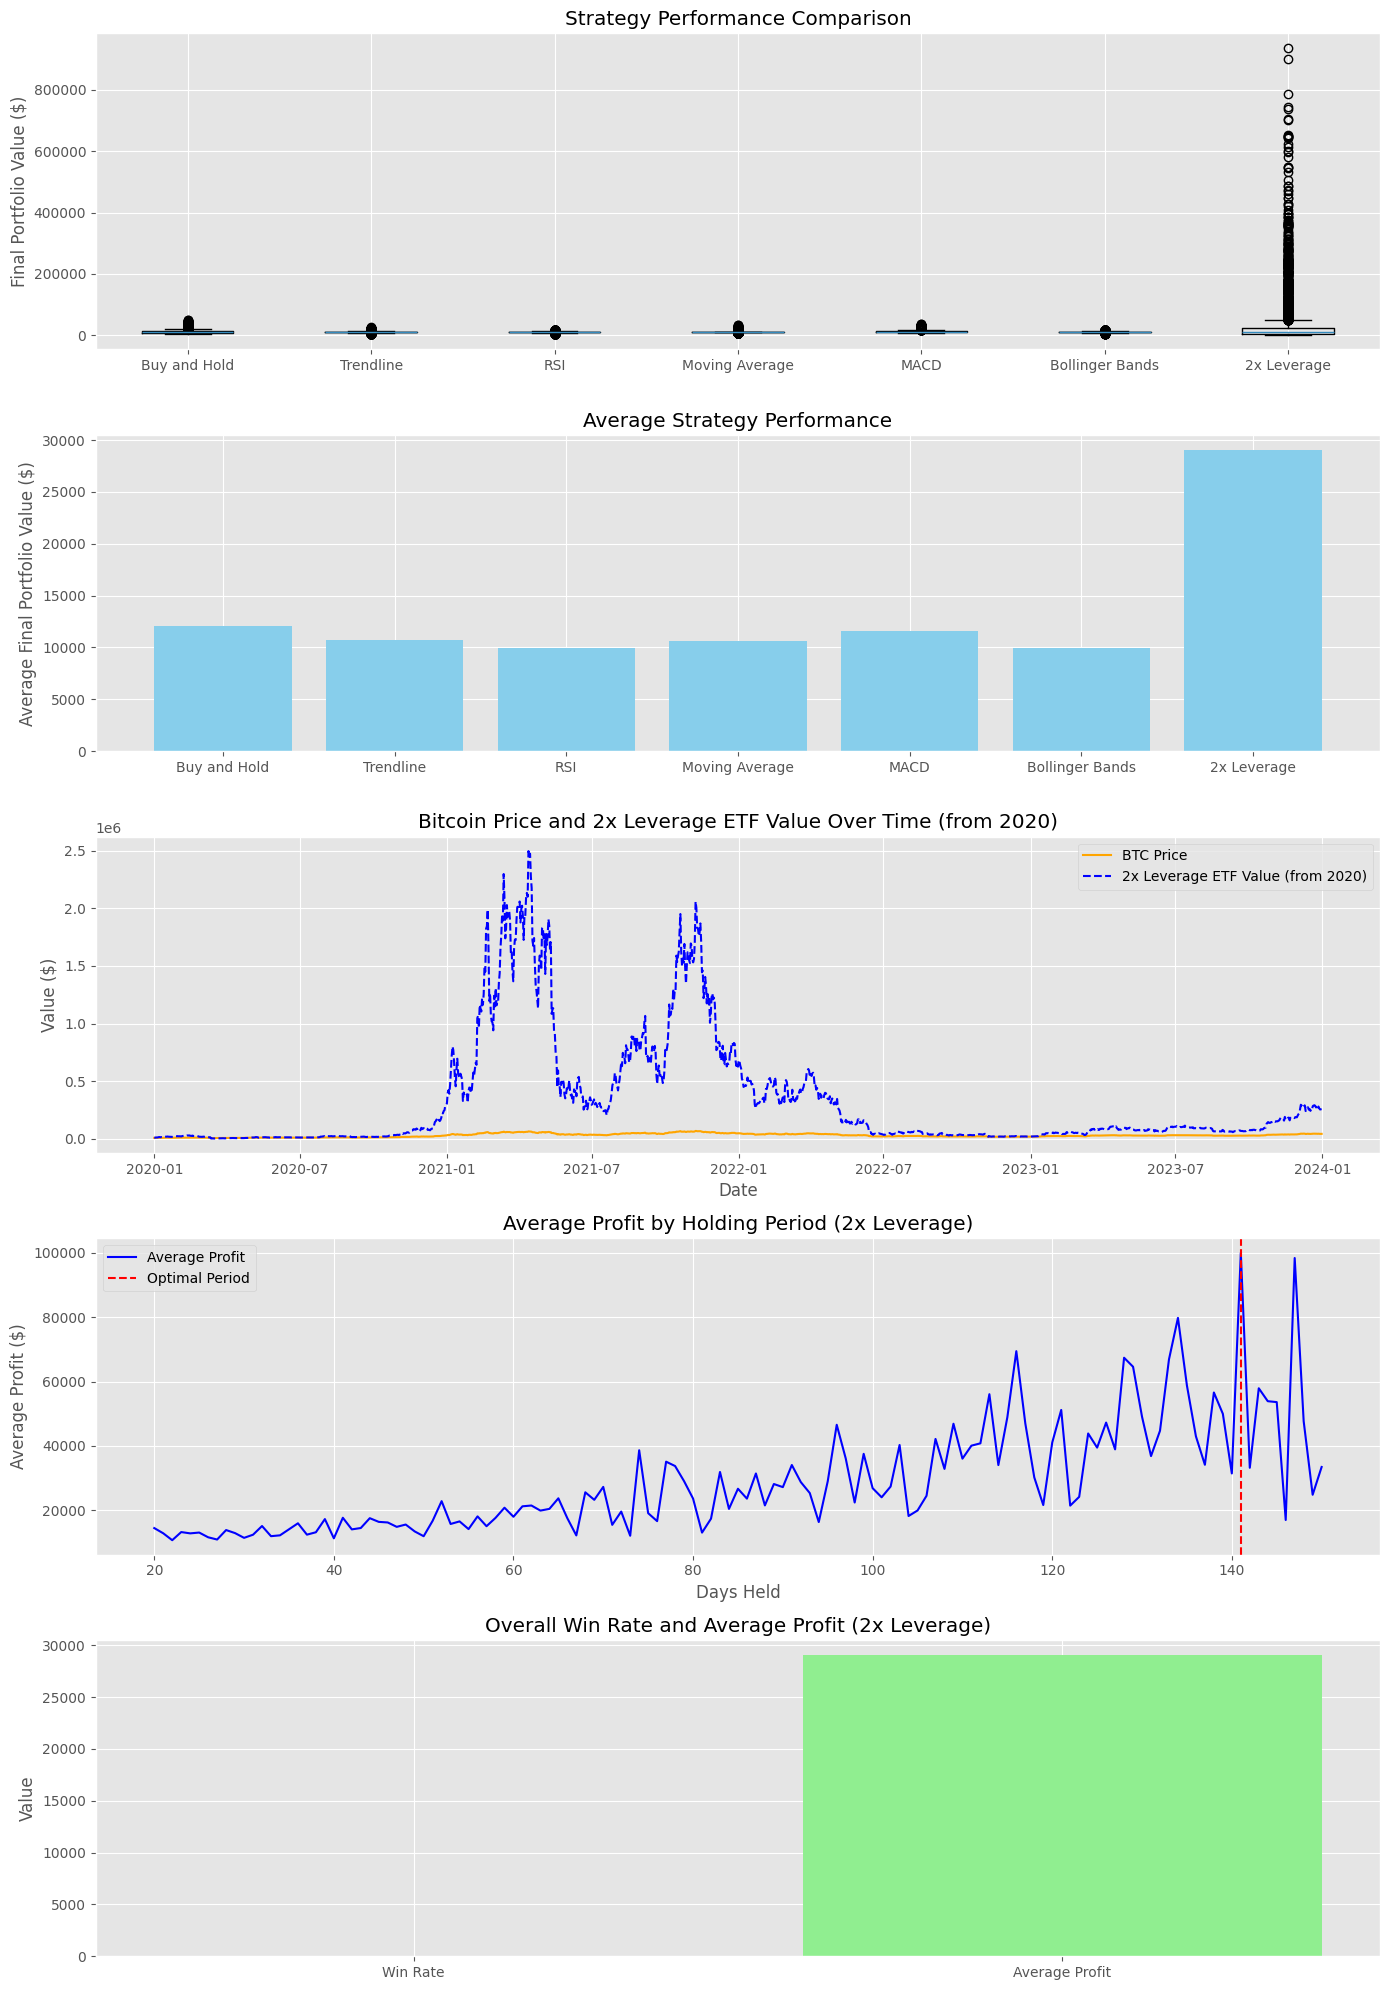

In [137]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from joblib import Parallel, delayed

# 데이터 다운로드
btc = yf.download('BTC-USD', start='2019-01-01', end='2024-01-01')

# RSI 계산 함수
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# MACD 계산 함수
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data['Close'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal

# 볼린저 밴드 계산 함수
def calculate_bollinger_bands(data, window=20, num_std=2):
    rolling_mean = data['Close'].rolling(window=window).mean()
    rolling_std = data['Close'].rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std * num_std)
    lower_band = rolling_mean - (rolling_std * num_std)
    return upper_band, lower_band

# 전략 함수들 정의
# 1. 이동평균선 전략
def moving_average_strategy(start, end, short_window=20, long_window=60):
    cash = 10000
    btc_owned = 0
    invested = False
    
    btc['MA20'] = btc['Close'].rolling(window=short_window).mean()
    btc['MA60'] = btc['Close'].rolling(window=long_window).mean()
    
    for i in range(start + long_window, end):
        if btc['MA20'].iloc[i] > btc['MA60'].iloc[i] and not invested:  # 골든 크로스 매수
            btc_owned = cash / btc['Close'].iloc[i]
            cash = 0
            invested = True
        elif btc['MA20'].iloc[i] < btc['MA60'].iloc[i] and invested:  # 데드 크로스 매도
            cash = btc_owned * btc['Close'].iloc[i]
            btc_owned = 0
            invested = False
    
    final_value = cash + btc_owned * btc['Close'].iloc[end]
    return final_value

# 2. RSI 전략
def rsi_strategy(start, end):
    cash = 10000
    btc_owned = 0
    invested = False
    btc['RSI'] = calculate_rsi(btc)
    
    for i in range(start, end):
        if btc['RSI'].iloc[i] < 30 and not invested:  # 매수
            btc_owned = cash / btc['Close'].iloc[i]
            cash = 0
            invested = True
        elif btc['RSI'].iloc[i] > 70 and invested:  # 매도
            cash = btc_owned * btc['Close'].iloc[i]
            btc_owned = 0
            invested = False
    
    final_value = cash + btc_owned * btc['Close'].iloc[end]
    return final_value

# 3. 추세선 전략
def trendline_strategy(start, end):
    cash = 10000
    btc_owned = 0
    invested = False
    
    for i in range(start + 20, end):  # 20일 이후부터 시작
        trendline = np.polyfit(range(i+1), btc['Close'][:i+1], 1)
        trendline_value = np.polyval(trendline, i)
        if btc['Close'].iloc[i] < trendline_value and not invested:  # 매수
            btc_owned = cash / btc['Close'].iloc[i]
            cash = 0
            invested = True
        elif btc['Close'].iloc[i] > trendline_value and invested:  # 매도
            cash = btc_owned * btc['Close'].iloc[i]
            btc_owned = 0
            invested = False
    
    final_value = cash + btc_owned * btc['Close'].iloc[end]
    return final_value

# 4. MACD 전략
def macd_strategy(start, end):
    cash = 10000
    btc_owned = 0
    invested = False
    btc['MACD'], btc['Signal'] = calculate_macd(btc)
    
    for i in range(start, end):
        if btc['MACD'].iloc[i] > btc['Signal'].iloc[i] and not invested:  # MACD가 신호선을 상향 돌파할 때 매수
            btc_owned = cash / btc['Close'].iloc[i]
            cash = 0
            invested = True
        elif btc['MACD'].iloc[i] < btc['Signal'].iloc[i] and invested:  # MACD가 신호선을 하향 돌파할 때 매도
            cash = btc_owned * btc['Close'].iloc[i]
            btc_owned = 0
            invested = False
    
    final_value = cash + btc_owned * btc['Close'].iloc[end]
    return final_value

# 5. Bollinger Bands 전략
def bollinger_strategy(start, end):
    cash = 10000
    btc_owned = 0
    invested = False
    btc['Upper Band'], btc['Lower Band'] = calculate_bollinger_bands(btc)
    
    for i in range(start, end):
        if btc['Close'].iloc[i] < btc['Lower Band'].iloc[i] and not invested:  # 가격이 하단 밴드 아래에 있을 때 매수
            btc_owned = cash / btc['Close'].iloc[i]
            cash = 0
            invested = True
        elif btc['Close'].iloc[i] > btc['Upper Band'].iloc[i] and invested:  # 가격이 상단 밴드 위에 있을 때 매도
            cash = btc_owned * btc['Close'].iloc[i]
            btc_owned = 0
            invested = False
    
    final_value = cash + btc_owned * btc['Close'].iloc[end]
    return final_value

# 6. Buy and Hold 전략 (비교용)
def buy_and_hold(start, end):
    initial_price = btc['Close'].iloc[start]
    final_price = btc['Close'].iloc[end]
    return (final_price / initial_price) * 10000  # 투자 초기 자산을 $10,000로 가정

# 7. 2배 레버리지 전략
def leveraged_strategy(btc, start, end, leverage=2):
    cash = 10000
    btc_owned = cash / btc['Close'].iloc[start]
    cash = 0
    
    for i in range(start + 1, end + 1):
        daily_return = (btc['Close'].iloc[i] / btc['Close'].iloc[i-1]) - 1
        leveraged_return = leverage * daily_return
        btc_owned *= (1 + leveraged_return)
    
    final_value = btc_owned * btc['Close'].iloc[end]
    return final_value

# 시뮬레이션 실행 함수 정의
def run_simulation(index):
    start = random.randint(60, len(btc) - 100)
    max_possible_end = len(btc) - 1
    end = random.randint(start + 20, min(start + 150, max_possible_end))
    
    start_date = btc.index[start]
    end_date = btc.index[end]
    start_price = btc['Close'].iloc[start]
    end_price = btc['Close'].iloc[end]
    
    investment_period = end_date - start_date
    years = investment_period.days // 365
    months = (investment_period.days % 365) // 30
    
    result = {
        'Start Date': start_date,
        'End Date': end_date,
        'Start BTC Price': start_price,
        'End BTC Price': end_price,
        'Investment Period (years)': years,
        'Investment Period (months)': months,
        'Buy and Hold': buy_and_hold(start, end),
        'Trendline': trendline_strategy(start, end),
        'RSI': rsi_strategy(start, end),
        'Moving Average': moving_average_strategy(start, end),
        'MACD': macd_strategy(start, end),
        'Bollinger Bands': bollinger_strategy(start, end),
        '2x Leverage': leveraged_strategy(btc, start, end, leverage=2)
    }
    
    return result

# 5000번 시뮬레이션 병렬 실행
num_simulations = 5000
results = Parallel(n_jobs=-1)(delayed(run_simulation)(i) for i in range(num_simulations))

# 결과를 데이터프레임으로 변환
results_df = pd.DataFrame(results)

# 결과 출력
print(results_df.describe())
print(results_df[['Start Date', 'End Date', 'Start BTC Price', 'End BTC Price', 'Investment Period (years)', 'Investment Period (months)']])

# 시각화 - 성과 비교 및 최적의 투자 기간
plt.figure(figsize=(14, 20))

# 상자 그림
plt.subplot(5, 1, 1)
plt.boxplot([results_df['Buy and Hold'], results_df['Trendline'], results_df['RSI'], results_df['Moving Average'], results_df['MACD'], results_df['Bollinger Bands'], results_df['2x Leverage']], 
            labels=['Buy and Hold', 'Trendline', 'RSI', 'Moving Average', 'MACD', 'Bollinger Bands', '2x Leverage'])
plt.title('Strategy Performance Comparison')
plt.ylabel('Final Portfolio Value ($)')
plt.grid(True)

# 막대 그래프 - 평균 수익 비교
plt.subplot(5, 1, 2)
means = [results_df['Buy and Hold'].mean(), results_df['Trendline'].mean(), results_df['RSI'].mean(), results_df['Moving Average'].mean(), results_df['MACD'].mean(), results_df['Bollinger Bands'].mean(), results_df['2x Leverage'].mean()]
plt.bar(['Buy and Hold', 'Trendline', 'RSI', 'Moving Average', 'MACD', 'Bollinger Bands', '2x Leverage'], means, color='skyblue')
plt.title('Average Strategy Performance')
plt.ylabel('Average Final Portfolio Value ($)')
plt.grid(True)

# 비트코인 가격 및 2배 레버리지 ETF 그래프 (2020년부터)
btc_2020 = btc.loc['2020-01-01':]
leveraged_etf_values = [leveraged_strategy(btc_2020, 0, i) for i in range(len(btc_2020))]

plt.subplot(5, 1, 3)
plt.plot(btc_2020['Close'], label='BTC Price', color='orange')
plt.plot(btc_2020.index, leveraged_etf_values, label='2x Leverage ETF Value (from 2020)', color='blue', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Value ($)')
plt.title('Bitcoin Price and 2x Leverage ETF Value Over Time (from 2020)')
plt.legend()
plt.grid(True)

# 최적의 투자 기간 시각화
# 평균 수익을 기간(일 수)별로 그룹화하여 계산
days_held = results_df['End Date'] - results_df['Start Date']
days_held = days_held.dt.days
avg_profit_by_days = results_df['2x Leverage'].groupby(days_held).mean()

plt.subplot(5, 1, 4)
plt.plot(avg_profit_by_days.index, avg_profit_by_days.values, label='Average Profit', color='blue')
plt.axvline(avg_profit_by_days.idxmax(), color='red', linestyle='--', label='Optimal Period')
plt.xlabel('Days Held')
plt.ylabel('Average Profit ($)')
plt.title('Average Profit by Holding Period (2x Leverage)')
plt.legend()
plt.grid(True)

# 전반적인 승률 및 평균 수익
overall_win_rate = (results_df['2x Leverage'] > 10000).mean()
overall_avg_profit = results_df['2x Leverage'].mean()

plt.subplot(5, 1, 5)
plt.bar(['Win Rate', 'Average Profit'], [overall_win_rate, overall_avg_profit], color=['skyblue', 'lightgreen'])
plt.ylabel('Value')
plt.title('Overall Win Rate and Average Profit (2x Leverage)')
plt.grid(True)

plt.tight_layout()
plt.show()


[*********************100%%**********************]  1 of 1 completed


                          Start Date                       End Date  \
count                           4908                           4908   
mean   2021-06-18 19:24:12.322738432  2021-07-06 03:17:09.828850944   
min              2019-03-02 00:00:00            2019-03-13 00:00:00   
25%              2020-04-16 00:00:00            2020-05-04 00:00:00   
50%              2021-07-06 00:00:00            2021-07-23 12:00:00   
75%              2022-07-28 00:00:00            2022-08-14 00:00:00   
max              2023-09-23 00:00:00            2023-10-20 00:00:00   
std                              NaN                            NaN   

       Start BTC Price  End BTC Price  Investment Period (years)  \
count      4908.000000    4908.000000                     4908.0   
mean      25170.963426   25199.781448                        0.0   
min        3761.557129    3906.717285                        0.0   
25%        9947.247314   10168.992676                        0.0   
50%       21870.8750

C:\Users\ansck\AppData\Local\Temp\ipykernel_3920\1418630021.py:227: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([results_df['Buy and Hold'], results_df['Trendline'], results_df['RSI'], results_df['Moving Average'], results_df['MACD'], results_df['Bollinger Bands'], results_df['2x Leverage']],


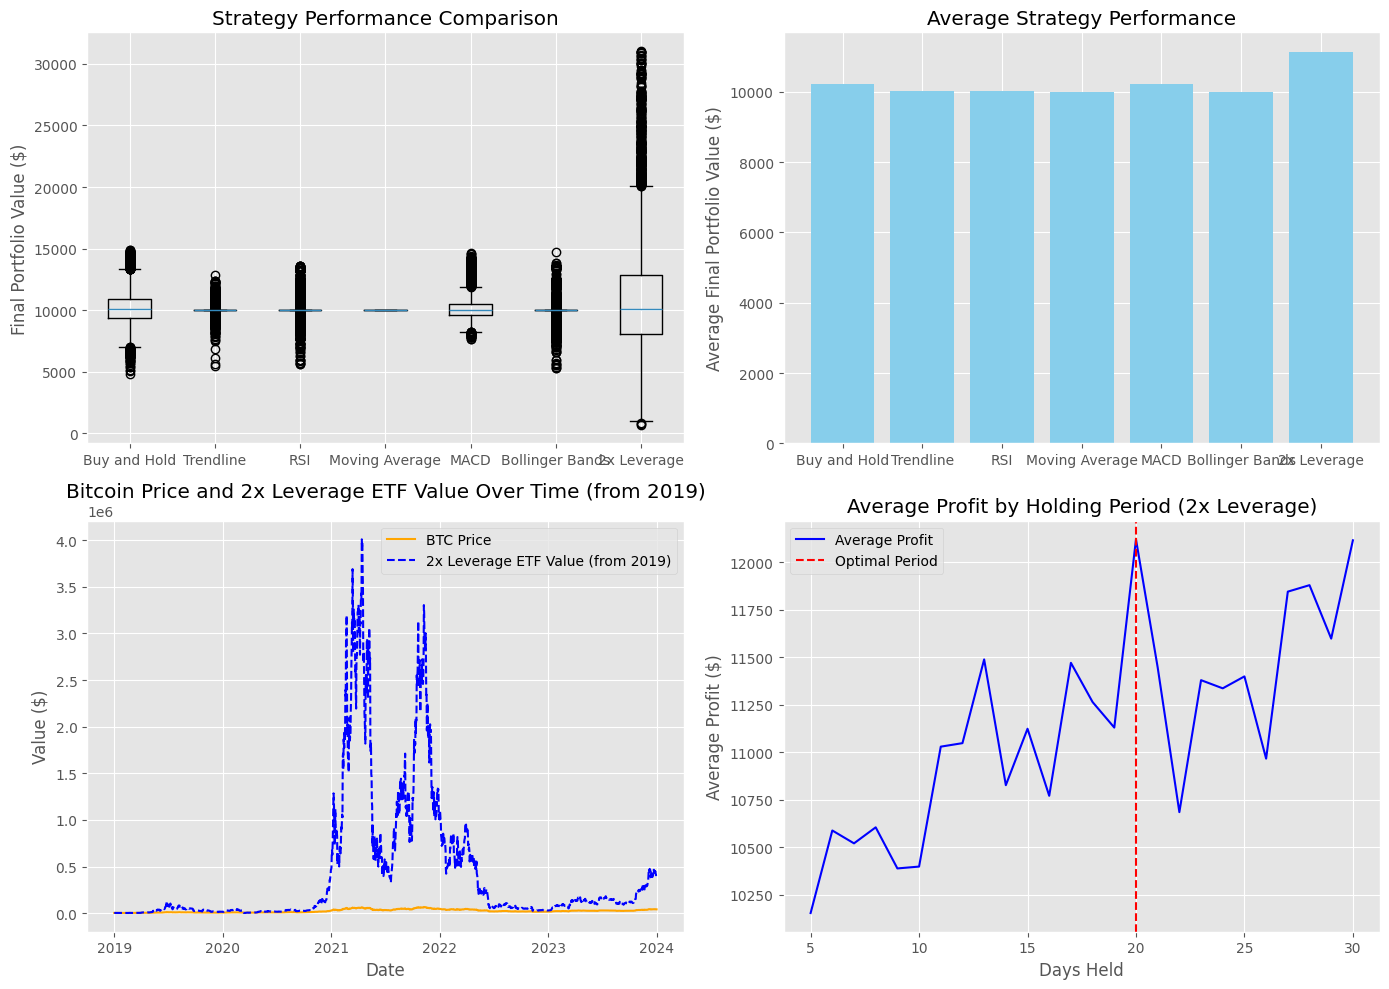

In [139]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from joblib import Parallel, delayed
from scipy.stats import zscore

# 데이터 다운로드 (2019년부터)
btc = yf.download('BTC-USD', start='2019-01-01', end='2024-01-01')

# RSI 계산 함수
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# MACD 계산 함수
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data['Close'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal

# 볼린저 밴드 계산 함수
def calculate_bollinger_bands(data, window=20, num_std=2):
    rolling_mean = data['Close'].rolling(window=window).mean()
    rolling_std = data['Close'].rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std * num_std)
    lower_band = rolling_mean - (rolling_std * num_std)
    return upper_band, lower_band

# 전략 함수들 정의
# 1. 이동평균선 전략
def moving_average_strategy(start, end, short_window=20, long_window=60):
    cash = 10000
    btc_owned = 0
    invested = False
    
    # 이동평균선 계산
    btc['MA20'] = btc['Close'].rolling(window=short_window).mean()
    btc['MA60'] = btc['Close'].rolling(window=long_window).mean()
    
    for i in range(start + long_window, end):
        if btc['MA20'].iloc[i] > btc['MA60'].iloc[i] and not invested:  # 골든 크로스 매수
            btc_owned = cash / btc['Close'].iloc[i]
            cash = 0
            invested = True
        elif btc['MA20'].iloc[i] < btc['MA60'].iloc[i] and invested:  # 데드 크로스 매도
            cash = btc_owned * btc['Close'].iloc[i]
            btc_owned = 0
            invested = False
    
    final_value = cash + btc_owned * btc['Close'].iloc[end]
    return final_value

# 2. RSI 전략
def rsi_strategy(start, end):
    cash = 10000
    btc_owned = 0
    invested = False
    btc['RSI'] = calculate_rsi(btc)
    
    for i in range(start, end):
        if btc['RSI'].iloc[i] < 30 and not invested:  # 매수
            btc_owned = cash / btc['Close'].iloc[i]
            cash = 0
            invested = True
        elif btc['RSI'].iloc[i] > 70 and invested:  # 매도
            cash = btc_owned * btc['Close'].iloc[i]
            btc_owned = 0
            invested = False
    
    final_value = cash + btc_owned * btc['Close'].iloc[end]
    return final_value

# 3. 추세선 전략
def trendline_strategy(start, end):
    cash = 10000
    btc_owned = 0
    invested = False
    
    for i in range(start + 20, end):  # 20일 이후부터 시작
        trendline = np.polyfit(range(i+1), btc['Close'][:i+1], 1)
        trendline_value = np.polyval(trendline, i)
        if btc['Close'].iloc[i] < trendline_value and not invested:  # 매수
            btc_owned = cash / btc['Close'].iloc[i]
            cash = 0
            invested = True
        elif btc['Close'].iloc[i] > trendline_value and invested:  # 매도
            cash = btc_owned * btc['Close'].iloc[i]
            btc_owned = 0
            invested = False
    
    final_value = cash + btc_owned * btc['Close'].iloc[end]
    return final_value

# 4. MACD 전략
def macd_strategy(start, end):
    cash = 10000
    btc_owned = 0
    invested = False
    btc['MACD'], btc['Signal'] = calculate_macd(btc)
    
    for i in range(start, end):
        if btc['MACD'].iloc[i] > btc['Signal'].iloc[i] and not invested:  # MACD가 신호선을 상향 돌파할 때 매수
            btc_owned = cash / btc['Close'].iloc[i]
            cash = 0
            invested = True
        elif btc['MACD'].iloc[i] < btc['Signal'].iloc[i] and invested:  # MACD가 신호선을 하향 돌파할 때 매도
            cash = btc_owned * btc['Close'].iloc[i]
            btc_owned = 0
            invested = False
    
    final_value = cash + btc_owned * btc['Close'].iloc[end]
    return final_value

# 5. Bollinger Bands 전략
def bollinger_strategy(start, end):
    cash = 10000
    btc_owned = 0
    invested = False
    btc['Upper Band'], btc['Lower Band'] = calculate_bollinger_bands(btc)
    
    for i in range(start, end):
        if btc['Close'].iloc[i] < btc['Lower Band'].iloc[i] and not invested:  # 가격이 하단 밴드 아래에 있을 때 매수
            btc_owned = cash / btc['Close'].iloc[i]
            cash = 0
            invested = True
        elif btc['Close'].iloc[i] > btc['Upper Band'].iloc[i] and invested:  # 가격이 상단 밴드 위에 있을 때 매도
            cash = btc_owned * btc['Close'].iloc[i]
            btc_owned = 0
            invested = False
    
    final_value = cash + btc_owned * btc['Close'].iloc[end]
    return final_value

# 6. Buy and Hold 전략 (비교용)
def buy_and_hold(start, end):
    initial_price = btc['Close'].iloc[start]
    final_price = btc['Close'].iloc[end]
    return (final_price / initial_price) * 10000  # 투자 초기 자산을 $10,000로 가정

# 7. 2배 레버리지 전략
def leveraged_strategy(btc, start, end, leverage=2):
    cash = 10000
    btc_owned = cash / btc['Close'].iloc[start]
    cash = 0
    
    for i in range(start + 1, end + 1):
        daily_return = (btc['Close'].iloc[i] / btc['Close'].iloc[i-1]) - 1
        leveraged_return = leverage * daily_return
        btc_owned *= (1 + leveraged_return)
    
    final_value = btc_owned * btc['Close'].iloc[end]
    return final_value

# 시뮬레이션 실행 함수 정의
def run_simulation(index):
    start = random.randint(60, len(btc) - 100)
    max_possible_end = len(btc) - 1
    end = random.randint(start + 5, min(start + 30, max_possible_end))  # 최소 5일에서 최대 30일 이내의 랜덤 시점
    
    start_date = btc.index[start]
    end_date = btc.index[end]
    start_price = btc['Close'].iloc[start]
    end_price = btc['Close'].iloc[end]
    
    investment_period = end_date - start_date
    years = investment_period.days // 365
    months = (investment_period.days % 365) // 30
    
    result = {
        'Start Date': start_date,
        'End Date': end_date,
        'Start BTC Price': start_price,
        'End BTC Price': end_price,
        'Investment Period (years)': years,
        'Investment Period (months)': months,
        'Buy and Hold': buy_and_hold(start, end),
        'Trendline': trendline_strategy(start, end),
        'RSI': rsi_strategy(start, end),
        'Moving Average': moving_average_strategy(start, end),
        'MACD': macd_strategy(start, end),
        'Bollinger Bands': bollinger_strategy(start, end),
        '2x Leverage': leveraged_strategy(btc, start, end, leverage=2)
    }
    
    return result

# 5000번 시뮬레이션 병렬 실행
num_simulations = 5000
results = Parallel(n_jobs=-1)(delayed(run_simulation)(i) for i in range(num_simulations))

# 결과를 데이터프레임으로 변환
results_df = pd.DataFrame(results)

# 이상치 제거 (z-score를 사용하여 필터링)
results_df = results_df[(np.abs(zscore(results_df['2x Leverage'])) < 3)]

# 승률 계산
win_rates = {
    'Buy and Hold': (results_df['Buy and Hold'] > 10000).mean(),
    'Trendline': (results_df['Trendline'] > 10000).mean(),
    'RSI': (results_df['RSI'] > 10000).mean(),
    'Moving Average': (results_df['Moving Average'] > 10000).mean(),
    'MACD': (results_df['MACD'] > 10000).mean(),
    'Bollinger Bands': (results_df['Bollinger Bands'] > 10000).mean(),
    '2x Leverage': (results_df['2x Leverage'] > 10000).mean()
}

# 결과 출력
print(results_df.describe())
print("Win Rates for Each Strategy:")
print(win_rates)
print(results_df[['Start Date', 'End Date', 'Start BTC Price', 'End BTC Price', 'Investment Period (years)', 'Investment Period (months)']])

# 시각화 - 성과 비교 및 최적의 투자 기간
plt.figure(figsize=(14, 10))

# 상자 그림
plt.subplot(2, 2, 1)
plt.boxplot([results_df['Buy and Hold'], results_df['Trendline'], results_df['RSI'], results_df['Moving Average'], results_df['MACD'], results_df['Bollinger Bands'], results_df['2x Leverage']], 
            labels=['Buy and Hold', 'Trendline', 'RSI', 'Moving Average', 'MACD', 'Bollinger Bands', '2x Leverage'])
plt.title('Strategy Performance Comparison')
plt.ylabel('Final Portfolio Value ($)')
plt.grid(True)

# 막대 그래프 - 평균 수익 비교
plt.subplot(2, 2, 2)
means = [results_df['Buy and Hold'].mean(), results_df['Trendline'].mean(), results_df['RSI'].mean(), results_df['Moving Average'].mean(), results_df['MACD'].mean(), results_df['Bollinger Bands'].mean(), results_df['2x Leverage'].mean()]
plt.bar(['Buy and Hold', 'Trendline', 'RSI', 'Moving Average', 'MACD', 'Bollinger Bands', '2x Leverage'], means, color='skyblue')
plt.title('Average Strategy Performance')
plt.ylabel('Average Final Portfolio Value ($)')
plt.grid(True)

# 비트코인 가격 및 2배 레버리지 ETF 그래프 (2019년 이후)
btc_2019 = btc.loc['2019-01-01':]
initial_value = btc_2019['Close'].iloc[0]
leveraged_etf_values = [leveraged_strategy(btc_2019, 0, i, leverage=2) for i in range(len(btc_2019))]
leveraged_etf_values = [value * (initial_value / leveraged_etf_values[0]) for value in leveraged_etf_values]  # 비트코인 시작 값에 맞춰 조정

plt.subplot(2, 2, 3)
plt.plot(btc_2019['Close'], label='BTC Price', color='orange')
plt.plot(btc_2019.index, leveraged_etf_values, label='2x Leverage ETF Value (from 2019)', color='blue', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Value ($)')
plt.title('Bitcoin Price and 2x Leverage ETF Value Over Time (from 2019)')
plt.legend()
plt.grid(True)

# 최적의 투자 기간 시각화
days_held = results_df['End Date'] - results_df['Start Date']
days_held = days_held.dt.days
avg_profit_by_days = results_df['2x Leverage'].groupby(days_held).mean()

plt.subplot(2, 2, 4)
plt.plot(avg_profit_by_days.index, avg_profit_by_days.values, label='Average Profit', color='blue')
plt.axvline(avg_profit_by_days.idxmax(), color='red', linestyle='--', label='Optimal Period')
plt.xlabel('Days Held')
plt.ylabel('Average Profit ($)')
plt.title('Average Profit by Holding Period (2x Leverage)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


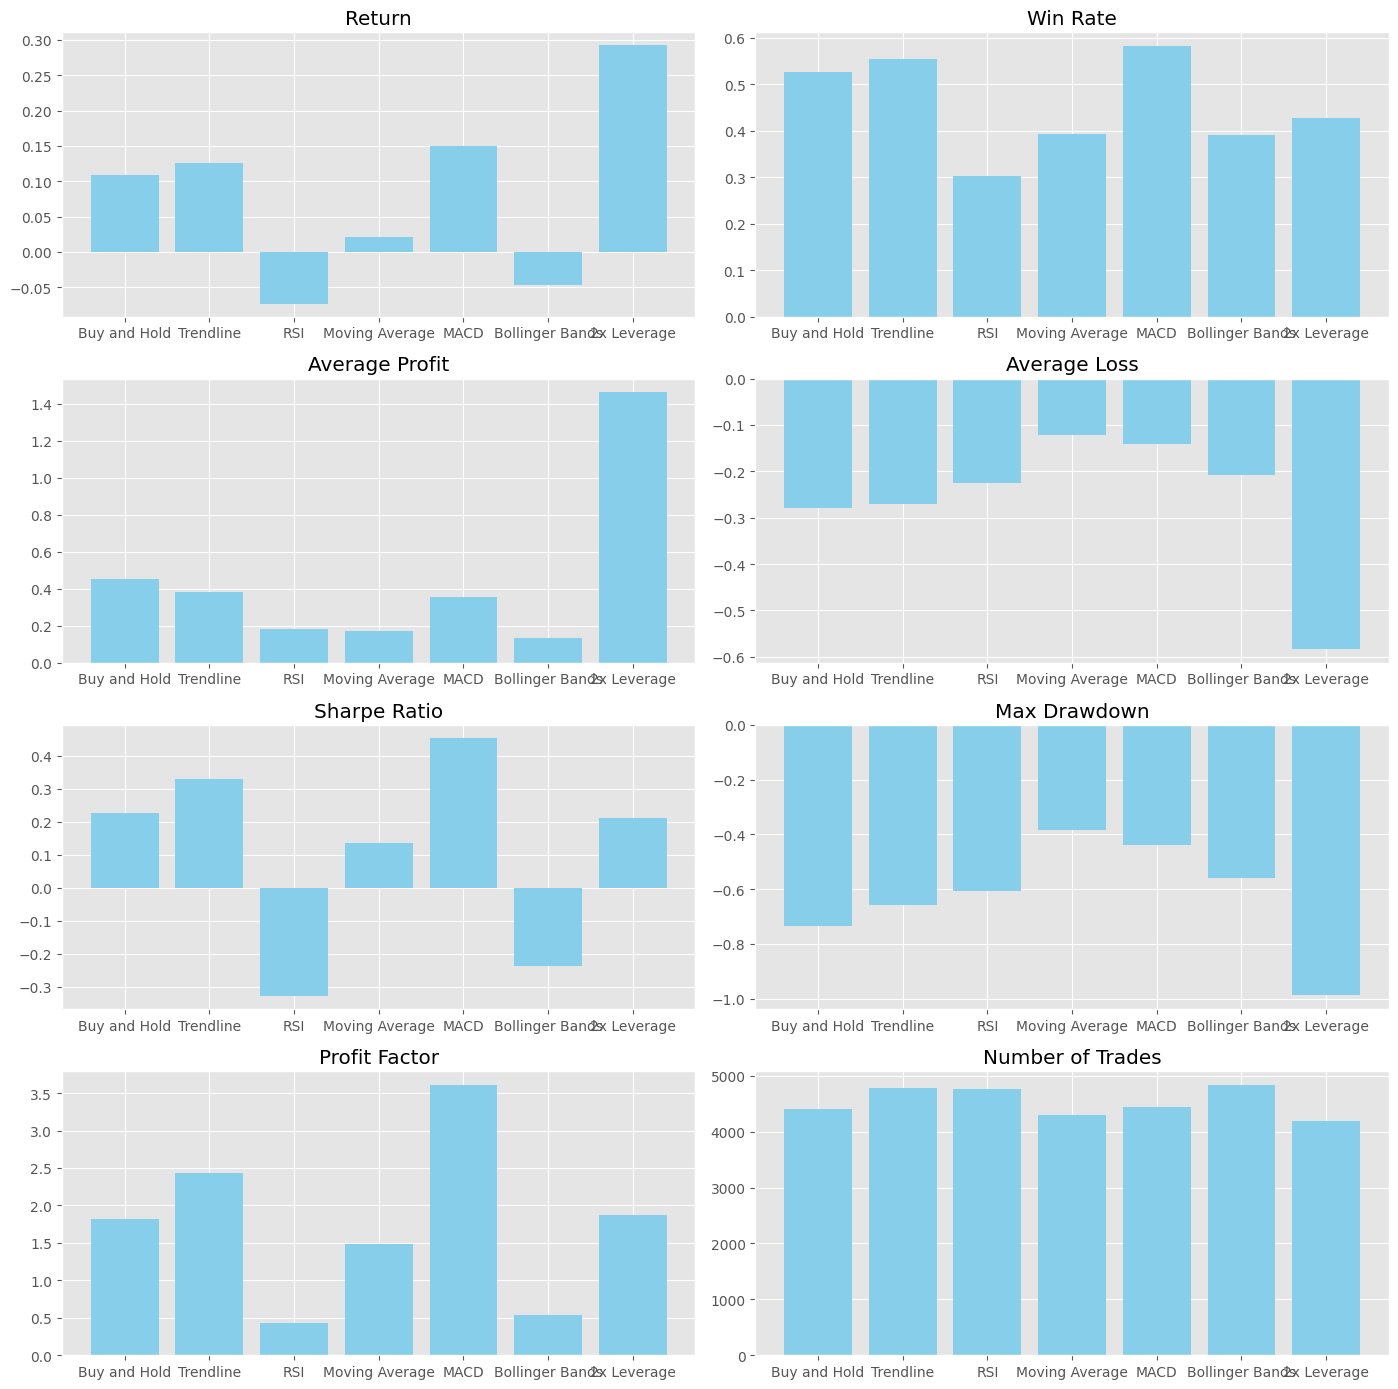

C:\Users\ansck\AppData\Local\Temp\ipykernel_3920\754864621.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([filtered_data['Buy and Hold'], filtered_data['Trendline'], filtered_data['RSI'], filtered_data['Moving Average'],


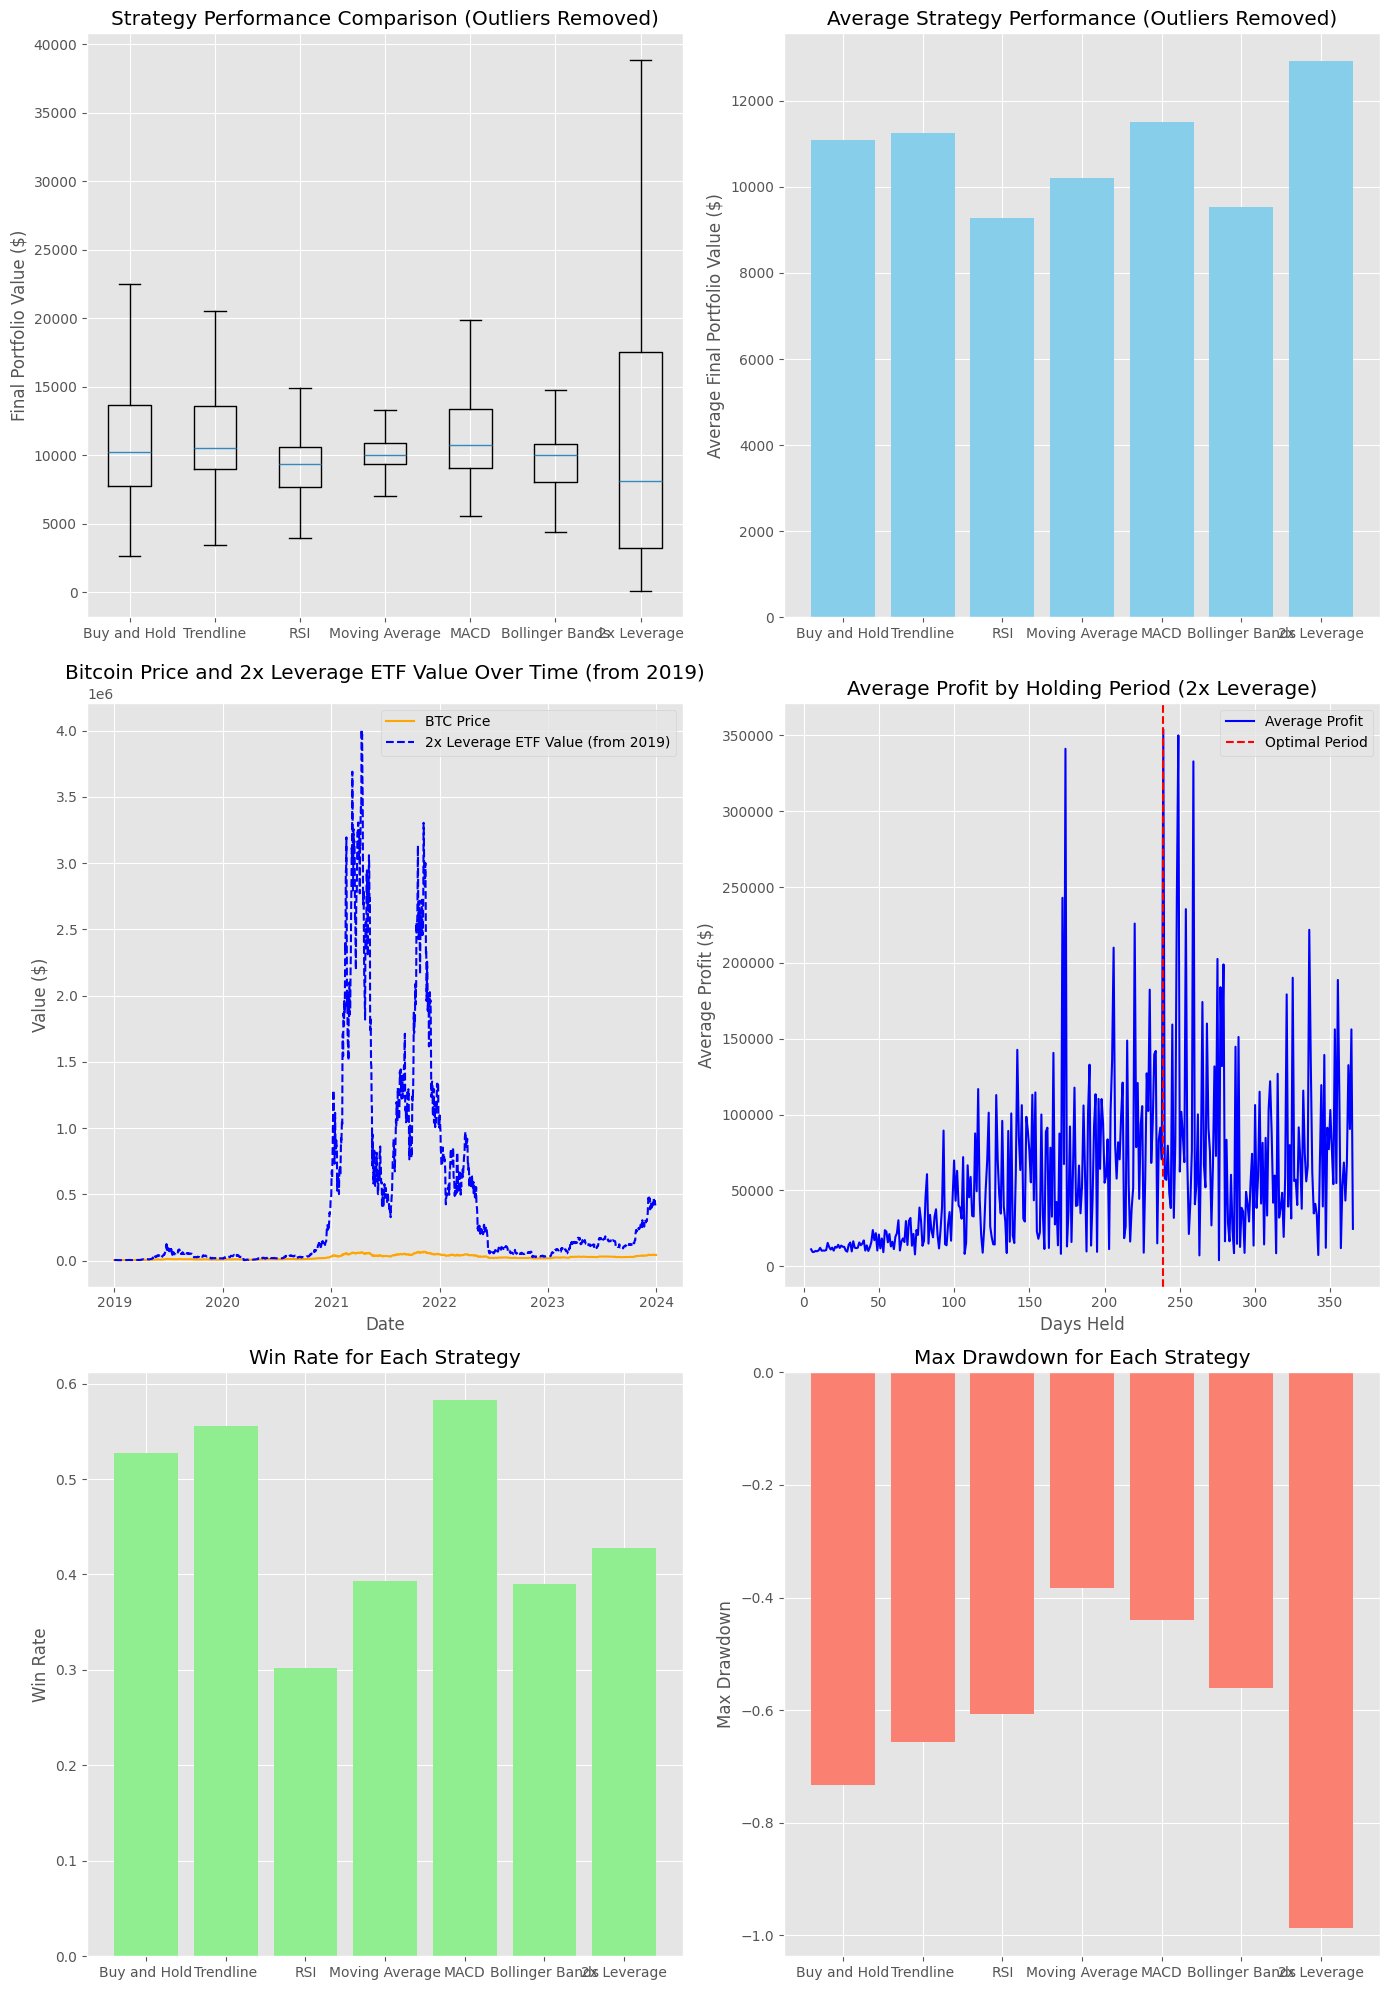

In [149]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import zscore

# 이상치 제거 함수 (강화된 버전)
def remove_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return data[(data >= lower_bound) & (data <= upper_bound)]

# 각 전략의 데이터에서 이상치 제거
filtered_data = {
    'Buy and Hold': remove_outliers(results_df['Buy and Hold']),
    'Trendline': remove_outliers(results_df['Trendline']),
    'RSI': remove_outliers(results_df['RSI']),
    'Moving Average': remove_outliers(results_df['Moving Average']),
    'MACD': remove_outliers(results_df['MACD']),
    'Bollinger Bands': remove_outliers(results_df['Bollinger Bands']),
    '2x Leverage': remove_outliers(results_df['2x Leverage'])
}

# 주요 지표 계산 함수
def calculate_metrics(strategy_returns):
    returns = strategy_returns / 10000 - 1
    win_rate = (strategy_returns > 10000).mean()
    avg_profit = returns[returns > 0].mean()
    avg_loss = returns[returns < 0].mean()
    sharpe_ratio = returns.mean() / returns.std() if returns.std() != 0 else 0
    max_drawdown = returns.min()
    profit_factor = returns[returns > 0].sum() / -returns[returns < 0].sum() if -returns[returns < 0].sum() != 0 else np.nan
    num_trades = len(returns)
    
    return {
        'Return': returns.mean(),
        'Win Rate': win_rate,
        'Average Profit': avg_profit,
        'Average Loss': avg_loss,
        'Sharpe Ratio': sharpe_ratio,
        'Max Drawdown': max_drawdown,
        'Profit Factor': profit_factor,
        'Number of Trades': num_trades
    }

# 각 전략별로 주요 지표 계산
metrics = {strategy: calculate_metrics(filtered_data[strategy]) for strategy in filtered_data}

# 결과를 DataFrame으로 변환
metrics_df = pd.DataFrame(metrics).T

# 지표별 시각화
plt.figure(figsize=(14, 14))

# 각 지표에 대해 개별 그래프 생성
for i, metric in enumerate(metrics_df.columns):
    plt.subplot(4, 2, i + 1)
    plt.bar(metrics_df.index, metrics_df[metric], color='skyblue')
    plt.title(metric)
    plt.grid(True)

plt.tight_layout()
plt.show()

# 기존의 시각화와 함께 주요 지표 추가
plt.figure(figsize=(14, 20))

# 상자 그림 (이상치 제거 후)
plt.subplot(3, 2, 1)
plt.boxplot([filtered_data['Buy and Hold'], filtered_data['Trendline'], filtered_data['RSI'], filtered_data['Moving Average'], 
             filtered_data['MACD'], filtered_data['Bollinger Bands'], filtered_data['2x Leverage']], 
            labels=['Buy and Hold', 'Trendline', 'RSI', 'Moving Average', 'MACD', 'Bollinger Bands', '2x Leverage'],
            showfliers=False)  # 이상치 표시 제거
plt.title('Strategy Performance Comparison (Outliers Removed)')
plt.ylabel('Final Portfolio Value ($)')
plt.grid(True)

# 막대 그래프 - 평균 수익 비교
plt.subplot(3, 2, 2)
means = [filtered_data['Buy and Hold'].mean(), filtered_data['Trendline'].mean(), filtered_data['RSI'].mean(), 
         filtered_data['Moving Average'].mean(), filtered_data['MACD'].mean(), filtered_data['Bollinger Bands'].mean(), 
         filtered_data['2x Leverage'].mean()]
plt.bar(['Buy and Hold', 'Trendline', 'RSI', 'Moving Average', 'MACD', 'Bollinger Bands', '2x Leverage'], means, color='skyblue')
plt.title('Average Strategy Performance (Outliers Removed)')
plt.ylabel('Average Final Portfolio Value ($)')
plt.grid(True)

# 비트코인 가격 및 2배 레버리지 ETF 그래프 (2019년 이후)
btc_2019 = btc.loc['2019-01-01':]
initial_value = btc_2019['Close'].iloc[0]
leveraged_etf_values = [leveraged_strategy(btc_2019, 0, i, leverage=2) for i in range(len(btc_2019))]
leveraged_etf_values = [value * (initial_value / leveraged_etf_values[0]) for value in leveraged_etf_values]  # 비트코인 시작 값에 맞춰 조정

plt.subplot(3, 2, 3)
plt.plot(btc_2019['Close'], label='BTC Price', color='orange')
plt.plot(btc_2019.index, leveraged_etf_values, label='2x Leverage ETF Value (from 2019)', color='blue', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Value ($)')
plt.title('Bitcoin Price and 2x Leverage ETF Value Over Time (from 2019)')
plt.legend()
plt.grid(True)

# 최적의 투자 기간 시각화
days_held = results_df['End Date'] - results_df['Start Date']
days_held = days_held.dt.days
avg_profit_by_days = results_df['2x Leverage'].groupby(days_held).mean()

plt.subplot(3, 2, 4)
plt.plot(avg_profit_by_days.index, avg_profit_by_days.values, label='Average Profit', color='blue')
plt.axvline(avg_profit_by_days.idxmax(), color='red', linestyle='--', label='Optimal Period')
plt.xlabel('Days Held')
plt.ylabel('Average Profit ($)')
plt.title('Average Profit by Holding Period (2x Leverage)')
plt.legend()
plt.grid(True)

# 각 전략별 승률 시각화
plt.subplot(3, 2, 5)
plt.bar(metrics_df.index, metrics_df['Win Rate'], color='lightgreen')
plt.title('Win Rate for Each Strategy')
plt.ylabel('Win Rate')
plt.grid(True)

# 각 전략별 최대 낙폭 시각화
plt.subplot(3, 2, 6)
plt.bar(metrics_df.index, metrics_df['Max Drawdown'], color='salmon')
plt.title('Max Drawdown for Each Strategy')
plt.ylabel('Max Drawdown')
plt.grid(True)

plt.tight_layout()
plt.show()


In [2]:
import pandas as pd
pd.read_csv('sorted_output_fin.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'sorted_output_fin.csv'